
# Part I - Exploring The Prosper Loan Dataset  

**by Emmanuel Ebong**


## Table of Contents
- [Introduction](#introduction)
- [Preliminary Wrangling](#preliminary_wrangling)
- [Data Cleaning](#cleaning)
- [Univariate Exploration](#univariate)
- [Bivariate Exploration](#bivariate)
- [Multivariate Exploration](#multivariate)
- [Conclusions](#conclusion)

<a id='introduction'></a>
## Introduction

The Prosper Loan dataset contains 113,937 loans with 81 variables on each loan, including but not limited to, loan amount, borrower rate (or interest rate), current loan status, borrower income, and many others. The term of the loan is expressed in months. Each variable hold information as at the time loan was taken out or the loan records was pulled. 

<a id='preliminary_wrangling'></a>
## Preliminary Wrangling
- Import Packages
- Load Dataset


In [1]:
# import all packages and set plots to be embedded inline
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sb
from scipy import stats

%matplotlib inline

In [2]:
# load dataset to pandas Dataframe and display summary
df = pd.read_csv('prosperLoanData.csv')
df.head() # display dimension of dataset and first five records

ListingKey  ListingNumber            ListingCreationDate  \
0  1021339766868145413AB3B         193129  2007-08-26 19:09:29.263000000   
1  10273602499503308B223C1        1209647  2014-02-27 08:28:07.900000000   
2  0EE9337825851032864889A          81716  2007-01-05 15:00:47.090000000   
3  0EF5356002482715299901A         658116  2012-10-22 11:02:35.010000000   
4  0F023589499656230C5E3E2         909464  2013-09-14 18:38:39.097000000   

  CreditGrade  Term LoanStatus           ClosedDate  BorrowerAPR  \
0           C    36  Completed  2009-08-14 00:00:00      0.16516   
1         NaN    36    Current                  NaN      0.12016   
2          HR    36  Completed  2009-12-17 00:00:00      0.28269   
3         NaN    36    Current                  NaN      0.12528   
4         NaN    36    Current                  NaN      0.24614   

   BorrowerRate  LenderYield  ...  LP_ServiceFees  LP_CollectionFees  \
0        0.1580       0.1380  ...         -133.18                0.0   
1        0.0920       0.0820  ...            0.00                0.0   
2        0.2750       0.2400  ...          -24.20                0.0   
3        0.0974       0.0874  ...         -108.01                0.0   
4        0.2085       0.1985  ...          -60.27                0.0   

   LP_GrossPrincipalLoss  LP_NetPrincipalLoss LP_NonPrincipalRecoverypayments  \
0                    0.0                  0.0                             0.0   
1                    0.0                  0.0                             0.0   
2                    0.0                  0.0                             0.0   
3                    0.0                  0.0                             0.0   
4                    0.0                  0.0                             0.0   

   PercentFunded  Recommendations InvestmentFromFriendsCount  \
0            1.0                0                          0   
1            1.0                0                          0   
2            1.0                0                          0   
3            1.0                0                          0   
4            1.0                0                          0   

  InvestmentFromFriendsAmount Investors  
0                         0.0       258  
1                         0.0         1  
2                         0.0        41  
3                         0.0       158  
4                         0.0        20  

[5 rows x 81 columns]

<a id='Motivation'></a>
#### Motivation For Exploration

The prosper loan dataset presents a unique opportunity to understand loan marketplace and the various factors that come into play regarding how loans perform, and how these factors relate with one another to impact decisions and business outcomes.
The dataset consist of 113,937 rows and 81 columns of loans records measuring loans performance for the period between 2005 and 2014.
This exploration identifies the delinquency variable, `DelinquenciesLasst7years` as target, and will focus on understanding how the target associates with select features of the dataset. The  target measures delinquencies per loan accounts for a period of seven years. Other variables considered alongside the target measures or indicates: rate, original loan amount, income range, loan status, employment status, income to debt ratio, and occupation. 

Initial feature selection will be fairly large in the wrangling stage to allow for better understanding of the dataset. Subsequent and final feature selections will be carried out in the variable analysis phase to investigate for distributions and possible association amongst the variables, with emphasis on the target. However, where needed, variables may be introduced intermittently or engineered to further the analysis. 

#### Overview of Composition of Dataset:

In [3]:
# view information about dataset
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 113937 entries, 0 to 113936
Data columns (total 81 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   ListingKey                           113937 non-null  object 
 1   ListingNumber                        113937 non-null  int64  
 2   ListingCreationDate                  113937 non-null  object 
 3   CreditGrade                          28953 non-null   object 
 4   Term                                 113937 non-null  int64  
 5   LoanStatus                           113937 non-null  object 
 6   ClosedDate                           55089 non-null   object 
 7   BorrowerAPR                          113912 non-null  float64
 8   BorrowerRate                         113937 non-null  float64
 9   LenderYield                          113937 non-null  float64
 10  EstimatedEffectiveYield              84853 non-null   float64
 11  EstimatedLoss

In [4]:
# check for duplicate records
df.duplicated().sum()

0

We can observe the dataset have no duplicated records. Types noted are float, integer, object, and boolean. Also observed is missing values for some of the features. However, a larger section of the features is not central to this investigation, so it makes sense to exclude them for readability reason before we proceed prelimary wrangling.

<a id='feature_selection'></a>
#### Initial Feature(s) Selection:

In [5]:
# select prelimary relevant features
df_rel =df[['ListingKey', 'ListingCreationDate','Term', 'LoanStatus', 'ClosedDate', 
            'BorrowerRate','ProsperScore', 'ListingCategory (numeric)', 'BorrowerState', 'Occupation', 
            'EmploymentStatus','CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'AmountDelinquent', 
            'DelinquenciesLast7Years','DebtToIncomeRatio', 'IncomeRange','StatedMonthlyIncome', 'LoanOriginalAmount',
            'LoanOriginationDate']].reset_index(drop=True)
print(df_rel.shape)
print('The shape is now narrowed to 113937 rows and 21 columns!')

(113937, 21)
The shape is now narrowed to 113937 rows and 21 columns!


In [6]:
# lets view composition and proportion of data types in our dataset
print(df_rel.dtypes.value_counts()) # raw count
df_rel.dtypes.value_counts() / len(df_rel.columns) * 100 # proportion 

float64    9
object     9
int64      3
dtype: int64


float64    42.857143
object     42.857143
int64      14.285714
dtype: float64

Now we can clearly see the composition of the dataset features in data type terms; 42.8% of the features are stored as float, 42.8% object, and 14.3.0% as integer.

In [7]:
# extract numeric variables
numeric_vars = [col for col in df_rel.columns if df_rel[col].dtype != 'O']

# view numeric variables
print(numeric_vars)

['Term', 'BorrowerRate', 'ProsperScore', 'ListingCategory (numeric)', 'CreditScoreRangeLower', 'CreditScoreRangeUpper', 'CurrentDelinquencies', 'AmountDelinquent', 'DelinquenciesLast7Years', 'DebtToIncomeRatio', 'StatedMonthlyIncome', 'LoanOriginalAmount']


We have 12 numeric features. 11 floats and 3 integer.

In [8]:
# view unique values and range of the primary target variable
print(set([v for v in df_rel['DelinquenciesLast7Years'].unique()]))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, 7.0, 8.0, nan, 10.0, 11.0, 12.0, 13.0, 14.0, 15.0, 9.0, 17.0, 18.0, 16.0, 20.0, 21.0, 22.0, 23.0, 19.0, 25.0, 26.0, 27.0, 28.0, 29.0, 30.0, 31.0, 32.0, 33.0, 34.0, 35.0, 36.0, 37.0, 38.0, 39.0, 40.0, 41.0, 42.0, 43.0, 44.0, 45.0, 46.0, 47.0, 48.0, 49.0, 50.0, 51.0, 52.0, 53.0, 54.0, 55.0, 56.0, 57.0, 58.0, 59.0, 60.0, 61.0, 62.0, 63.0, 64.0, 65.0, 66.0, 67.0, 68.0, 69.0, 70.0, 71.0, 72.0, 73.0, 74.0, 75.0, 76.0, 77.0, 78.0, 79.0, 80.0, 81.0, 82.0, 83.0, 84.0, 85.0, 86.0, 87.0, 88.0, 89.0, 90.0, 91.0, 92.0, 93.0, 94.0, 95.0, 96.0, 97.0, 98.0, 99.0, 24.0}


In [9]:
# view unique values and range of target_2 variable 
print(set([v for v in df_rel['CurrentDelinquencies'].unique()]))

{0.0, 1.0, 2.0, 3.0, 4.0, 5.0, 6.0, nan, 8.0, 9.0, 7.0, 11.0, 12.0, 13.0, 14.0, 10.0, 16.0, 17.0, 18.0, 19.0, 20.0, 21.0, 22.0, 15.0, 23.0, 25.0, 24.0, 27.0, 26.0, 28.0, 30.0, 31.0, 32.0, 33.0, 35.0, 36.0, 37.0, 39.0, 40.0, 41.0, 45.0, 50.0, 51.0, 57.0, 59.0, 64.0, 82.0, 83.0}


In [10]:
# view unique values and range of ListingCategory (numeric)
set([v for v in df_rel['ListingCategory (numeric)'].unique()])

{0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20}

Our target variables, "DelinquenciesLast7Years" and "CurrentDelinquencies" are continuous with a wide range of unique values, `0.0 to 99.0` for "DelinquenciesLast7Years" and `0.0 to 83.0` for "CurrentDelinquencies". Missing values is also noted for the variables. Per Prosper Loan dictionary, the features store counts of delinquencies, and as such should be discrete. So, type conversion will be performed in the cleaning section to address this. 
Credit score data is held in two columns as lower and upper ranges. In the cleaning section, the score will be determined and store in a single variable. 
Also observed is the "ListingCategory (numeric)" which appears to be a category with range `0 to 20`. Based on the Prosper loan dictionary, there are 21 loan categories. As we progress, the variable will be converted to categorical type to bear the name of loan category, for better understanding.

In [11]:
# extract categorical variables
cat_vars = [col for col in df_rel.columns if df_rel[col].dtype == 'O']

# view categorical variables
print(cat_vars)

['ListingKey', 'ListingCreationDate', 'LoanStatus', 'ClosedDate', 'BorrowerState', 'Occupation', 'EmploymentStatus', 'IncomeRange', 'LoanOriginationDate']


Lets take look at key categorical variables: 'LoanStatus', 'Occupation', 'EmploymentStatus', and 'IncomeRange'.

In [12]:
# make a list of categorical variables
cat_ = ['LoanStatus','EmploymentStatus','IncomeRange', 'Occupation'] 

# function to display cat variable summary
def display_cat():
    for v in cat_:
        print(v, df_rel[v].value_counts())
    
display_cat()    

LoanStatus Current                   56576
Completed                 38074
Chargedoff                11992
Defaulted                  5018
Past Due (1-15 days)        806
Past Due (31-60 days)       363
Past Due (61-90 days)       313
Past Due (91-120 days)      304
Past Due (16-30 days)       265
FinalPaymentInProgress      205
Past Due (>120 days)         16
Cancelled                     5
Name: LoanStatus, dtype: int64
EmploymentStatus Employed         67322
Full-time        26355
Self-employed     6134
Not available     5347
Other             3806
Part-time         1088
Not employed       835
Retired            795
Name: EmploymentStatus, dtype: int64
IncomeRange $25,000-49,999    32192
$50,000-74,999    31050
$100,000+         17337
$75,000-99,999    16916
Not displayed      7741
$1-24,999          7274
Not employed        806
$0                  621
Name: IncomeRange, dtype: int64
Occupation Other                          28617
Professional                   13628
Computer Progra

Here we can see that the "LoantStatus" have past due category with delinquency buckets, however, these buckets are represented as a main of "LoanStatus" instead of a sub-level of "Past Due". This investigation will not drill down on the past due delinquencies, and as such the sub-levels will be removed to maintain a category with no sub-levels. The "Past Due"  will be renamed to meet naming convention in the dataset.

Across the other categorical variables, there are spaces between level labels; Some "EmploymentStatus" categories labels are hypenated while another is spaced. Some 5000 plus employment status data are flagged as "Not available". This I will explore to understand more.
The "IncomeRange" also have income data that are not displayed, which will be investigated also.
The "Occupation" variable has a wide range of values. Below code provides a view of the unique values. Missing values is noted!

In [13]:
# zoomed in on the occpation variable
print(list(set([col for col in df_rel.Occupation.values])))

[nan, 'Engineer - Mechanical', 'Military Officer', 'Judge', 'Sales - Commission', 'Military Enlisted', 'Laborer', 'Clergy', 'Attorney', 'Professional', 'Skilled Labor', 'Professor', 'Student - College Graduate Student', 'Realtor', 'Engineer - Chemical', 'Homemaker', 'Tradesman - Carpenter', 'Medical Technician', "Teacher's Aide", 'Food Service', 'Nurse (RN)', 'Investor', 'Tradesman - Electrician', 'Landscaping', 'Food Service Management', 'Analyst', 'Architect', 'Biologist', 'Construction', 'Administrative Assistant', 'Retail Management', 'Doctor', 'Student - Community College', 'Truck Driver', 'Flight Attendant', 'Scientist', 'Fireman', 'Car Dealer', 'Bus Driver', 'Tradesman - Plumber', 'Teacher', 'Principal', 'Waiter/Waitress', 'Social Worker', 'Pharmacist', 'Accountant/CPA', 'Chemist', 'Engineer - Electrical', 'Sales - Retail', 'Student - College Freshman', 'Student - College Sophomore', 'Executive', 'Psychologist', 'Tradesman - Mechanic', 'Nurse (LPN)', 'Other', 'Dentist', 'Student

The Occupation variable has 67 unique values. Names are in proper case, some contain space(s) and special characters. Also observed is that the some classes do have sub-level(s) e.g "Student - College Sophomore", "Student - College Senior" etc. For this investigaion the sub-levels will be collapsed to focused on the main category. There is also some missing occupation data for some of the loans.

#### Assessing for Missing Values:

In [14]:
# check for missing values
df_rel.isna().sum()

ListingKey                       0
ListingCreationDate              0
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerRate                     0
ProsperScore                 29084
ListingCategory (numeric)        0
BorrowerState                 5515
Occupation                    3588
EmploymentStatus              2255
CreditScoreRangeLower          591
CreditScoreRangeUpper          591
CurrentDelinquencies           697
AmountDelinquent              7622
DelinquenciesLast7Years        990
DebtToIncomeRatio             8554
IncomeRange                      0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
dtype: int64

We can see some of the variables have a missing values. So, next we get the proportion of values that are missing applicable variable(s).

In [15]:
# make a list variables with missing values
vars_na = [col for col in df_rel.columns if df_rel[col].isna().sum() > 0]

# compute percentage of missing values for each variable where exist
for col in vars_na:
    print(col, np.round((df_rel[col].isna().sum()/ len(df_rel) * 100), 2), '% are missing.')

ClosedDate 51.65 % are missing.
ProsperScore 25.53 % are missing.
BorrowerState 4.84 % are missing.
Occupation 3.15 % are missing.
EmploymentStatus 1.98 % are missing.
CreditScoreRangeLower 0.52 % are missing.
CreditScoreRangeUpper 0.52 % are missing.
CurrentDelinquencies 0.61 % are missing.
AmountDelinquent 6.69 % are missing.
DelinquenciesLast7Years 0.87 % are missing.
DebtToIncomeRatio 7.51 % are missing.


**Visual of Missing Values**

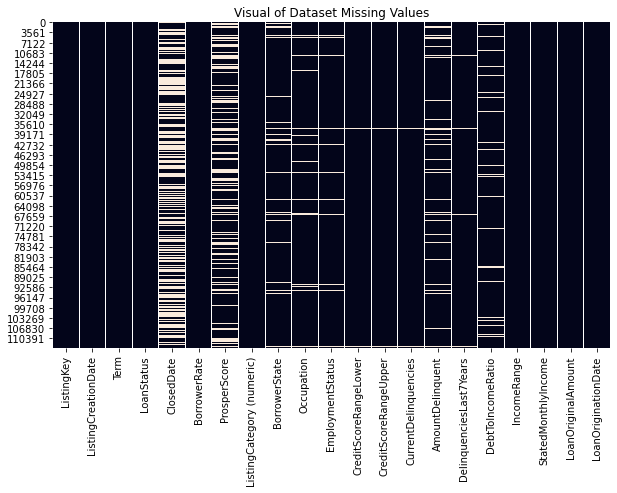

In [16]:
# plot heatmap to visualize missing values
plt.figure(figsize= [10, 6])
sb.heatmap(df_rel.isna(), cbar = False, cmap='rocket', fmt='.3f')
plt.title('Visual of Dataset Missing Values'); 

The debt to income ratio of the borrower is value is Null if the debt to income ratio is not available. This value is capped at 10.01 (any debt to income ratio larger than 1000% will be returned as 1001%).

The plot gives a clear picture of the of variables with missing values. Key features such as `IncomeRange, StatedMonthlyIncome, LoanOriginalAmount, LoanOriginationDate, and loanStatus` indicate no misiing values
`Closedate and Prosperscore` show high percentage of missing values at 51.65% and 25.53% respectively. The two columns are not focal, thus , will be dropped. Our target variables `DelinquenciesLast7Years` and `CurrentDelinquencies` indicate minimal missing values at 0.87% and 0.61% respectively; loans with missing delinquency data will be dropped to minimize inaccuracy. 

The debt to income ratio variable is missing 7.5% its data. Per the dataset dictionary, where the information is not available, a null value is entered. 
Although the rest of the variables show minimal missing values, below 8%, their relevance will be re-evaluated to justify inclusion and possible treatment. 

In [17]:
# view summary statistics for numric variables
df_rel.describe().apply(lambda z: z.apply(lambda x: format(x, 'f'))).T # format row and suppresses scientific notation 

count         mean          std  \
Term                       113937.000000    40.830248    10.436212   
BorrowerRate               113937.000000     0.192764     0.074818   
ProsperScore                84853.000000     5.950067     2.376501   
ListingCategory (numeric)  113937.000000     2.774209     3.996797   
CreditScoreRangeLower      113346.000000   685.567731    66.458275   
CreditScoreRangeUpper      113346.000000   704.567731    66.458275   
CurrentDelinquencies       113240.000000     0.592052     1.978707   
AmountDelinquent           106315.000000   984.507059  7158.270157   
DelinquenciesLast7Years    112947.000000     4.154984    10.160216   
DebtToIncomeRatio          105383.000000     0.275947     0.551759   
StatedMonthlyIncome        113937.000000  5608.025568  7478.497275   
LoanOriginalAmount         113937.000000  8337.013850  6245.800580   

                                   min          25%          50%  \
Term                         12.000000    36.000000    36.000000   
BorrowerRate                  0.000000     0.134000     0.184000   
ProsperScore                  1.000000     4.000000     6.000000   
ListingCategory (numeric)     0.000000     1.000000     1.000000   
CreditScoreRangeLower         0.000000   660.000000   680.000000   
CreditScoreRangeUpper        19.000000   679.000000   699.000000   
CurrentDelinquencies          0.000000     0.000000     0.000000   
AmountDelinquent              0.000000     0.000000     0.000000   
DelinquenciesLast7Years       0.000000     0.000000     0.000000   
DebtToIncomeRatio             0.000000     0.140000     0.220000   
StatedMonthlyIncome           0.000000  3200.333333  4666.666667   
LoanOriginalAmount         1000.000000  4000.000000  6500.000000   

                                    75%             max  
Term                          36.000000       60.000000  
BorrowerRate                   0.250000        0.497500  
ProsperScore                   8.000000       11.000000  
ListingCategory (numeric)      3.000000       20.000000  
CreditScoreRangeLower        720.000000      880.000000  
CreditScoreRangeUpper        739.000000      899.000000  
CurrentDelinquencies           0.000000       83.000000  
AmountDelinquent               0.000000   463881.000000  
DelinquenciesLast7Years        3.000000       99.000000  
DebtToIncomeRatio              0.320000       10.010000  
StatedMonthlyIncome         6825.000000  1750002.916667  
LoanOriginalAmount         12000.000000    35000.000000

Summary statistics show some discrete columns have minimum values of 0 which may point to possible nans or missing values.
Another inference that could be drawn is that most of the variables have a mean that is higher than the median indicating right skewness.
The maximum value of some of the variables are very far from their mean pointing to outliers in the dataset.

In [18]:
# view summary statistics for categorical variables
for col in df_rel.columns:
    if df_rel[col].dtype != 'O':
        pass
    else:
        data = pd.DataFrame(df_rel[col])
        print(data.describe().T) # display summary statistic

             count  unique                      top freq
ListingKey  113937  113066  17A93590655669644DB4C06    6
                      count  unique                            top freq
ListingCreationDate  113937  113064  2013-10-02 17:20:16.550000000    6
             count unique      top   freq
LoanStatus  113937     12  Current  56576
            count unique                  top freq
ClosedDate  55089   2802  2014-03-04 00:00:00  105
                count unique top   freq
BorrowerState  108422     51  CA  14717
             count unique    top   freq
Occupation  110349     67  Other  28617
                   count unique       top   freq
EmploymentStatus  111682      8  Employed  67322
              count unique             top   freq
IncomeRange  113937      8  $25,000-49,999  32192
                      count unique                  top freq
LoanOriginationDate  113937   1873  2014-01-22 00:00:00  491


From the top, the variable `ListingKey`'s unique value count is less than the total listing count and listing id `17A93590655669644DB4C06` occurs 6 times. There is a suspicion of duplicate record. This will be explore further.

In [19]:
# isolate and diplay the duplicate record
df_rel.loc[df_rel['ListingKey'] == '17A93590655669644DB4C06']

ListingKey            ListingCreationDate  Term  \
13078  17A93590655669644DB4C06  2013-10-02 17:20:16.550000000    60   
14888  17A93590655669644DB4C06  2013-10-02 17:20:16.550000000    60   
20569  17A93590655669644DB4C06  2013-10-02 17:20:16.550000000    60   
31450  17A93590655669644DB4C06  2013-10-02 17:20:16.550000000    60   
42750  17A93590655669644DB4C06  2013-10-02 17:20:16.550000000    60   
42751  17A93590655669644DB4C06  2013-10-02 17:20:16.550000000    60   

      LoanStatus ClosedDate  BorrowerRate  ProsperScore  \
13078    Current        NaN        0.1435           4.0   
14888    Current        NaN        0.1435           8.0   
20569    Current        NaN        0.1435           7.0   
31450    Current        NaN        0.1435          10.0   
42750    Current        NaN        0.1435           5.0   
42751    Current        NaN        0.1435           6.0   

       ListingCategory (numeric) BorrowerState Occupation  ...  \
13078                          1            MD      Other  ...   
14888                          1            MD      Other  ...   
20569                          1            MD      Other  ...   
31450                          1            MD      Other  ...   
42750                          1            MD      Other  ...   
42751                          1            MD      Other  ...   

      CreditScoreRangeLower  CreditScoreRangeUpper  CurrentDelinquencies  \
13078                 720.0                  739.0                   0.0   
14888                 720.0                  739.0                   0.0   
20569                 720.0                  739.0                   0.0   
31450                 720.0                  739.0                   0.0   
42750                 720.0                  739.0                   0.0   
42751                 720.0                  739.0                   0.0   

       AmountDelinquent  DelinquenciesLast7Years  DebtToIncomeRatio  \
13078               0.0                      0.0               0.41   
14888               0.0                      0.0               0.41   
20569               0.0                      0.0               0.41   
31450               0.0                      0.0               0.41   
42750               0.0                      0.0               0.41   
42751               0.0                      0.0               0.41   

          IncomeRange StatedMonthlyIncome  LoanOriginalAmount  \
13078  $25,000-49,999              3000.0               10000   
14888  $25,000-49,999              3000.0               10000   
20569  $25,000-49,999              3000.0               10000   
31450  $25,000-49,999              3000.0               10000   
42750  $25,000-49,999              3000.0               10000   
42751  $25,000-49,999              3000.0               10000   

       LoanOriginationDate  
13078  2014-01-13 00:00:00  
14888  2014-01-13 00:00:00  
20569  2014-01-13 00:00:00  
31450  2014-01-13 00:00:00  
42750  2014-01-13 00:00:00  
42751  2014-01-13 00:00:00  

[6 rows x 21 columns]

The record with the listing key 17A93590655669644DB4C06 hae 6 frequency. It is likely there are other records with similar disposition. So next we check for duplicated listing keys:

In [20]:
# check for duplicated listing keys
print('{} listing keys are duplicates!'.format(df_rel.ListingKey.duplicated().sum()))

871 listing keys are duplicates!


In [21]:
# take a general look at the duplicate
df_rel.loc[df_rel['ListingKey'].duplicated()].sort_values(by='ListingKey')['ListingKey'].reset_index(drop=True)[50:100]

50    0E0F3595663074287D094F4
51    0E46360057731956478F0C6
52    0ED935963528799464A73B9
53    0F043596202561788EA13D5
54    0F563597161095613517437
55    0FB03594033419037E3DEE3
56    0FE63589666879701965D2E
57    103B36002725491878567E3
58    10513595458161499429AF0
59    106335993636414276CB477
60    124035920869119558C76F7
61    12E135950665146999883CC
62    143F35915480322115CC389
63    148F358993411562516A227
64    15EE36016615209216208D4
65    15FD3598544141186AD0EB7
66    163A35932924340001C4F7D
67    167C35899336768316FF628
68    16D935877639843867B8CD7
69    16DF35942362737180DFA30
70    17673590191397599B04F32
71    176D3594206302808E74457
72    17A93590655669644DB4C06
73    17A93590655669644DB4C06
74    17A93590655669644DB4C06
75    17A93590655669644DB4C06
76    17A93590655669644DB4C06
77    17E035962771170915118B7
78    184C35976403828892ED6A1
79    185F360439569801000C899
80    18ED3592748609936EE4CF1
81    1987359827858610575623F
82    19953595116186443365DCB
83    199B

871 keys appear more than once. Summary statistics show key `17A93590655669644DB4C06` occuring 6 times! Loans associated with these keys were created on the same date/time though at different ProsperScore. These duplicates records will be dropped in the cleaning section. Also the "ListingKey" feature will excluded since it has no predictive value.

Some structural defects have been identified and the help of the dataset dictionary we understanding of some of the missing value. One such case is the missing values in `CloseDate` variable, which means the loan account is open and active!

*FinalPaymentInProcess, when loan are in final payment process, close date in unknown, nan*

*PastDue have no closed date; loan still active and the value nan*

*Completed status have closed date, that is the date loan account was closed*

*Chargedoff status have closed date*

*Defaulted status have closed date*

*Current status do not have closed date, acoount is current and active*

*Cancelled have closed date, date loan was cancelled*

#### Quality Issues identified:

CloseDate is stored as object

ListingCategory is stored as integer for 21 categories

TotalLineOfCreditLinesPast7Years is float

CurrentDelinquencies is float

DelinquenciesLast7Years is float

AmountDelinquent is float

LoanOriginalAmount is integer 

LoanOriginationDate is object

## Data Cleaning: 

#### Missing Value Treatment:

Our target variables, `DelinquenciesLast7Years` and `CurrentDelinquencies`has 0.87% and 0.61% of missing data respectively. In order to minimize prediction error, these records will be excluded from our investigation. So, our first step is to select non-null loan records with delinquency data. 

In [22]:
# select loans with non null delinquency data
loans = df_rel[df_rel['DelinquenciesLast7Years'].notna()].copy().reset_index(drop=True)
loans.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 112947 entries, 0 to 112946
Data columns (total 21 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 112947 non-null  object 
 1   ListingCreationDate        112947 non-null  object 
 2   Term                       112947 non-null  int64  
 3   LoanStatus                 112947 non-null  object 
 4   ClosedDate                 54099 non-null   object 
 5   BorrowerRate               112947 non-null  float64
 6   ProsperScore               84853 non-null   float64
 7   ListingCategory (numeric)  112947 non-null  int64  
 8   BorrowerState              108202 non-null  object 
 9   Occupation                 110261 non-null  object 
 10  EmploymentStatus           111594 non-null  object 
 11  CreditScoreRangeLower      112947 non-null  float64
 12  CreditScoreRangeUpper      112947 non-null  float64
 13  CurrentDelinquencies       11

Change target variables `DelinquenciesLast7Years` and `CurrentDelinquencies` types to integer using pandas astype() function.

#### Impute DebtToIncomeRatio with Column Median

Recall debt to income ratio variable missing 7.5% of its data. Here we will impute the variable with column median as this will not induce outlier effect.

In [23]:
# impute nan in `DebtToIncomeRatio` with column median
loans['DebtToIncomeRatio'].fillna(loans['DebtToIncomeRatio'].median(), inplace= True)
loans['DebtToIncomeRatio'].isna().sum() # test code

0

#### Treating Occupation and EmploymentStatus Missing Values:

In [24]:
# check for missing data in occupation variable
print('There are {} records with missing data.'.format(loans['Occupation'].isna().sum()))

There are 2686 records with missing data.


In [25]:
occu = loans.copy()
# view occupation in relation to income and employment variables to understand associated statuses
occu = occu[['Occupation','IncomeRange','EmploymentStatus','StatedMonthlyIncome']]

# isolate and view records with missing occupation data in relation to employment and income variables
occu[occu['Occupation'].isna()].sample(20).sort_values(by='EmploymentStatus')

Occupation     IncomeRange EmploymentStatus  StatedMonthlyIncome
66885         NaN  $50,000-74,999            Other          4583.333333
11153         NaN  $25,000-49,999            Other          3137.000000
52911         NaN  $50,000-74,999            Other          5416.666667
108755        NaN       $1-24,999            Other          1500.000000
69062         NaN  $25,000-49,999            Other          3166.666667
84166         NaN  $50,000-74,999            Other          6153.166667
15842         NaN  $50,000-74,999            Other          6000.000000
38852         NaN       $100,000+            Other         10083.333333
14285         NaN   Not displayed              NaN         14500.000000
96163         NaN   Not displayed              NaN          2083.333333
80461         NaN   Not displayed              NaN          9331.666667
71714         NaN   Not displayed              NaN          7500.000000
44799         NaN   Not displayed              NaN          3691.666667
45106         NaN   Not displayed              NaN          2250.000000
91322         NaN   Not displayed              NaN          2173.583333
73081         NaN   Not displayed              NaN          3333.333333
60458         NaN   Not displayed              NaN         16666.666667
89812         NaN   Not displayed              NaN          3916.666667
84601         NaN   Not displayed              NaN          2000.000000
38321         NaN   Not displayed              NaN         10508.333333

Records that are missing in occupation and employment status data do not have income range information displayed. On the other hand, records with missing occupation value that have employment status data do have income range data.

Assigning value for the loan records missing values for both occuption and employment status variables levels of the categories may significantly skew the distribution and introduce bias. So, these records will be excluded before we proceed.

In [26]:
# drop row with missing values in `Occupation` and `EmploymentStatus` variables
loans.dropna(subset= ['Occupation', 'EmploymentStatus'], how='all', inplace=True)
loans.isna().sum()

ListingKey                       0
ListingCreationDate              0
Term                             0
LoanStatus                       0
ClosedDate                   58848
BorrowerRate                     0
ProsperScore                 26741
ListingCategory (numeric)        0
BorrowerState                 4102
Occupation                    1333
EmploymentStatus                 0
CreditScoreRangeLower            0
CreditScoreRangeUpper            0
CurrentDelinquencies             0
AmountDelinquent              5279
DelinquenciesLast7Years          0
DebtToIncomeRatio                0
IncomeRange                      0
StatedMonthlyIncome              0
LoanOriginalAmount               0
LoanOriginationDate              0
dtype: int64

Now we have 1333 loans where occupation value is missing but employment status data is available. Lets take look.

In [27]:
occu_1 = loans.copy()
occu_1 = occu_1[['Occupation','IncomeRange','EmploymentStatus','StatedMonthlyIncome']].reset_index(drop=True)
occu_1[occu_1['Occupation'].isna()].sample(10).sort_values(by='EmploymentStatus')#

Occupation     IncomeRange EmploymentStatus  StatedMonthlyIncome
97825         NaN       $1-24,999            Other          1374.000000
29518         NaN       $1-24,999            Other          1583.333333
103492        NaN  $25,000-49,999            Other          2450.666667
7879          NaN  $25,000-49,999            Other          2083.333333
81228         NaN  $25,000-49,999            Other          2083.333333
41493         NaN  $25,000-49,999            Other          2583.333333
9809          NaN       $1-24,999            Other          1680.000000
44074         NaN  $50,000-74,999            Other          4166.666667
38909         NaN  $75,000-99,999            Other          7500.000000
43109         NaN  $25,000-49,999            Other          3750.000000

Looking at the table, loans missing in occupation data have employment status of "Other". Income and income range information is available. Next is to explore the occupation category to see the various levels.

In [28]:
# check for missing values in occupation "Other" category
occu_1[occu_1['Occupation']=='Other'].isna().sum()

Occupation             0
IncomeRange            0
EmploymentStatus       0
StatedMonthlyIncome    0
dtype: int64

In [29]:
# sample occupation values
occu_1[occu_1['Occupation']=='Other'].sample(50)

Occupation     IncomeRange EmploymentStatus  StatedMonthlyIncome
85057       Other  $50,000-74,999         Employed          5574.166667
79938       Other  $75,000-99,999        Full-time          7916.666667
66554       Other  $25,000-49,999    Self-employed          2816.666667
96154       Other       $1-24,999          Retired           141.416667
61992       Other  $50,000-74,999        Full-time          4605.333333
59381       Other       $100,000+        Full-time         10416.666667
85133       Other       $1-24,999         Employed          1500.000000
76494       Other  $25,000-49,999         Employed          3772.083333
61928       Other  $25,000-49,999        Full-time          2541.666667
31429       Other  $50,000-74,999         Employed          4625.000000
12812       Other  $25,000-49,999        Full-time          2916.666667
109281      Other    Not employed     Not employed             0.000000
37332       Other  $50,000-74,999         Employed          6000.000000
39913       Other  $50,000-74,999         Employed          5583.333333
99866       Other  $50,000-74,999        Full-time          6000.000000
75966       Other       $100,000+         Employed         10000.000000
21679       Other  $25,000-49,999        Full-time          2773.333333
83961       Other       $100,000+        Full-time          6696.333333
505         Other   Not displayed    Not available          1916.666667
3492        Other       $100,000+         Employed         14583.333333
105400      Other  $50,000-74,999         Employed          6000.000000
47692       Other       $100,000+         Employed         11666.666667
46087       Other  $50,000-74,999         Employed          4333.333333
16275       Other  $75,000-99,999    Self-employed          6250.000000
9984        Other  $75,000-99,999        Full-time          6500.000000
58667       Other  $25,000-49,999         Employed          2916.666667
102060      Other  $25,000-49,999        Full-time          3520.000000
85885       Other  $25,000-49,999         Employed          3750.000000
42209       Other  $75,000-99,999         Employed          6916.666667
31545       Other  $25,000-49,999    Self-employed          2666.666667
87772       Other  $50,000-74,999    Self-employed          4333.333333
82731       Other  $25,000-49,999         Employed          3250.000000
55795       Other  $50,000-74,999         Employed          4666.666667
27063       Other       $1-24,999         Employed          1541.666667
31716       Other  $25,000-49,999         Employed          2500.000000
24090       Other  $25,000-49,999    Self-employed          3333.333333
33693       Other       $100,000+    Self-employed         11666.666667
83581       Other  $50,000-74,999         Employed          5833.333333
92184       Other  $75,000-99,999         Employed          7166.666667
99996       Other  $25,000-49,999         Employed          3900.000000
107426      Other  $50,000-74,999         Employed          4333.333333
23079       Other  $25,000-49,999    Self-employed          3333.333333
29763       Other  $75,000-99,999         Employed          6416.666667
39316       Other       $100,000+         Employed          8333.333333
38372       Other  $50,000-74,999         Employed          5104.000000
80870       Other  $25,000-49,999        Full-time          2250.000000
75154       Other  $25,000-49,999         Employed          2958.333333
60846       Other  $50,000-74,999        Full-time          4256.083333
90666       Other       $100,000+         Employed         20833.333333
30931       Other  $50,000-74,999    Self-employed          5000.000000

Investigating the occupation "Other" category  shows that loans can be in any of the employment statuses. Again, assigning the employment status based on occupation may skew the distribution and introduce bias, as there is no way of discerning whether the employment is full-time, part-time, other etc. Therefore, loans with missing occupation data will be dropped!

In [30]:
# dropping rows with missing values in `Occupation` column  
loans.dropna(subset= ['Occupation'], inplace=True)

# remove other irrelevant variables with missing values 
drp_list = [col for col in loans.columns if loans[col].isna().sum() > 0 ]
loans.drop(columns=drp_list, axis=1, inplace=True)

print('Dropping missing value from "Occupation" also addresses missing value in the "EmploymentStatus" variable.')

Dropping missing value from "Occupation" also addresses missing value in the "EmploymentStatus" variable.


In [31]:
# remove redundant variables 
drp_list = [col for col in loans.columns if loans[col].isna().sum() > 0 ]
loans.drop(columns=drp_list, axis=1, inplace=True)
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110261 entries, 0 to 112946
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype  
---  ------                     --------------   -----  
 0   ListingKey                 110261 non-null  object 
 1   ListingCreationDate        110261 non-null  object 
 2   Term                       110261 non-null  int64  
 3   LoanStatus                 110261 non-null  object 
 4   BorrowerRate               110261 non-null  float64
 5   ListingCategory (numeric)  110261 non-null  int64  
 6   Occupation                 110261 non-null  object 
 7   EmploymentStatus           110261 non-null  object 
 8   CreditScoreRangeLower      110261 non-null  float64
 9   CreditScoreRangeUpper      110261 non-null  float64
 10  CurrentDelinquencies       110261 non-null  float64
 11  DelinquenciesLast7Years    110261 non-null  float64
 12  DebtToIncomeRatio          110261 non-null  float64
 13  IncomeRange                11

#### Addressing Quality Issues:

**Handle Duplicate Records:**

In [32]:
loans_ql = loans.copy() # make a copy()

#  duplcates count
loans_ql.duplicated(subset='ListingKey', keep='first')

# drop duplicates
loans_ql.drop_duplicates(subset= ['ListingKey'], keep= 'first', inplace=True)
print('There are {} duplicates listing key.'.format(loans_ql.duplicated().sum()))

loans_ql.shape

There are 0 duplicates listing key.


(109449, 17)

**Address Columns Type Issues:**

In [33]:
loans_ql = loans.copy()
# change target columns type to integer
col_to_int = ['DelinquenciesLast7Years','CurrentDelinquencies'] #  list of variables to change 
loans_ql[col_to_int] = loans_ql[col_to_int].astype('int') 

# change date columns type from object to datatime
loans_ql['ListingCreationDate'] = pd.to_datetime(loans_ql['ListingCreationDate'])
loans_ql['LoanOriginationDate'] = pd.to_datetime(loans_ql['LoanOriginationDate'])

# create column CreditScore and find the mean of lower and upper credit score limit
loans_ql['CreditScore'] = (loans_ql['CreditScoreRangeLower'] + loans_ql['CreditScoreRangeUpper'])/ 2
loans_ql['CreditScore'] = loans_ql['CreditScore'].astype('int')
loans_ql.drop(['CreditScoreRangeLower','CreditScoreRangeUpper'], axis=1, inplace=True) # drop lower and upper credit range

# test code
loans_ql.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110261 entries, 0 to 112946
Data columns (total 16 columns):
 #   Column                     Non-Null Count   Dtype         
---  ------                     --------------   -----         
 0   ListingKey                 110261 non-null  object        
 1   ListingCreationDate        110261 non-null  datetime64[ns]
 2   Term                       110261 non-null  int64         
 3   LoanStatus                 110261 non-null  object        
 4   BorrowerRate               110261 non-null  float64       
 5   ListingCategory (numeric)  110261 non-null  int64         
 6   Occupation                 110261 non-null  object        
 7   EmploymentStatus           110261 non-null  object        
 8   CurrentDelinquencies       110261 non-null  int32         
 9   DelinquenciesLast7Years    110261 non-null  int32         
 10  DebtToIncomeRatio          110261 non-null  float64       
 11  IncomeRange                110261 non-null  object  

#### Tidiness:

**Categorical Variables:**

`LoanStatus, EmploymentStatus, and IncomeRange` have categories names that have space or are hyphenated where name is more than word. 
`EmploymentStatus` and `IncomeRange` both have a category named `Not employed`. This can be confusing. The `incomeRange` `Not employed` will be renamed.

The loan status variable is categorical type with 7 level, however, the `Past Due` category is accompanied by deliquency sub-levels and are displayed along main category levels. The deliquency bucket will be remove in order to produce a single level and renamed `PastDue`. A combination of `lambda`, `apply()`, `split()` and `lower()` functions will be used to remove delinquency bucket and cast the labels to lowercase.

Initailly I observed the `Occupation` and `EmploymentStatus` have 3588 and 2255 missing values respectively. `LoanStatus` has 7741 loans with status `Not displayed`. The `IncomeRange` has 5347 loans with unavailable status, categorized as `Not availble`. Also noted is inconsistency in naming which we are going to address. 

`ListingCategory (numeric)` levels are coded as integer from 0-21 to represent loan category.This maypose difficulty in understanding loan type.

**LoanStatus:** Remove `Past Due` sub-levels using `lambda` and `split()` function.

In [34]:
# remove delinquency bucket and cast level name to lowercase
loans_ql['LoanStatus']= loans_ql['LoanStatus'].apply(lambda x: x.split()[0]) # combine levels
loans_ql['LoanStatus'] = [i.replace('Past', 'Past_Due') for i in loans_ql['LoanStatus']]
loans_ql['LoanStatus'] = [i.replace('Chargedoff', 'charged_off') for i in loans_ql['LoanStatus']]
loans_ql['LoanStatus'] = [i.replace('FinalPaymentInProgress', 'Final_Payment_In_Progress')
                         .lower() for i in loans_ql['LoanStatus']]

loans_ql['LoanStatus'].value_counts()

current                      55272
completed                    36583
charged_off                  11676
defaulted                     4472
past_due                      2053
final_payment_in_progress      203
cancelled                        2
Name: LoanStatus, dtype: int64

**EmploymentStatus**: 
Address inconsistent naming of the category levels.

In [35]:
# rename employment status variable
loans_ql['EmploymentStatus'] = [i.replace('-', '_').lower() for i in loans_ql['EmploymentStatus']] # replace hyphens in names
loans_ql['EmploymentStatus'] = [i.replace(' ', '_').lower() for i in loans_ql['EmploymentStatus']] # replace empty string
loans_ql['EmploymentStatus'].value_counts() # test code

employed         67322
full_time        26342
self_employed     6132
not_available     5279
other             2474
part_time         1084
not_employed       833
retired            795
Name: EmploymentStatus, dtype: int64

**Occupation:** Remove Irrelavant sub-classes and special characters. Cast label names to appropriate case.

In [36]:
# remove job sub-levels
loans_ql['Occupation']= loans_ql['Occupation'].apply(lambda x: x.split()[0]) 
#loans_ql['Occupation'].value_counts()

In [37]:
# create lists of labels where special character exist and/or name too long and store in a variable
old_v = ['Computer', 'Administrative','Accountant/CPA', 'Skilled', 'Food', 'Truck', 'Police', 
            'Civil', 'Social', 'Postal', "Nurse's", 'Waiter/Waitress', 'Bus', "Teacher's", 'Car','Flight']
# list of replacement  names and store in variable
new_v = ['Computer_programmer','Admin_assistant', 'Accountant', 'Skilled_worker','Food_Service', 'Truck_driver', 
            'Police_correction', 'Civil_Service', 'Social_worker', 'Postal_worker', 'Nurse_aide', 'Waiter_Waitress',
            'bus_driver', 'Teachers_aide', 'car_dealer', 'Flight_attendant']

# replace class names 
loans_ql['Occupation'] = loans_ql['Occupation'].replace(to_replace=old_v, value=new_v, regex=True)
loans_ql['Occupation'] = [i.lower() for i in loans_ql['Occupation']] # cast class label to lower case

print(list(set([col for col in loans_ql.Occupation.values])))

['car_dealer', 'biologist', 'skilled_worker', 'military', 'police_correction', 'pilot', 'investor', 'truck_driver', 'sales', 'teacher', 'nurse', 'construction', 'engineer', 'nurse_aide', 'computer_programmer', 'chemist', 'professional', 'flight_attendant', 'architect', 'retail', 'clerical', 'scientist', 'bus_driver', 'realtor', 'postal_worker', 'professor', 'landscaping', 'religious', 'clergy', 'doctor', 'admin_assistant', 'medical', 'judge', 'homemaker', 'dentist', 'food_service', 'fireman', 'laborer', 'psychologist', 'other', 'waiter_waitress', 'attorney', 'teachers_aide', 'social_worker', 'pharmacist', 'accountant', 'analyst', 'student', 'executive', 'tradesman', 'principal', 'civil_service']


In [38]:
# check for unique values
loans_ql.Occupation.nunique()

52

**IncomeRange**: 
Address the inconsistent naming of the category levels.

In [39]:
# rename income rane variable status variable
loans_ql['IncomeRange'] = [i.replace('Not employed', 'not_employed') for i in loans_ql['IncomeRange']] # replace hyphens in names
loans_ql['IncomeRange'] = [i.replace('Not displayed', 'not_displayed') for i in loans_ql['IncomeRange']] # replace empty string
loans_ql['IncomeRange'].value_counts() # test code

$25,000-49,999    31585
$50,000-74,999    30715
$100,000+         17297
$75,000-99,999    16819
$1-24,999          7005
not_displayed      5418
not_employed        804
$0                  618
Name: IncomeRange, dtype: int64

**ListingCategory (numeric):** Replace integer values with loan-type name(s), rename variable, and change type to Categorical.

In [40]:
# get unique values of the loan listing
cat_vals = [v for v in loans_ql['ListingCategory (numeric)'].values]
unique_vals = list(set(cat_vals))
print(unique_vals)

[0, 1, 2, 3, 4, 5, 6, 7, 8, 9, 10, 11, 12, 13, 14, 15, 16, 17, 18, 19, 20]


In [41]:
# create list of loan category name using the Prosper dictionary 
vals = ['Not Available', 'Debt Consolidation', 'Home Improvement', 'Business', 'Personal Loan', 
       'Student Use', 'Auto', 'Other', 'Baby&Adoption', 'Boat', 'Cosmetic Procedure', 'Engagement Ring', 
       'Green Loans', 'Household Expenses', 'Large Purchases', 'Medical/Dental', 'Motorcycle', 
       'RV', 'Taxes', 'Vacation', 'Wedding Loans']

# create loan category variable named `loanCategory`
loans_ql['LoanCategory'] = loans_ql['ListingCategory (numeric)'].replace(unique_vals, vals) # replace number labels with names

# change `LoanCategory` type to categorical
cat_vars= {'LoanCategory':vals}
             
for i in cat_vars:
    var = pd.api.types.CategoricalDtype(ordered = False, categories = cat_vars[i])
    loans_ql[i] = loans_ql[i].astype(var)


#loans.drop('ListingCategory (numeric)', axis=1, inplace=True)  # drop redundant column
loans_ql['LoanCategory'].dtypes # test code

CategoricalDtype(categories=['Not Available', 'Debt Consolidation', 'Home Improvement',
                  'Business', 'Personal Loan', 'Student Use', 'Auto', 'Other',
                  'Baby&Adoption', 'Boat', 'Cosmetic Procedure',
                  'Engagement Ring', 'Green Loans', 'Household Expenses',
                  'Large Purchases', 'Medical/Dental', 'Motorcycle', 'RV',
                  'Taxes', 'Vacation', 'Wedding Loans'],
                 ordered=False)

The name of the categories is in proper form and contain speacial characters and spaces, which we will address in order to be consistent with our convention. 

In [42]:
# remove or replace special characters and cast name in lowercase
loans_ql['LoanCategory'] = [i.replace(' ', '_').lower() for i in loans_ql['LoanCategory']]
loans_ql['LoanCategory'] = [i.replace('/', '_').lower() for i in loans_ql['LoanCategory']]
loans_ql['LoanCategory'] = [i.replace('&', '_').lower() for i in loans_ql['LoanCategory']]
print(set(loans_ql['LoanCategory']))

{'boat', 'engagement_ring', 'student_use', 'rv', 'green_loans', 'auto', 'vacation', 'baby_adoption', 'business', 'debt_consolidation', 'medical_dental', 'personal_loan', 'not_available', 'household_expenses', 'cosmetic_procedure', 'wedding_loans', 'other', 'large_purchases', 'motorcycle', 'home_improvement', 'taxes'}


Interesting observation on the EmploymentStatus variable. The category is broken down into `Employed`, `Full-Time`, `Self-employed`, `Not Available`, `Others`, `Part-Time`, `Unemployed`, and `Retired`. The `Employed` level contain some 67322 loans whose borrowers are employed but not labeled as full-time or otherwise. However, we have loans that borrowers' employment status is a level in the category. So, even though the category can be reordered, there is no reasonable way to discern and subset the level into full-time, or part-time, or self-employed.

**Order Categorical Variable(s)**

In [43]:
# create a dictionary of the list of categories and store in a variable
range_vars= {'IncomeRange': ['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
                             '$75,000-99,999', '$100,000+', 'not_employed', 'not_displayed'], 
             'EmploymentStatus': ['employed', 'full_time','part_time','self_employed','retired','other','not_employed','not_available'],
             'LoanStatus': ['current','completed','charged_off','cancelled','defaulted','final_payment_in_progress','past_due']}

# loop to order the categories
for i in range_vars:
    var = pd.api.types.CategoricalDtype(ordered = True, categories = range_vars[i])
    loans[i] = loans_ql[i].astype(var)

# view renamed and ordered categories
disp = ['LoanStatus','EmploymentStatus','IncomeRange']
[loans_ql.value_counts(i) for i in disp]

[LoanStatus
 current                      55272
 completed                    36583
 charged_off                  11676
 defaulted                     4472
 past_due                      2053
 final_payment_in_progress      203
 cancelled                        2
 dtype: int64,
 EmploymentStatus
 employed         67322
 full_time        26342
 self_employed     6132
 not_available     5279
 other             2474
 part_time         1084
 not_employed       833
 retired            795
 dtype: int64,
 IncomeRange
 $25,000-49,999    31585
 $50,000-74,999    30715
 $100,000+         17297
 $75,000-99,999    16819
 $1-24,999          7005
 not_displayed      5418
 not_employed        804
 $0                  618
 dtype: int64]

In [44]:
loans.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 110261 entries, 0 to 112946
Data columns (total 17 columns):
 #   Column                     Non-Null Count   Dtype   
---  ------                     --------------   -----   
 0   ListingKey                 110261 non-null  object  
 1   ListingCreationDate        110261 non-null  object  
 2   Term                       110261 non-null  int64   
 3   LoanStatus                 110261 non-null  category
 4   BorrowerRate               110261 non-null  float64 
 5   ListingCategory (numeric)  110261 non-null  int64   
 6   Occupation                 110261 non-null  object  
 7   EmploymentStatus           110261 non-null  category
 8   CreditScoreRangeLower      110261 non-null  float64 
 9   CreditScoreRangeUpper      110261 non-null  float64 
 10  CurrentDelinquencies       110261 non-null  float64 
 11  DelinquenciesLast7Years    110261 non-null  float64 
 12  DebtToIncomeRatio          110261 non-null  float64 
 13  IncomeRange   

**Feature Engineering:**

**StatedMonthlyIncome**

In [45]:
loans_eng = loans_ql.copy()
# summary view
loans_eng['StatedMonthlyIncome'].describe()

count    1.102610e+05
mean     5.642898e+03
std      7.569592e+03
min      0.000000e+00
25%      3.250000e+03
50%      4.678333e+03
75%      6.833333e+03
max      1.750003e+06
Name: StatedMonthlyIncome, dtype: float64

In [46]:
# view unique values for income
loans_eng['StatedMonthlyIncome'].nunique()

13101

In [47]:
odd_vals = loans_eng[loans_eng['StatedMonthlyIncome']< 400].copy()
odd_vals['StatedMonthlyIncome'].value_counts().head(50)

0.000000      1377
0.083333       220
166.666667      20
250.000000      20
125.000000      14
208.333333      14
333.333333      13
200.000000      11
291.666667      10
100.000000       9
41.666667        8
233.333333       7
83.333333        7
133.333333       7
175.000000       7
2.916667         6
375.000000       6
158.333333       6
116.666667       6
391.666667       5
141.666667       5
300.000000       5
91.666667        4
183.333333       4
216.666667       4
191.666667       4
3.000000         4
141.416667       3
2.500000         3
4.166667         3
3.750000         3
10.000000        3
150.000000       3
2.416667         3
3.333333         3
325.000000       3
9.416667         2
5.000000         2
4.333333         2
90.000000        2
79.166667        2
167.750000       2
5.833333         2
366.666667       2
241.666667       2
266.666667       2
37.500000        2
34.583333        2
120.833333       2
212.750000       2
Name: StatedMonthlyIncome, dtype: int64

In [48]:
loans_eng['StatedMonthlyIncome'].mean()

5642.898269410851

Some of the income value do not represent real life income and their occurence in the datset is low
Values such as: 0.000000,  0.083333 and 0.25000. While zero could be assumed to be no income, the rest makes no sense for income value. Lets explore.

In [49]:
# create dataframe to assess 0.083333 frequency and relation
odd_vals[odd_vals['StatedMonthlyIncome']  == 0.083333]\
[['StatedMonthlyIncome','IncomeRange', 'EmploymentStatus']].sample(50)

StatedMonthlyIncome    IncomeRange EmploymentStatus
77007              0.083333      $1-24,999        full_time
57283              0.083333      $1-24,999        full_time
35071              0.083333      $1-24,999        full_time
76298              0.083333      $1-24,999    self_employed
64367              0.083333  not_displayed    not_available
111328             0.083333      $1-24,999    self_employed
35972              0.083333      $1-24,999        full_time
54327              0.083333      $1-24,999    self_employed
50223              0.083333      $1-24,999        part_time
85534              0.083333      $1-24,999        part_time
54046              0.083333   not_employed     not_employed
19719              0.083333      $1-24,999    self_employed
110018             0.083333      $1-24,999    self_employed
11710              0.083333      $1-24,999        full_time
103262             0.083333      $1-24,999        full_time
572                0.083333      $1-24,999          retired
49062              0.083333      $1-24,999    self_employed
69777              0.083333      $1-24,999    self_employed
37307              0.083333   not_employed     not_employed
35840              0.083333      $1-24,999    self_employed
19127              0.083333      $1-24,999    self_employed
108159             0.083333   not_employed     not_employed
90562              0.083333  not_displayed    not_available
102891             0.083333      $1-24,999    self_employed
107278             0.083333      $1-24,999    self_employed
52432              0.083333      $1-24,999        full_time
55818              0.083333  not_displayed    not_available
24638              0.083333      $1-24,999        full_time
58527              0.083333   not_employed     not_employed
32525              0.083333      $1-24,999        part_time
225                0.083333  not_displayed        full_time
6908               0.083333      $1-24,999    self_employed
85258              0.083333      $1-24,999        full_time
45524              0.083333  not_displayed    self_employed
2371               0.083333   not_employed     not_employed
62970              0.083333  not_displayed    not_available
9921               0.083333      $1-24,999    self_employed
110180             0.083333      $1-24,999    self_employed
80086              0.083333      $1-24,999        full_time
70236              0.083333      $1-24,999    self_employed
7987               0.083333      $1-24,999    self_employed
89103              0.083333      $1-24,999    self_employed
15437              0.083333  not_displayed    not_available
48847              0.083333  not_displayed    not_available
32978              0.083333      $1-24,999        full_time
105581             0.083333      $1-24,999        part_time
16684              0.083333  not_displayed    not_available
16607              0.083333      $1-24,999    self_employed
37698              0.083333      $1-24,999        full_time
52315              0.083333      $1-24,999        full_time

Fom the above table, there are 220 counts of the income value 0.083333 from `StatedMonthlyIncome` column. I observed the value is associated with the different employment statuses such as "full_time", "retired", NaN, "self_employed", "not_available" etc, and income range. This could be entry error or generated value. It makes sense that income is 0 than 0.083333. I will define this as inconsistent, thus exclude them from the analysis. Also, 0.833333, and 0.250000 seem random. Given that their occurence is once, they are going to be excluded.

In [50]:
# examine income variable where value is 0
odd_vals[odd_vals['StatedMonthlyIncome']  == 0.000000]\
[['StatedMonthlyIncome','IncomeRange', 'EmploymentStatus','LoanOriginalAmount','LoanCategory']].sample(10)

StatedMonthlyIncome   IncomeRange EmploymentStatus  \
90625                   0.0  not_employed     not_employed   
101488                  0.0  not_employed     not_employed   
63488                   0.0            $0    self_employed   
80572                   0.0  not_employed     not_employed   
74042                   0.0  not_employed     not_employed   
31245                   0.0  not_employed     not_employed   
110607                  0.0  not_employed     not_employed   
103387                  0.0  not_employed     not_employed   
90239                   0.0            $0        full_time   
38773                   0.0            $0        full_time   

        LoanOriginalAmount        LoanCategory  
90625                 3000  debt_consolidation  
101488                1000               other  
63488                 8700       not_available  
80572                 4000  household_expenses  
74042                 7500  debt_consolidation  
31245                 1200               other  
110607                1200               other  
103387                4000    home_improvement  
90239                 8500       not_available  
38773                25000       not_available

From the above table, when `StatedMonthlyIncome` is 0.0 `IncomeRange` is either $0 or "not_employed" which makes sense. So, these records will be retained for further investigation.

The income variable,`StatedMonthlyIncome` is float with 6 decimals and holds monthly income. We need to compute for yearly income in order to match income range and trim the values to two decimals.

In [51]:
# remove rows with inconsistent income value
loans_eng = loans_ql.copy()
df_1 = (loans_eng[loans_eng['StatedMonthlyIncome'] == 0.000000]) 
df_2 =(loans_eng[loans_eng['StatedMonthlyIncome'] >= 500]) # select income above 500$

df_1 = df_1.append(df_2)
df_1 = df_1.reset_index(drop=True)
df_1.head() # display top five records

ListingKey     ListingCreationDate  Term   LoanStatus  \
0  0DFE3425061927556BB8A75 2008-06-29 23:23:40.157    36  charged_off   
1  0F67356860455769574096F 2013-01-25 11:48:26.040    36  charged_off   
2  10C034203841683992703F1 2008-04-29 08:26:00.340    36    completed   
3  10EC3516168266498E5E38A 2011-05-10 12:53:38.783    36      current   
4  34D1354489785280859E146 2012-04-14 05:39:18.747    36    completed   

   BorrowerRate  ListingCategory (numeric) Occupation EmploymentStatus  \
0        0.1700                          3    realtor        full_time   
1        0.3134                         13      other     not_employed   
2        0.2600                          1  executive        full_time   
3        0.3199                          7      other     not_employed   
4        0.2499                          7      other     not_employed   

   CurrentDelinquencies  DelinquenciesLast7Years  DebtToIncomeRatio  \
0                     0                        0               0.22   
1                     0                        0               0.22   
2                     0                        0               0.22   
3                     0                        0               0.22   
4                     0                        0               0.22   

    IncomeRange  StatedMonthlyIncome  LoanOriginalAmount LoanOriginationDate  \
0            $0                  0.0                4800          2008-07-08   
1  not_employed                  0.0                4000          2013-01-30   
2            $0                  0.0               14000          2008-05-09   
3  not_employed                  0.0                5000          2011-05-26   
4  not_employed                  0.0               10000          2012-04-17   

   CreditScore        LoanCategory  
0          729            business  
1          729  household_expenses  
2          649  debt_consolidation  
3          649               other  
4          769               other

In [52]:
# view unique values for each variable
df_1.apply(lambda x: x.nunique())

ListingKey                   108725
ListingCreationDate          108723
Term                              3
LoanStatus                        7
BorrowerRate                   2261
ListingCategory (numeric)        21
Occupation                       52
EmploymentStatus                  8
CurrentDelinquencies             44
DelinquenciesLast7Years         100
DebtToIncomeRatio               222
IncomeRange                       8
StatedMonthlyIncome           12886
LoanOriginalAmount             2408
LoanOriginationDate            1749
CreditScore                      26
LoanCategory                     21
dtype: int64

In [53]:
# compute for yearly income based on `StatedMonthlyIncome` and store in a new variable `YearlyIncome`
df_1['YearlyIncome'] = df_1['StatedMonthlyIncome'] * 12
df_1.head()

ListingKey     ListingCreationDate  Term   LoanStatus  \
0  0DFE3425061927556BB8A75 2008-06-29 23:23:40.157    36  charged_off   
1  0F67356860455769574096F 2013-01-25 11:48:26.040    36  charged_off   
2  10C034203841683992703F1 2008-04-29 08:26:00.340    36    completed   
3  10EC3516168266498E5E38A 2011-05-10 12:53:38.783    36      current   
4  34D1354489785280859E146 2012-04-14 05:39:18.747    36    completed   

   BorrowerRate  ListingCategory (numeric) Occupation EmploymentStatus  \
0        0.1700                          3    realtor        full_time   
1        0.3134                         13      other     not_employed   
2        0.2600                          1  executive        full_time   
3        0.3199                          7      other     not_employed   
4        0.2499                          7      other     not_employed   

   CurrentDelinquencies  DelinquenciesLast7Years  DebtToIncomeRatio  \
0                     0                        0               0.22   
1                     0                        0               0.22   
2                     0                        0               0.22   
3                     0                        0               0.22   
4                     0                        0               0.22   

    IncomeRange  StatedMonthlyIncome  LoanOriginalAmount LoanOriginationDate  \
0            $0                  0.0                4800          2008-07-08   
1  not_employed                  0.0                4000          2013-01-30   
2            $0                  0.0               14000          2008-05-09   
3  not_employed                  0.0                5000          2011-05-26   
4  not_employed                  0.0               10000          2012-04-17   

   CreditScore        LoanCategory  YearlyIncome  
0          729            business           0.0  
1          729  household_expenses           0.0  
2          649  debt_consolidation           0.0  
3          649               other           0.0  
4          769               other           0.0

#### Create Cleaned Dataset for Distribution Analysis

In [54]:
# drop redundant columns 
loans_clean = df_1.copy() # make copy
cols_to_drop = ['ListingKey','ListingCreationDate', 'ListingCategory (numeric)','StatedMonthlyIncome'] # select columns to drop
loans_clean.drop(columns=cols_to_drop, axis=1, inplace=True) # drop redundant columns
loans_clean.info() # display info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109537 entries, 0 to 109536
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype         
---  ------                   --------------   -----         
 0   Term                     109537 non-null  int64         
 1   LoanStatus               109537 non-null  object        
 2   BorrowerRate             109537 non-null  float64       
 3   Occupation               109537 non-null  object        
 4   EmploymentStatus         109537 non-null  object        
 5   CurrentDelinquencies     109537 non-null  int32         
 6   DelinquenciesLast7Years  109537 non-null  int32         
 7   DebtToIncomeRatio        109537 non-null  float64       
 8   IncomeRange              109537 non-null  object        
 9   LoanOriginalAmount       109537 non-null  int64         
 10  LoanOriginationDate      109537 non-null  datetime64[ns]
 11  CreditScore              109537 non-null  int32         
 12  LoanCategory    

In [55]:
# save cleaned loans dataset to csv file 
loans_clean.to_csv('loans_eda.csv', index = False)

### What is the structure of your dataset?

The are 113937 loan records spread across 81 columns. Three columns are stored as boolean type; 50 are stored as floating point; 11 columns stored as integer; and 17 columns are stored as object.

### What is/are the main feature(s) of interest in your dataset?

`DelinquenciesLast7Years`, `CurrentDelinquencies`; both representing delinquency and its frequencies as related to each account. 


### What features in the dataset do you think will help support your investigation into your feature(s) of interest?

There are quite a few features in the dataset. However, for this exploration, I using `BorrowersRate` which is the rate at which loan was issued;`LoanOriginalAmount`- the loaned amount, `EmploymentStatus`- status of applicant's employment when loan was issued, `DebtToIncomeRatio` - the ratio of debt to income, `StatedMonthlyIncome`- monthly income, `IncomeRange` - the income group each loan falls into;  `LoanStatus`, and to some extent, `Occupation`.


<a id='univariate'></a>
## Univariate Exploration


**Target Variables: `DelinquenciesLast7Years` and  `CurrentDelinquencies`**

Next, I will examine the distribution of variables.

In [56]:
# load cleaned dataset
loan_df = pd.read_csv('loans_eda.csv')
loan_df.head() # display first five records

Term   LoanStatus  BorrowerRate Occupation EmploymentStatus  \
0    36  charged_off        0.1700    realtor        full_time   
1    36  charged_off        0.3134      other     not_employed   
2    36    completed        0.2600  executive        full_time   
3    36      current        0.3199      other     not_employed   
4    36    completed        0.2499      other     not_employed   

   CurrentDelinquencies  DelinquenciesLast7Years  DebtToIncomeRatio  \
0                     0                        0               0.22   
1                     0                        0               0.22   
2                     0                        0               0.22   
3                     0                        0               0.22   
4                     0                        0               0.22   

    IncomeRange  LoanOriginalAmount LoanOriginationDate  CreditScore  \
0            $0                4800          2008-07-08          729   
1  not_employed                4000          2013-01-30          729   
2            $0               14000          2008-05-09          649   
3  not_employed                5000          2011-05-26          649   
4  not_employed               10000          2012-04-17          769   

         LoanCategory  YearlyIncome  
0            business           0.0  
1  household_expenses           0.0  
2  debt_consolidation           0.0  
3               other           0.0  
4               other           0.0

In [57]:
loan_df.info() # display dataset info

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 109537 entries, 0 to 109536
Data columns (total 14 columns):
 #   Column                   Non-Null Count   Dtype  
---  ------                   --------------   -----  
 0   Term                     109537 non-null  int64  
 1   LoanStatus               109537 non-null  object 
 2   BorrowerRate             109537 non-null  float64
 3   Occupation               109537 non-null  object 
 4   EmploymentStatus         109537 non-null  object 
 5   CurrentDelinquencies     109537 non-null  int64  
 6   DelinquenciesLast7Years  109537 non-null  int64  
 7   DebtToIncomeRatio        109537 non-null  float64
 8   IncomeRange              109537 non-null  object 
 9   LoanOriginalAmount       109537 non-null  int64  
 10  LoanOriginationDate      109537 non-null  object 
 11  CreditScore              109537 non-null  int64  
 12  LoanCategory             109537 non-null  object 
 13  YearlyIncome             109537 non-null  float64
dtypes: f

Examine frequency distribution of our target.

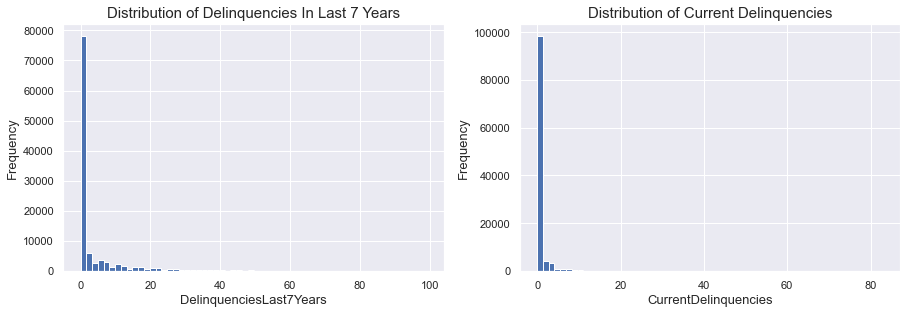

In [58]:
# plot delinquencies variables on standard scale
sb.set(style = 'darkgrid')
plt.figure(figsize= (15,10))

plt.subplot(2,2,1)
plt.hist(data=loan_df, x='DelinquenciesLast7Years', bins=60)
plt.title('Distribution of Delinquencies In Last 7 Years', fontsize= 15)
plt.xlabel('DelinquenciesLast7Years', fontsize= 13)
plt.ylabel('Frequency', fontsize= 13)

plt.subplot(2,2,2)
plt.hist(data=loan_df, x='CurrentDelinquencies', bins=60)
plt.title('Distribution of Current Delinquencies', fontsize= 15)
plt.xlabel('CurrentDelinquencies', fontsize= 13)
plt.ylabel('Frequency', fontsize= 13);

In [59]:
# determine range for DelinquenciesLast7Years on log scale 
print(np.log10((loan_df['DelinquenciesLast7Years'].replace(0, np.nan).describe()))) # convert 0 to numpy nan to avert division by 0 error
print(np.log10((loan_df['CurrentDelinquencies'].replace(0, np.nan).describe())))

count    4.545332
mean     1.106890
std      1.155584
min      0.000000
25%      0.477121
50%      0.903090
75%      1.230449
max      1.995635
Name: DelinquenciesLast7Years, dtype: float64
count    4.346470
mean     0.444075
std      0.535160
min      0.000000
25%      0.000000
50%      0.000000
75%      0.477121
max      1.919078
Name: CurrentDelinquencies, dtype: float64


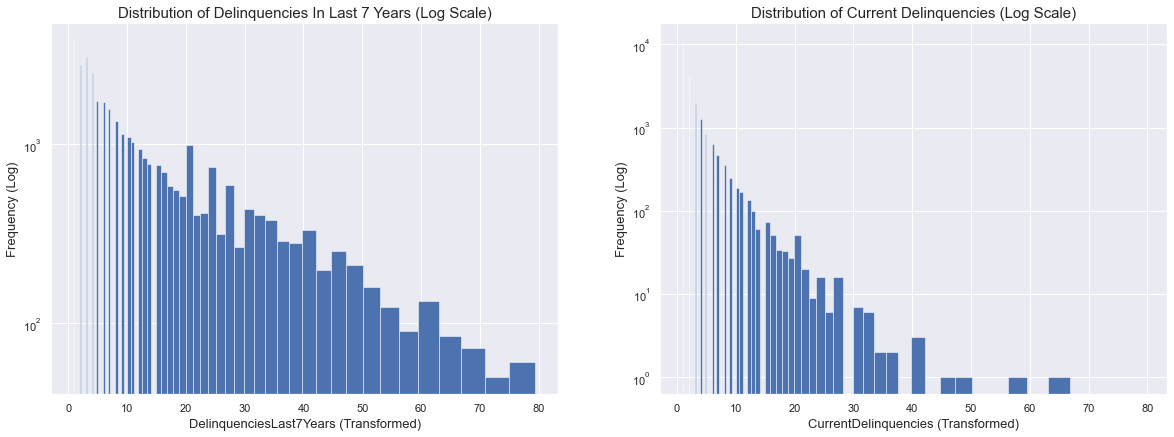

In [60]:
# plot delinquencies variables on on log scale
plt.figure(figsize= [20, 15],)

# plot histogram of `DelinquenciesLast7Years`
plt.subplot(2,2,1)
bins = 10 ** np.arange(0, 1.9 + 0.025, 0.025) # compute bin size
plt.hist(data = loan_df, x = 'DelinquenciesLast7Years', bins = bins, log=True, linewidth=0.5);
plt.title('Distribution of Delinquencies In Last 7 Years (Log Scale)', fontsize= 15)
plt.xlabel('DelinquenciesLast7Years (Transformed)', fontsize= 13)
plt.ylabel('Frequency (Log)', fontsize= 13)

# plot histogram of `CurrentDelinquencies`
plt.subplot(2,2,2)
bins = 10 ** np.arange(0, 1.9 + 0.025, 0.025) # compute bin size
plt.hist(data = loan_df, x = 'CurrentDelinquencies', bins = bins, log=True, linewidth=0.5);
plt.title('Distribution of Current Delinquencies (Log Scale)', fontsize= 15)
plt.xlabel('CurrentDelinquencies (Transformed)', fontsize= 13)
plt.ylabel('Frequency (Log)', fontsize= 13);

In [61]:
# create function to check outlier(s)
def outlier_checker(df,column):
    plt.figure(figsize=[7, 5])
    sb.boxplot(data=df,x=df[column])
    plt.title(column +' '+ 'Outlier(s)')
    plt.show()

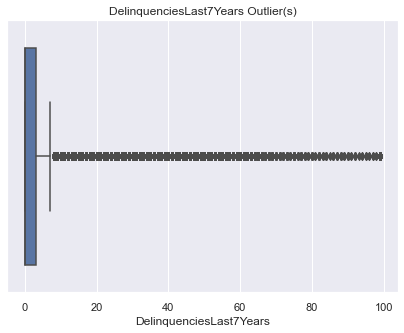

In [62]:
# recall function to check for outlier(s)
outlier_checker(loan_df, 'DelinquenciesLast7Years')

**_How are delinquencies distributed?_**

The distribution of delinquent loans is continuous with a large spike at zero representing loans with no delinquencies. The distribution is skewed to the right.
On standard scale, the tails appear short. On log scale, the tail is long and the distribution appears not normal. Gaps are observed at the lower bound for both variables, though the `CurrentDelinquencies` show more gaps at the upper boundary: approximately at points (30, 39, 51-58) etc. 
The `CurrentDelinquencies` indicate no frequencies at upper boundary points of ~(70 and 80) unlike the `DelinquenciesLast7Year`. The mode for both variables lie at point 0 and the frequencies decline  with occasional mild peaks. Observing just the peak points, they appear to be falling as the delinquency scale increases. There appear to be more non-delinquent than there is delinquent ones. 

The log transformation has not normalize the distribution so next, Box-Cox tranformation will be implemented to attempt normalization:

#### Box-Cox Transformation:

*note: Box-Cox requires that all values to be transformed are positive. For this reason value zero will be exluded from the considered delinquencies columns.*

0.053038451830859736 is the best lambda value for transforming DelinquenciesLast7Years.
-0.8525885214496883 is the best lambda value for transforming CurrentDelinquencies.


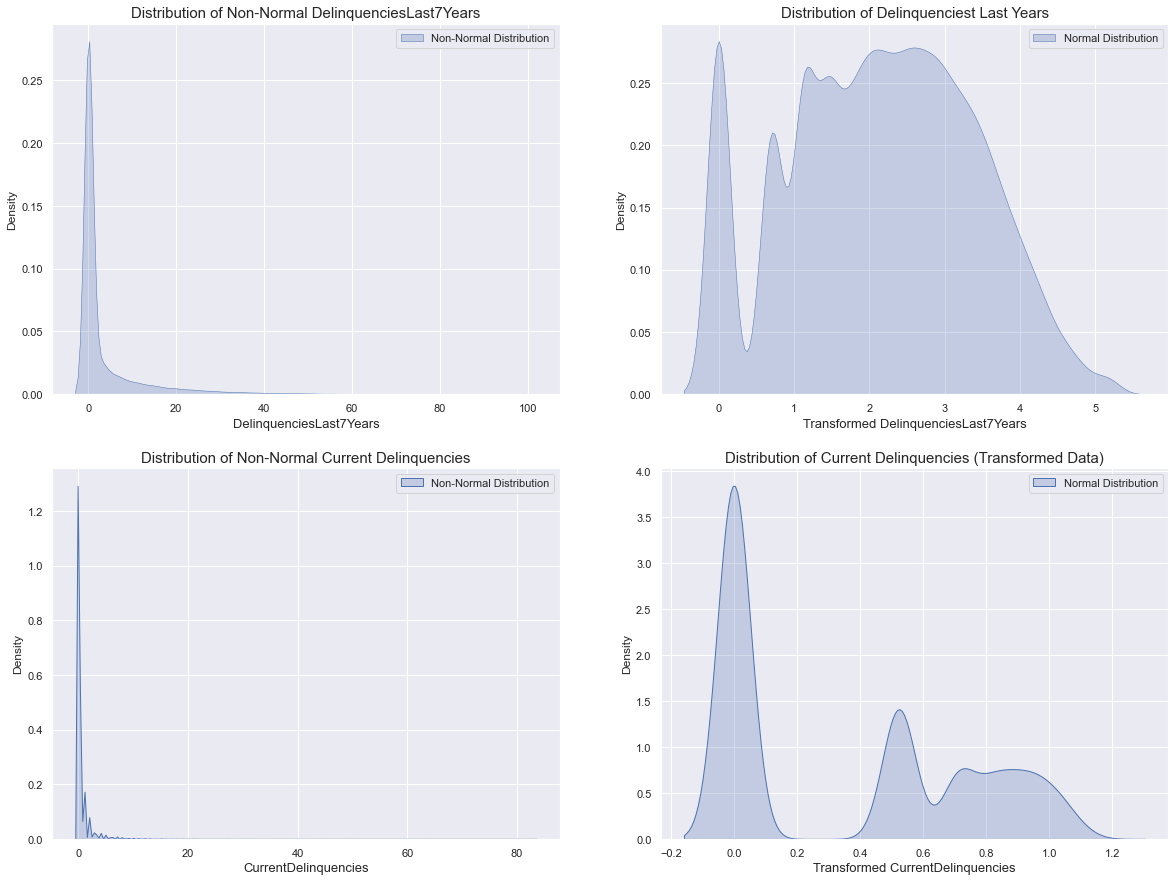

In [63]:
from scipy import stats
# suppress deprecated warning from system
from warnings import simplefilter # import warnings filter
simplefilter(action='ignore', category=FutureWarning) # ignore all future warnings

delinquency = loan_df.copy() # make a copy of loans dataframe

# create dataframe with positive values for `DelinquenciesLast7Years` column
df_7yr_del = delinquency[delinquency['DelinquenciesLast7Years']  > 0 ].copy().reset_index(drop=True) 

# compute lambda value and transform DelinquenciesLast7Years column 
trans_7yr, lambda_value = stats.boxcox(df_7yr_del['DelinquenciesLast7Years'])
print('{} is the best lambda value for transforming DelinquenciesLast7Years.'.format(lambda_value)) 

# create dataframe with positive values for `CurrentDelinquencies` column
df_cur_del = delinquency[delinquency['CurrentDelinquencies']  > 0 ].copy().reset_index(drop=True)

# compute lambda value and transform CurrentDelinquencies column 
trans_cur, lambda_value = stats.boxcox(df_cur_del['CurrentDelinquencies'])
print('{} is the best lambda value for transforming CurrentDelinquencies.'.format(lambda_value))



# plot distribution for the original and transformed delinquencies data
c_palette = sb.color_palette()[0] # recall color palette used earlier
plt.figure(figsize=(20, 15))

# plots the original non-normal `DelinquenciesLast7Years` data:
plt.subplot(2,2,1)
sb.distplot(delinquency['DelinquenciesLast7Years'], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 0.5},
label = 'Non-Normal Distribution', color = c_palette)
plt.legend(loc = 'upper right')
plt.title('Distribution of Non-Normal DelinquenciesLast7Years',  fontsize= 15)
plt.xlabel('DelinquenciesLast7Years', fontsize= 13)

# plots the transformed `DelinquenciesLast7Years` data
plt.subplot(2,2,2)
sb.distplot(trans_7yr, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 0.5}, 
            label = 'Normal Distribution', color = c_palette);
plt.legend(loc = 'upper right')
plt.title('Distribution of Delinquenciest Last Years', fontsize= 15)
plt.xlabel('Transformed DelinquenciesLast7Years', fontsize= 13)



# plots the original non-normal `CurrentDelinquencies` data
plt.subplot(2,2,3)
sb.distplot(delinquency['CurrentDelinquencies'], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 1},
            label = 'Non-Normal Distribution', color = c_palette)
plt.legend(loc = 'upper right')
plt.title('Distribution of Non-Normal Current Delinquencies', fontsize= 15)
plt.xlabel('CurrentDelinquencies', fontsize= 13)

# plots the transformed `CurrentDelinquencies` data
plt.subplot(2,2,4)
sb.distplot(trans_cur, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 1}, 
            label = 'Normal Distribution', color = c_palette)
plt.legend(loc = 'upper right') 
plt.title('Distribution of Current Delinquencies (Transformed Data)', fontsize= 15)
plt.xlabel('Transformed CurrentDelinquencies', fontsize= 13);

There is a large spike at point zero and multiple peaks! 
Log transformation only scaled the data points, revealed outliers but did not normalize the distributions. There appears to be  less delinquent loans than there is delinquent ones.

Using Box-Cox transformation shade more light. Though the distributions show more than two peaks for both variables, an interesting observation is at point 0 which appear seperate from the rest of the points and is characterized by a large spike and the frequncies are symmetrically distributed around it. 

This observation is very clear in the `CurrentDelinquencies` variable plot where the distribution appears symmetrical between points -0.2 and 0.2 with center at 0, and then followed by gap. Another peak is observed between 0.4 and 0.6 points whereafter there is a dip and peak with some sort of plateau.
The transformed `DelinquenciesLast7Years` variable exhibit similar tendency but with no clear gap between the spike at 0 and the subsequent peak. In the dataset, 0 represents loans that have no delinquencies at the time the account was pulled.

 **_Could the many peaks mean multiple loan types lump together? Or could it be outlier(s) effect(s) on the distribution?_**

**Next, is to understand how many processes are involve and identify the feature:**

Per Prosper Loan dictionary, `LoanCategory` stores the different loans type. So, I will hue plot with `LoanCategory` variable for observation.

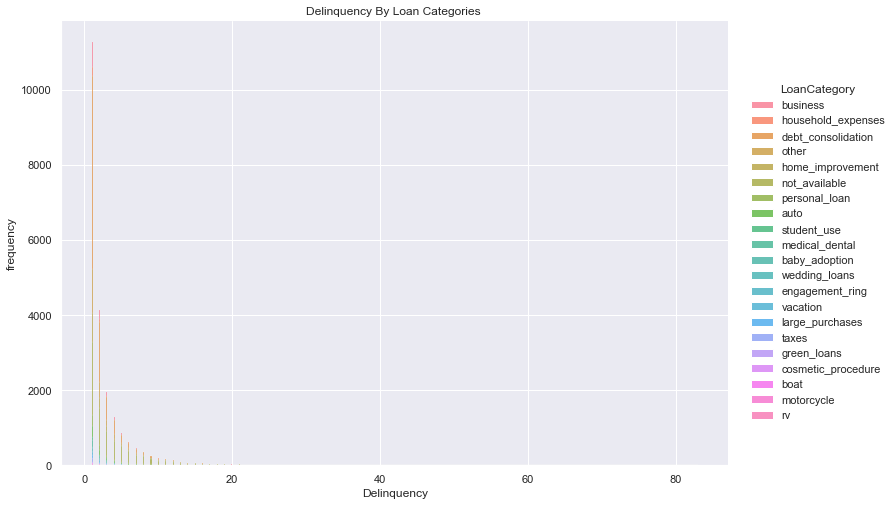

In [64]:
# display the delinquency by loan type
sb.displot(data= loan_df, x=loan_df['CurrentDelinquencies'].replace(0, np.nan), 
           hue= 'LoanCategory',multiple='stack',
          height=7, aspect= 1.5,)
plt.title('Delinquency By Loan Categories ')
plt.ylabel('frequency')
plt.xlabel('Delinquency');

Though the plot above highlight the loan types embedded in the datset, it does not depict the distribution clearly. Next, I will Kernel Density Estimation to display the distribution.

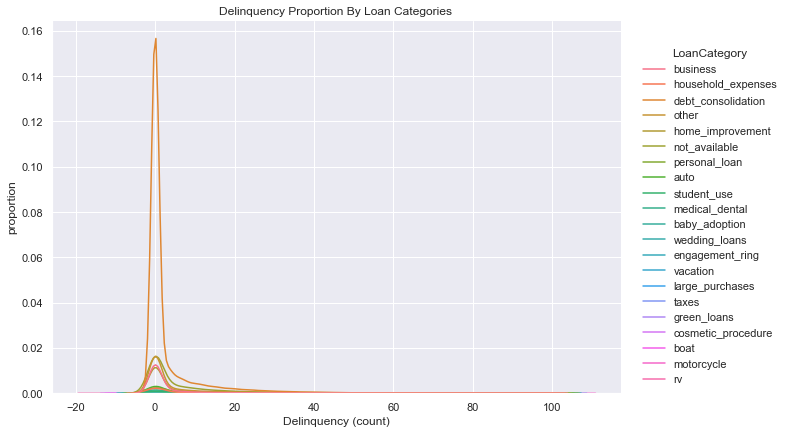

In [65]:
# plot density estimation of DelinquenciesLast7Years by category
sb.displot(data= loan_df, x=loan_df['DelinquenciesLast7Years'], hue= 'LoanCategory', 
           kind= 'kde', height=6, aspect= 1.5)
plt.title('Delinquency Proportion By Loan Categories ')
plt.ylabel('proportion')
plt.xlabel('Delinquency (count)');

In [66]:
gf=loan_df[loan_df['DelinquenciesLast7Years']<1]
gf['LoanCategory'].value_counts(normalize=True)

debt_consolidation    0.559307
not_available         0.101794
other                 0.089635
business              0.068959
home_improvement      0.065628
auto                  0.021589
personal_loan         0.019305
household_expenses    0.016968
medical_dental        0.013045
large_purchases       0.007832
taxes                 0.007067
student_use           0.006919
wedding_loans         0.006825
vacation              0.006516
motorcycle            0.002378
engagement_ring       0.001894
baby_adoption         0.001787
cosmetic_procedure    0.000806
boat                  0.000806
green_loans           0.000605
rv                    0.000336
Name: LoanCategory, dtype: float64

Here we can observe multiple loan processes embeded in the data. Each category appears to peak at point 0. Below, I will plot the density estimation for the categories seperately:

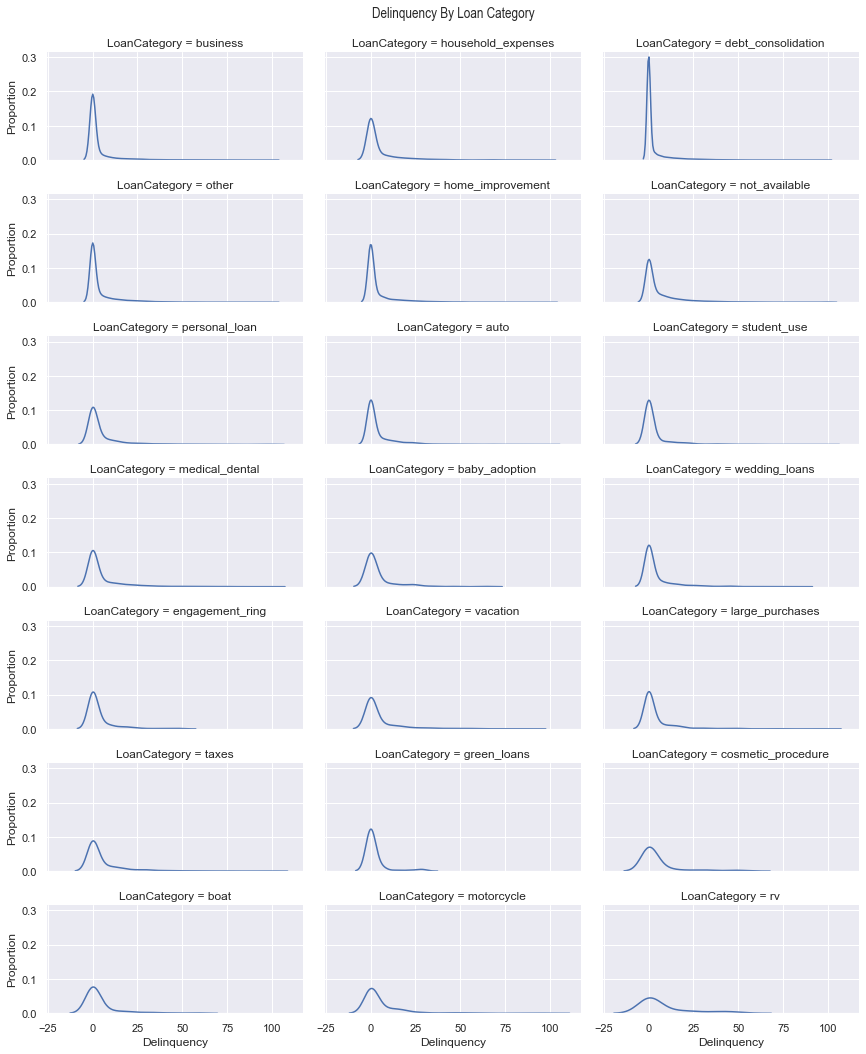

In [67]:
# faceted density estimation for loan categories
g = sb.FacetGrid(loan_df, col='LoanCategory', height=2, aspect=2, col_wrap=3)
g.map(sb.kdeplot, 'DelinquenciesLast7Years')
g.fig.suptitle('Delinquency By Loan Category', x= .515, y=1.045, size= 'large', stretch= 20)
g.fig.subplots_adjust(top= 1)
g.set_xlabels('Delinquency', size=12)
g.set_ylabels('Proportion', size=12);

The above plot show how the loans is distributed by categories. Overall, each category's distribution is skewed to right with mode at point 0. It appears, delinquent loans are more non-delinquent ones across each category. Interesting observation here is that regardless of the loan category, delinquency is distributed similarly with the mode at point 0. The category `Debt consolidation` has the highest spike at point 0, while `Wedding loans` exhibit lowest spike at the same point.

**Examining the Distribution of LoanStatus**

Here I will examine to see how the loans are distributed across the different levels, and their frequencies.

**_What status of the loans occurs most frequently?_**

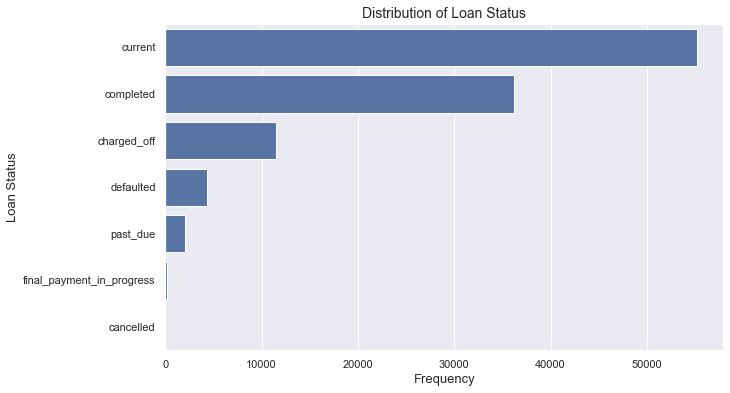

In [68]:
# plot distribution on standard scale
order = loan_df['LoanStatus'].value_counts().index
plt.figure(figsize=(10, 6))
sb.countplot(data=loan_df, y='LoanStatus', color= sb.color_palette()[0], order=order )
plt.xlabel('Frequency', size=13)
plt.ylabel('Loan Status', size=13);
plt.title('Distribution of Loan Status', size=14);

"LoanStatus" has of 7 classes and the distribution of appears skewed. From the chart we can see that most of the loans are in `current` status, followed by `completed` loans. The `cancelled` bar indicate no count while frequency for loans in `final_payment_in_progress` is almost invisible. Earlier, our summary statistics showed some values for these two variable, however low.

So, next, I will plot `LoanStatus` on logarithmic scale for details! 

**Transforming and Scaling `LoanStatus` Variable:**

0.5036380401142992


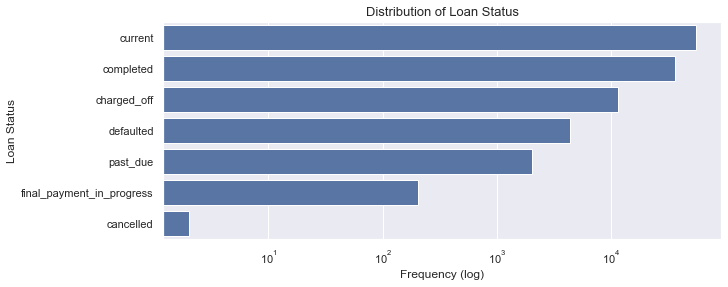

In [69]:
# order the frequency of LoanStatus.
status_counts = loan_df['LoanStatus'].value_counts()

status_order = status_counts.index # order column variable and named `status_order`

status_len = loan_df['LoanStatus'].value_counts().sum() # Returns sum of non-null values 

max_status_count = loan_df['LoanStatus'].value_counts()[0] # compute highest proportion 

max_prop = max_status_count / status_len # Return the maximum proportion and store in variable `max_prop`
print(max_prop)

# Plot the bar chart
plt.figure(figsize=(10, 4))
sb.countplot(data=loan_df, y='LoanStatus', color= sb.color_palette()[0], order= status_order);
plt.xscale('log')
plt.title('Distribution of Loan Status', size=13)
plt.ylabel('Loan Status', size=12)
plt.xlabel('Frequency (log)', size=12);

####  Relative Frequency of `LoanStatus` Distribution:

['0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50']


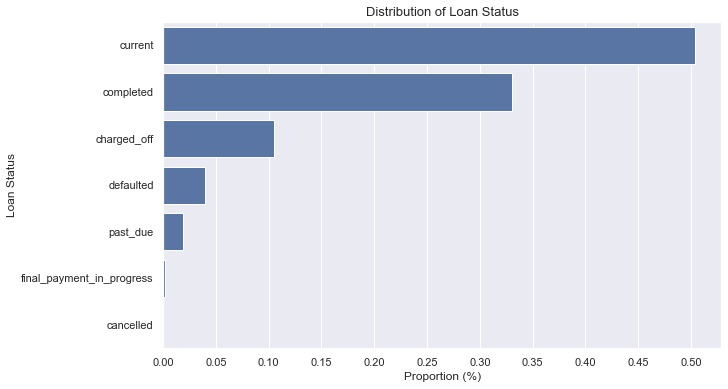

In [70]:
# Create an array of evenly spaced proportioned values and tick locations 
max_prop = max_status_count / status_len
tick_props = np.arange(0, max_prop, 0.05)
tick_props

# create tick_names that will apply to the tick labels. 
# convert tick element into formatted string.
tick_names = ['{:0.2f}'.format(i) for i in tick_props]
print(tick_names)

# plot chart and set plot color
plot_color = sb.color_palette()[0]
plt.figure(figsize=(10, 6))
sb.countplot(data=loan_df, y='LoanStatus', color=plot_color, order=status_order, );

# Change the tick locations and labels
plt.xticks(tick_props * status_len, tick_names)
plt.xlabel('Proportion')
plt.title('Distribution of Loan Status', size=13)
plt.ylabel('Loan Status', size=12)
plt.xlabel('Proportion (%)', size=12);

Distribution across these classes is charaterized by low variability. Most of the loans are current.  The lowest count is observed at the `cancelled` bar. The frequency for the rest of the classes; `chargeoff`, `defaulted`, `past_due`, `final_payment_in_progress`; is conderably low compare to "current" and "completed" bars.
Loans in `defaulted`,  `past_due`, `cancelled`, `final_payment_in_progress` bars,  each are below the 5% mark. The `final_payment_in_progress` and `Cancelled` bars initially appeared to hold no count on standard scale, although, Log transformation reveal counts in those bars however nigligible. About 50% of loans are in current, approximately 34% have been completed. Delinquency tends to be low as defaulted and past due loans are below 5%. Loan cancelllation is rare in the dataset, and currently very few loans finalizing payment.

### Exploring  Potential Predictor Variables (Numeric):

### Predictor Variable: `BorrowersRate`

**Examining the Distribution of Borrowers' Rate:** 

**_How is rate distributed?_**

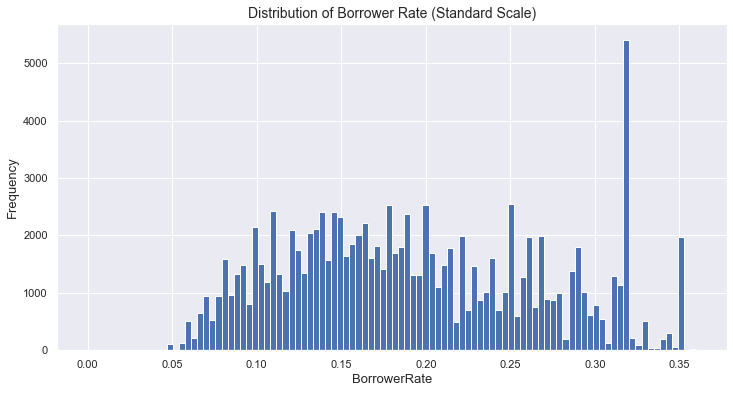

In [71]:
# plotting on standard scale
plt.figure(figsize= [12, 6])
plt.hist(data=loan_df, x= 'BorrowerRate', bins=100)
plt.title('Distribution of Borrower Rate (Standard Scale)', size= 14)
plt.ylabel('Frequency', size= 13)
plt.xlabel('BorrowerRate', size=13);
#plt.xscale('log')

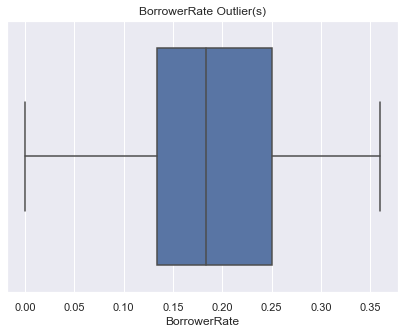

In [72]:
# use boxplot to view distribution and otliers
outlier_checker(loan_df, 'BorrowerRate')

The plot show a distribution that tends to be normal but multiple spikes. Here we can see that loans are issued at various rate ranging from 0.00 percent up to 0.36. Most loans rate fall between 0.13 and 0.25 with a median of 0.18. The boxplot indicate there are no outliers. Rate can be as low as 0.00 or higher up to 0.36. The most occuring rate is 0.3177 representing 3% of the various rates loans were issued.

Next, let transform the borrower rate data and plot again.

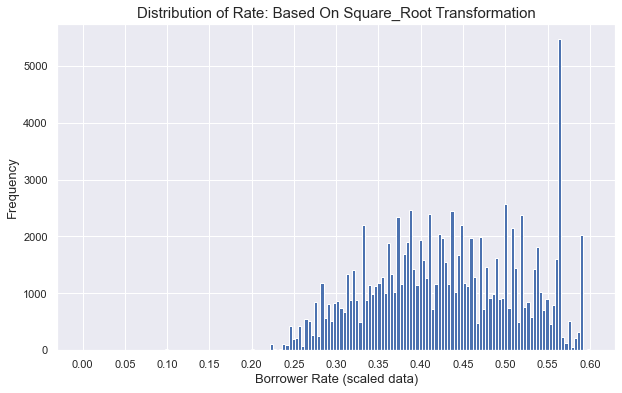

In [73]:
# square root tranformation f BorrowerRate
df_borw = loan_df.copy()
df_borw['BorrowerRate_sq'] = df_borw['BorrowerRate']** (1/2)
bins = np.arange(0, df_borw['BorrowerRate_sq'].max()  + .015/4, .015/4) # resize bins

# plot the transformed data
plt.figure(figsize= [10, 6])

plt.hist(df_borw['BorrowerRate_sq'], bins=bins)
ticks = np.arange(0, df_borw['BorrowerRate_sq'].max()+ .05, .05) # generate tick 
plt.xticks(ticks); # Apply ticks on x-axis
plt.title('Distribution of Rate: Based On Square_Root Transformation', size=15)
plt.xlabel('Borrower Rate (scaled data)', size=13)
plt.ylabel('Frequency', size=13);

The distribution appears multimodal with range stretching from `0.0` to` 0.36`. However, plot on standard scale only show data points up to `~3.5` with mode lying bewteen (`0.3 and 0.35`).

There appears to be clusters of "somewhat" normally distributed data at various rate points characterized by rising and declining peaks. The distribution appears dense beween `0.15` and `0.25` points. Median rate for the loans is approximately 0.18.
The scaled rate data produce a distribution that appears normal. We observe a spike 

near zero values at the lower boundary and between (`~0.36 and 0.5`) at the upper boundary though with very low frequencies and gaps! The min rate is `0.0` and the max is `0.36`, both points are separated by gaps from the bulk of the data. 

### Predictor Variable: `LoanOriginalAmount`

**Examining the Distribution of Loan Amount:** 

**_How is the original loan amount distributed? and what loan amount is issued frequently_**

First, lets view the distribution of `OriginalLoanAmount` on standard scale.

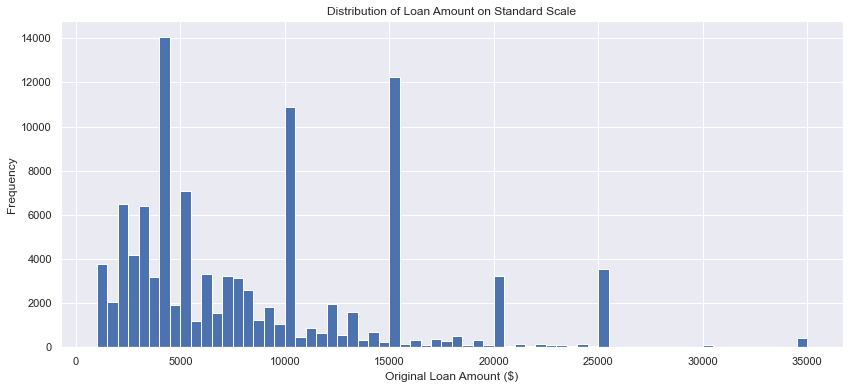

In [74]:
# plot loan amount on standard scale       
bins = np.arange(loan_df['LoanOriginalAmount'].min(), loan_df['LoanOriginalAmount'].max()+500,500)

plt.figure(figsize= (14, 6))
plt.hist(data=loan_df, x='LoanOriginalAmount',bins=bins);
plt.title('Distribution of Loan Amount on Standard Scale')
plt.xlabel('Original Loan Amount ($)')
plt.ylabel('Frequency');

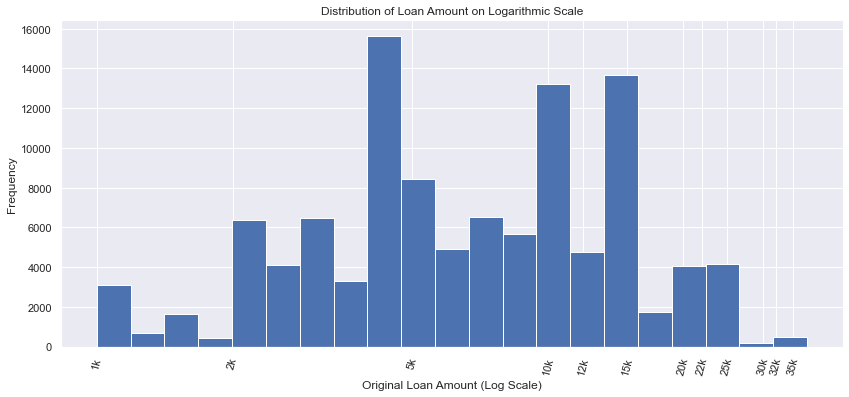

In [75]:
# axis transformation
# generate xticks
ticks= [1000, 2000, 5000, 10000, 12000, 15000, 20000, 22000, 25000, 30000, 32000, 35000 ] 
new_ticks = ['1k', '2k','5k', '10k', '12k', '15k', '20k', '22k', '25k', '30k', '32k', '35k']

# derive ticks range for bin on logarithm base 10
log_bins =  10**np.arange(np.log10(loan_df['LoanOriginalAmount'].min()), 
                           np.log10(loan_df['LoanOriginalAmount'].max()) + (0.15/2), (0.15/2))

# plot histogram
plt.figure(figsize= (14,6))
plt.hist(data=loan_df, x='LoanOriginalAmount', bins=log_bins,);
plt.xscale('log') # plot on log scale
plt.xticks(ticks, new_ticks) # apply ticks to x-axis

plt.xticks(rotation=75)
plt.title('Distribution of Loan Amount on Logarithmic Scale')
plt.xlabel('Original Loan Amount (Log Scale)')
plt.ylabel('Frequency')
plt.show()

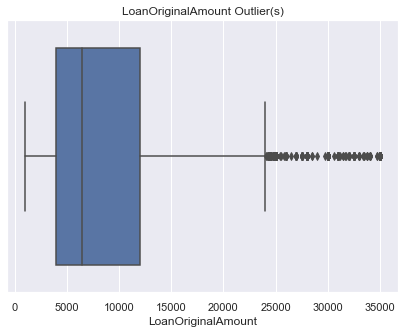

In [76]:
# Outlier detection using boxplots 
outlier_checker(loan_df, 'LoanOriginalAmount');

**Log Transformation of LoanOriginalAmount**

The distribution is skewed to the right with multiple peaks. Loans amount range from 1000 to 35000. The most loan amount issued is 4000, min and max amount is 1000 and 35000 respectively. 
Interestingly, on average, there appears to be more higher loan amount than the lower amount. The amount spike at the thousandth point of the dataset, i;e (4000, 5000, 10000, 20000, 25000).

Plotting "LoansOriginalAmount" on log scale reveals data points where gaps initially existed, especially between the 25000 and 35000 loan amount. After tranformation, the distribution tends to normalize though not symmetrically. 
The boxplot shows we have outliers at the upper bound of the plot. Some 50% of loan amount falls between 4000 and 12000 dollars, with median amount of 6500.

**Remove Outliers and Transform LoanOriginalAmount Using BoxCox Method**

In [77]:
from scipy.stats import zscore

# create column for zscore values of sq_DebtToIncomeRatio 
df_amount = loan_df.copy()
df_amount['zscore_amount'] = zscore(df_amount['LoanOriginalAmount'])

# exclude outliers
amt_outliers = (df_amount[((df_amount['zscore_amount'] < 3) & (df_amount['zscore_amount'] > -3))]) 
amt_outliers.describe()['LoanOriginalAmount'] # outlier summary stats

count    108887.000000
mean       8296.414540
std        5979.186452
min        1000.000000
25%        4000.000000
50%        6500.000000
75%       12000.000000
max       27000.000000
Name: LoanOriginalAmount, dtype: float64

0.15671366949673726 is the best lambda value for transforming LoanOriginalAmount.


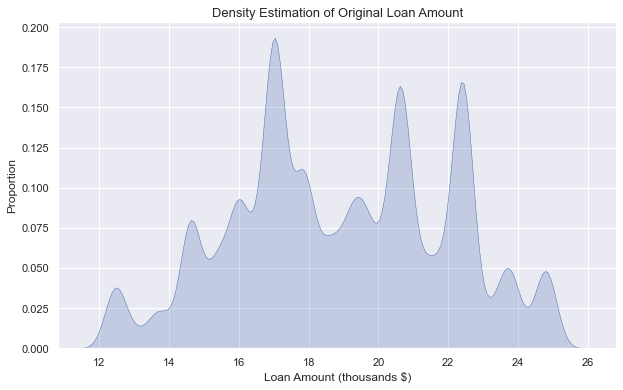

In [78]:
# compute lambda value and transform loan amount column 
trans_amt, lambda_value = stats.boxcox(amt_outliers['LoanOriginalAmount'])
print('{} is the best lambda value for transforming LoanOriginalAmount.'.format(lambda_value))

# plots the transformed loan amount
c_palette = sb.color_palette()[0] # recall color palette used earlier
plt.figure(figsize=([10,6])) 
sb.distplot(trans_amt, hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 0.5}, 
            label = 'Normal Distribution', color = c_palette)
plt.title('Density Estimation of Original Loan Amount', size=13)
plt.ylabel('Proportion', size=12)
plt.xlabel('Loan Amount (thousands $)', size=12);

The distribution tend to normalize but is characterized by multiple peaks, suggesting multiple processes. After outlier(s) removal, the max amount is 27000 while the minimum remains unchanged. The mode is 4000 and median loan amount is remains 6500 and an mean amount of 8255.

### Predictor Variable: `DebtToIncomeRatio`

**Examining the Distribution of DebtToIncomeRatio:** How is Debt-income-ratio distributed?

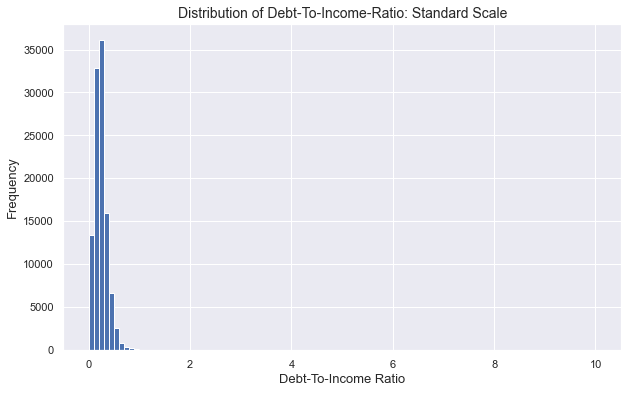

In [79]:
# plot on standard scale
plt.figure(figsize= [10, 6])
plt.hist(loan_df['DebtToIncomeRatio'], bins= 100,);
plt.title('Distribution of Debt-To-Income-Ratio: Standard Scale', size=14)
plt.xlabel('Debt-To-Income Ratio', size=13)
plt.ylabel('Frequency', size=13);

Standard scale shows that the distribution of DebtToIncomeRatio variable is skewed to the right with a slight tail. The distribution of the ratio is  mostly between points 0 and 2 with a minimum value of zero. The plot reveal very limited information about the variable. Next, the variable will be transformed at table level for additional exploration.

#### Square-Root Transformation of  `DebtToIncomeRatio` Variable:

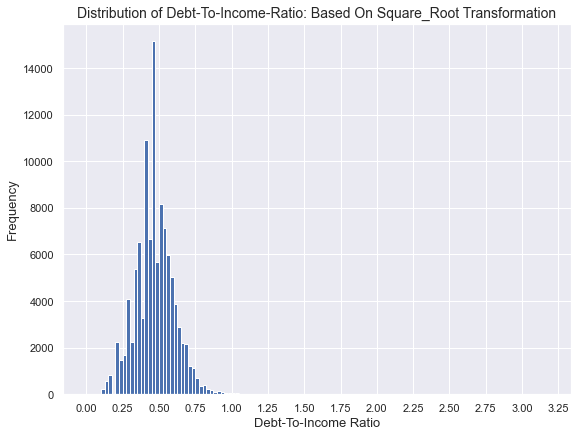

In [80]:
# perform square-root tranformation of DebtToIncomeRatio column and store in new variable `sq_DebtToIncomeRatio`
df_ratio = loan_df.copy()
df_ratio['sq_DebtToIncomeRatio'] = df_ratio['DebtToIncomeRatio']** (1/2)

bins = np.arange(0, df_ratio['sq_DebtToIncomeRatio'].max()  + .025, .025) # resize bins

# plot the transformed data
plt.figure(figsize= [20, 15])

plt.subplot(2,2,1)
plt.hist(df_ratio['sq_DebtToIncomeRatio'], bins=bins)
ticks = np.arange(0, df_ratio['sq_DebtToIncomeRatio'].max()+ .25, .25) # generate tick 
plt.xticks(ticks); # Apply ticks on x-axis
plt.title('Distribution of Debt-To-Income-Ratio: Based On Square_Root Transformation', size=14)
plt.xlabel('Debt-To-Income Ratio', size=13)
plt.ylabel('Frequency', size=13);

The square-root transformation scales the plot and reveal a distribution that appears normal with mode between 0.25 and 0.50. There is an outlying point between 3.00 and 3.25. This point creates a gap in the distribution, between point 1.00 and approximately 3.25. Lets explore the gap using boxplot.

#### Outlier(s) Check Using Boxplot

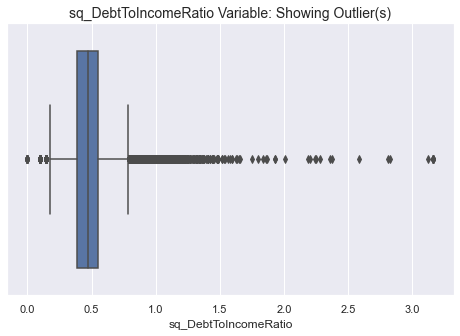

In [81]:
# plotting boxplot to show outlier(s)
plt.figure(figsize= (8,5))
sb.boxplot(x=df_ratio['sq_DebtToIncomeRatio']);
plt.title('sq_DebtToIncomeRatio Variable: Showing Outlier(s)', size=14); 

In [82]:
# summary statitics of transformed ratio
df_ratio['sq_DebtToIncomeRatio'].describe()

count    109537.000000
mean          0.473359
std           0.139705
min           0.000000
25%           0.387298
50%           0.469042
75%           0.547723
max           3.163858
Name: sq_DebtToIncomeRatio, dtype: float64

Boxplot reveals extensive outlier range at the upper bound and minimal count at the lower end. The median debt-to-income ratio is approximately 4.8. Approximately, 50% of the debt-to-income ratio is below or over 4.8. Next, I will capture and visual the outliers.

#### Isolate And Visualize Outlier(s): using scipy zscore function

In [83]:
# create column for zscore values of sq_DebtToIncomeRatio 
df_ratio['zscore_ratio'] = zscore(df_ratio['sq_DebtToIncomeRatio'])

# select outliers
ratio_outliers = (df_ratio[~((df_ratio['zscore_ratio'] < 3) & (df_ratio['zscore_ratio'] > -3))]) 
ratio_outliers.describe()['sq_DebtToIncomeRatio'] # outlier summary stats

count    751.000000
mean       1.065992
std        0.371555
min        0.000000
25%        0.927362
50%        0.984886
75%        1.097723
max        3.163858
Name: sq_DebtToIncomeRatio, dtype: float64

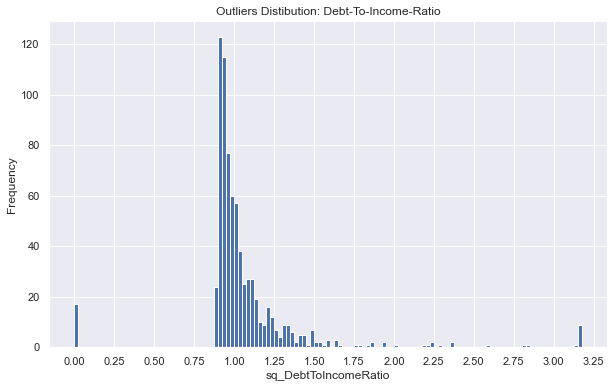

In [84]:
bins = np.arange(0, ratio_outliers['sq_DebtToIncomeRatio'].max()  + .025, .025) # resize bins

# plot debt-to-income-ratio outliers
plt.figure(figsize= [10, 6])
plt.hist(ratio_outliers['sq_DebtToIncomeRatio'], bins=bins)
ticks = np.arange(0, ratio_outliers['sq_DebtToIncomeRatio'].max()+ .25, .25) # generate tick 
plt.xlabel('sq_DebtToIncomeRatio')
plt.ylabel('Frequency')
plt.title('Outliers Distibution: Debt-To-Income-Ratio')
plt.xticks(ticks);

The outlier range from 0.98 to 3.16 at the upper bound and at 0.0 at the lower bound

#### Handle Outliers and Plot Distribution of sq_DebtToIncomeRatio variable:

In [85]:
# remove outliers 
ratio_no_outlier = df_ratio[(df_ratio['zscore_ratio'] < 3) & (df_ratio['zscore_ratio'] > -3)].reset_index(drop=True)
ratio_no_outlier.shape # display dataset with no outier for sq_DebtToIncomeRatio variable

(108786, 16)

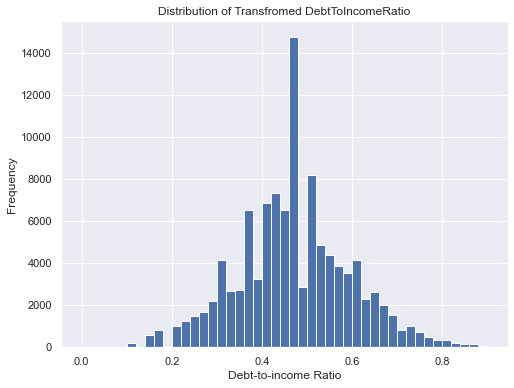

In [86]:
# plot transformed DebtToIncomeRatio without outliers
bins = np.arange(0, ratio_no_outlier['sq_DebtToIncomeRatio'].max()  + .02, .02) # resize bins

plt.figure(figsize= [8, 6])
plt.hist(ratio_no_outlier['sq_DebtToIncomeRatio'], bins=bins)
ticks = np.arange(0, ratio_no_outlier['DebtToIncomeRatio'].max()+ .25, .25) # generate tick 
plt.title('Distribution of Transfromed DebtToIncomeRatio')
plt.ylabel('Frequency')
plt.xlabel('Debt-to-income Ratio');

In [87]:
# summary statistics for sq_DebtToIncomeRatio without outliers
ratio_no_outlier['sq_DebtToIncomeRatio'].describe()

count    108786.000000
mean          0.469268
std           0.127511
min           0.100000
25%           0.387298
50%           0.469042
75%           0.547723
max           0.888819
Name: sq_DebtToIncomeRatio, dtype: float64

In [88]:
# mode of sq_DebtToIncomeRatio
ratio_no_outlier['sq_DebtToIncomeRatio'].mode()

0    0.469042
dtype: float64

The minimun ratio of debt to income is 0.10 while maximum is 0.88. Median ratio is 0.469, mean ratio is 0.469, and mode 0.469. This suggest the debt-to-income ratio variable distribution has normalized.

### Univariate Analysis of Categorial Variables:

#### Predictor Variable:  `IncomeRange`

**_How are the loans distributed across the income range and what income range got issued the most loans?_** 

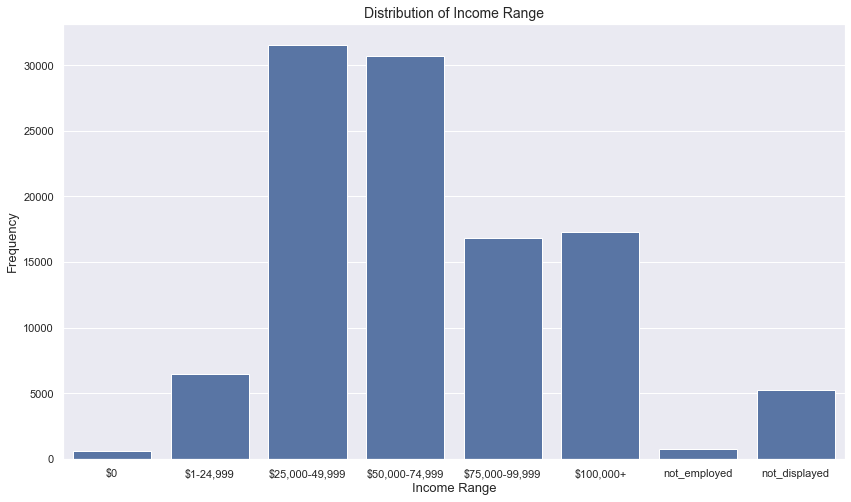

In [89]:
# plot IncomeRange on a standard scale and sort the category by order of frequency
# and simplify color scheme
income = loan_df.copy()
income_or =['$0', '$1-24,999', '$25,000-49,999', '$50,000-74,999', 
 '$75,000-99,999', '$100,000+', 'not_employed', 'not_displayed']


plt.figure(figsize=[14, 8])
sb.countplot(x= income['IncomeRange'], color= sb.color_palette()[0], order= income_or)
plt.title('Distribution of Income Range', size= 14)
plt.xlabel('Income Range', size= 13)
plt.ylabel('Frequency', size= 13)
plt.xticks(rotation=0);

The income range variable hold 8 classes for income. Initial look indicates the range `$25,000-49,999` appears to host most of the loans but closedly followed by the `$50,000-74,999` class. I will explore further to ascertain since we have a class that have loans where income is not displayed before we conclude.

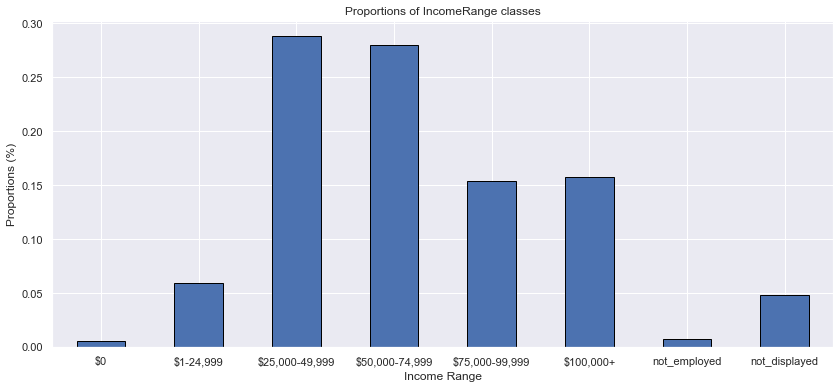

In [90]:
# plot proportions of IncomeRange classes
# order `IncomeRange` classes
order_in = income_or # assign income range order to new object
map_order = {Incomebracket: v for v, Incomebracket in enumerate(order_in)}

# plot for distribution of income range
loan_df['IncomeRange'].value_counts(normalize=True).loc[map_order].plot.bar(edgecolor='black', figsize=[14,6])
plt.xticks(rotation=0)
plt.title('Proportions of IncomeRange classes')
plt.xlabel('Income Range')
plt.ylabel('Proportions (%)');

The distribution appears to be in pairs; every other bar appears to have similar frequency as the next, i:e, `$25,000-49,000` and `$50,000-74,999`, `$100,000+`and `$75,000-99,999`, `$0 `and `not_employed`.
The distribution is high for income ranges `$25000-49999` and `$50000-74999`, with the mode at the former. `$0` and `not_employed` classes indicate very low count in comparison. These two classes so far seem redundant, as not_employed equates $0 and vice varsa in this context. 

The `not_displayed` class seem interesting; `5%` of loans do not have income information  available. **_So, the question is; do these loans have income associated with them? And how does this class affect the distributon of income range?
Also, could it be possible that of the "not_employed" are due to Income range info not being displayed?_**. Lets explore!

In [91]:
# explore the `not_displayed` and `Not employed` variables
emp_disp = income.loc[(income['IncomeRange'] == 'not_displayed') | 
                      (income['IncomeRange'] == 'not_employed')].reset_index(drop=True)
emp_disp[['YearlyIncome','IncomeRange','EmploymentStatus','LoanOriginalAmount',]].sample(10)

YearlyIncome    IncomeRange EmploymentStatus  LoanOriginalAmount
705       0.000000   not_employed     not_employed                4000
2631  42999.999996  not_displayed    not_available                2000
4901  21000.000000  not_displayed    not_available                3000
792   19470.000000  not_displayed        full_time                1000
1892  95000.000004  not_displayed    not_available               15000
2835  48000.000000  not_displayed    not_available               10000
51        0.000000   not_employed     not_employed                2000
5015  49196.000004  not_displayed    not_available                8000
2290  50000.000004  not_displayed    not_available                3000
824   60000.000000  not_displayed    not_available                3000

The not_displayed class do have income associated with the loans. 

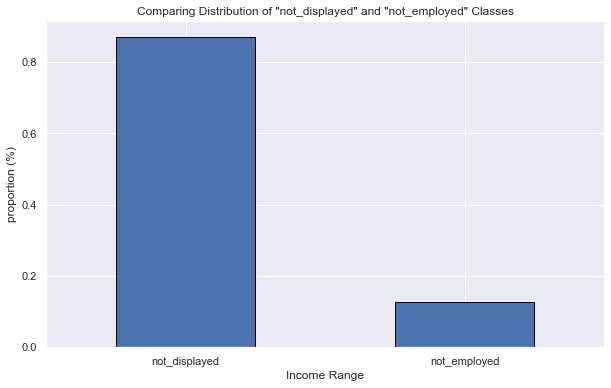

In [92]:
# plot bar chart showing dist of "not_displayed" and "not_employed" classes of `IncomeRange` ; 
emp_disp['IncomeRange'].value_counts(normalize=True).plot.bar(edgecolor='black', figsize=[10,6], )
plt.xticks(rotation=0)
plt.title('Comparing Distribution of "not_displayed" and "not_employed" Classes')
plt.ylabel('proportion (%)')
plt.xlabel('Income Range');

From the above table, we can see the "not_displayed" class do have income in the "YearlyIncome" column! Based on this information, the income range of the loans will be imputed. Also observed is that the "not_employed" flag in the income range variable has 0 as value in the income variable, "YearlyIncome"

In [93]:
print('{}% of the dataset do not have income range info displayed!'.format\
      ((loan_df[loan_df['IncomeRange']=='not_displayed'].shape[0] / loan_df.shape[0]) * 100))

print('{}% of the dataset "not employed"!'.format\
      ((loan_df[loan_df['IncomeRange']=='not_employed'].shape[0] / loan_df.shape[0]) * 100))

4.812072632991591% of the dataset do not have income range info displayed!
0.7084364187443513% of the dataset "not employed"!


So, about 5% of the loans do not have thier income indicated and less than 1% are classed as "not_employed".

**Assign IncomeRange Classes based on Yearly Income value to fix "not displayed" issue of income range;**
**Step 1: Create new Variable `IncomeBracket`**

In [94]:
loan_fx = loan_df.copy()
# truncate income variable to 2 places of decimal
#loan_fx['YearlyIncome']  = loan_fx['YearlyIncome'].mul(10**n) / (10**n)

# impute income category based on yearly income and store in new variable `IncomeBracket` 
loan_fx.loc[(loan_fx['YearlyIncome'] < 1), 'IncomeBracket'] = '$0'
loan_fx.loc[(loan_fx['YearlyIncome'] > 1) & (loan_fx['YearlyIncome'] <= 24999.999999), 'IncomeBracket'] = '$1-24,999'
loan_fx.loc[(loan_fx['YearlyIncome'] >= 25000.000000) & (loan_fx['YearlyIncome'] <= 49999.999999), 'IncomeBracket'] = '$25,000-49,999'
loan_fx.loc[(loan_fx['YearlyIncome'] >= 50000.000000) & (loan_fx['YearlyIncome'] <= 74999.999999), 'IncomeBracket'] = '$50,000-74,999'
loan_fx.loc[(loan_fx['YearlyIncome'] >= 75000.000000) & (loan_fx['YearlyIncome'] <= 99999.999999), 'IncomeBracket'] = '$75,000-99,999'
loan_fx.loc[(loan_fx['YearlyIncome'] > 99999.999999), 'IncomeBracket'] = '$100,000+'

# drop previous income range variable `IncomeRange`
#income.drop('IncomeRange',axis=1, inplace=True)

# order the income bracket
# order the income bracket
range_vars= {'IncomeBracket': ['$0','$1-24,999','$25,000-49,999','$50,000-74,999','$75,000-99,999','$100,000+',]}

#  loop to order the categories
for i in range_vars:
    var = pd.api.types.CategoricalDtype(ordered = True, categories = range_vars[i])
    loan_fx[i] = loan_fx[i].astype(var)

    
loan_fx['IncomeBracket'].value_counts(sort=False) # display new order

$0                 1377
$1-24,999          8513
$25,000-49,999    32525
$50,000-74,999    31888
$75,000-99,999    19044
$100,000+         16190
Name: IncomeBracket, dtype: int64

Now, the records with the `not_displayed` income range values have been re-assigned, in the process , eliminates `not_displayed` class. Records flagged `not_employed` and `$0` have been regrouped into a new class named `no_income` since they both have 0 for income value. The renaming to no_income is done to avoid confusion with the "not_employed" class of the "EmploymentStatus" variable. The resultant income range variable, `IncomeBracket` has 6 ordered classes!

**View the new income range, `IncomeBracket` on Standard Scale: A side by Side Comparison**

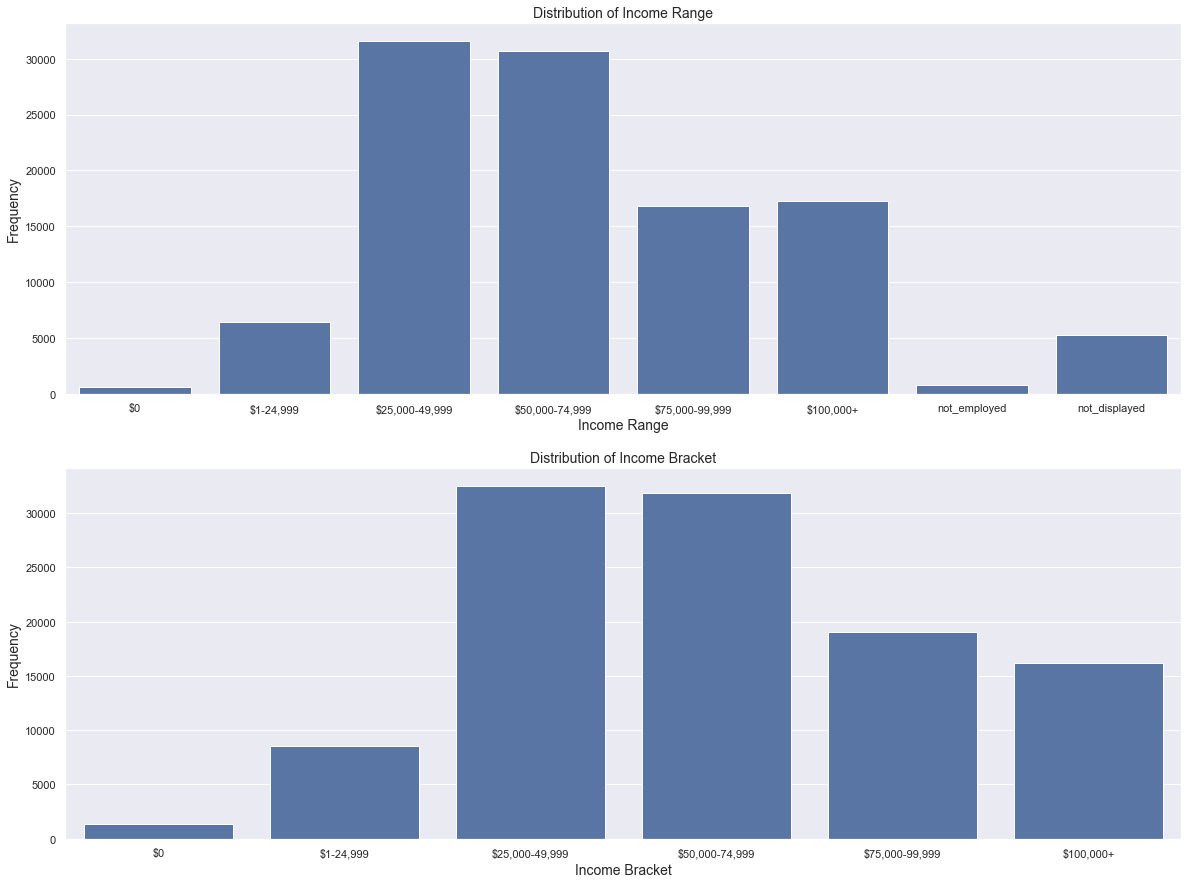

In [95]:
# plot IncomeRange on a standard scale
plt.figure(figsize=[20,15])
plt.subplot(2,1,1)
sb.countplot(x= loan_fx['IncomeRange'], color= sb.color_palette()[0], order= income_or)
plt.title('Distribution of Income Range', size= 14)
plt.xlabel('Income Range', size= 14)
plt.ylabel('Frequency', size= 14)
plt.xticks(rotation=0);

# plot IncomeBracket on a standard scale
order_b = loan_fx['IncomeBracket'].value_counts(sort=False).index

plt.subplot(2,1,2)
sb.countplot(x= loan_fx['IncomeBracket'], color= sb.color_palette()[0], order= order_b)
plt.title('Distribution of Income Bracket', size= 14)
plt.xlabel('Income Bracket', size= 14)
plt.ylabel('Frequency', size= 14)
plt.xticks(rotation=0);

#income.drop('IncomeRange',axis=1, inplace=True) # drop IncomeRange and keep IncomeBracket

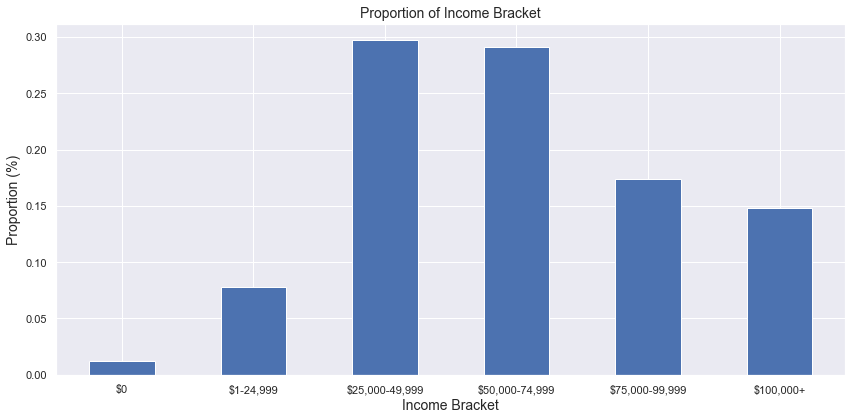

In [96]:
# view relative proportion of income range
plt.figure(figsize= [12, 6])
loan_fx['IncomeBracket'].value_counts(normalize=True, sort=False).plot(kind='bar')

plt.title('Proportion of Income Bracket', size= 14)
plt.xlabel('IncomeBracket', size= 14)
plt.ylabel('Proportion (%)', size= 14)
plt.xlabel('Income Bracket', size= 14)
plt.xticks(rotation=0)
plt.tight_layout();

The wrangled and recomputed income range produce 6 classes and indicate marginal shift distribution. The variability of the distribution is high. Loans are most frequent in the `$25000-49999` and the `$50000-74999`groups with the former assumming the mode of the distribution. The lowest frequency is observed in the `$0` class which is expected. 

### Predictor Variable: `EmploymentStatus`

**_Examine the Distribution of `EmploymentStatus`_** Here we want find out what employment status do most loans occur?

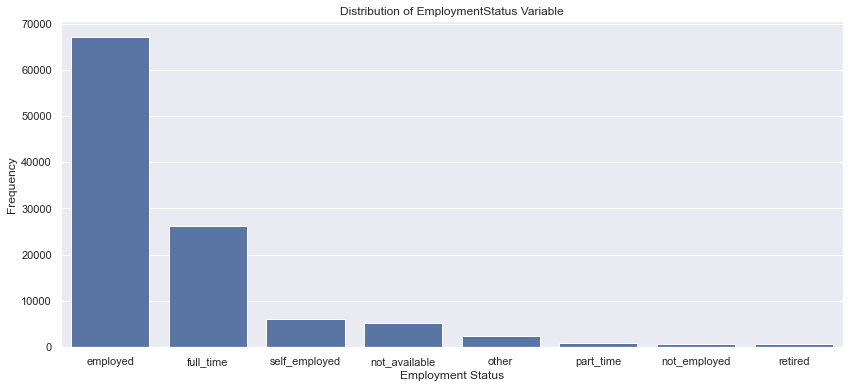

In [97]:
# distribution of EmploymentStatus on standard scale
employ = loan_fx.copy() # make copy of dataset
# order employmentstatus
order = employ['EmploymentStatus'].value_counts().index
color= sb.color_palette()[0]

plt.figure(figsize=(14, 6))
sb.countplot(data=employ, x='EmploymentStatus', color= sb.color_palette()[0], order=order);
plt.title('Distribution of EmploymentStatus Variable')
plt.ylabel('Frequency')
plt.xlabel('Employment Status');

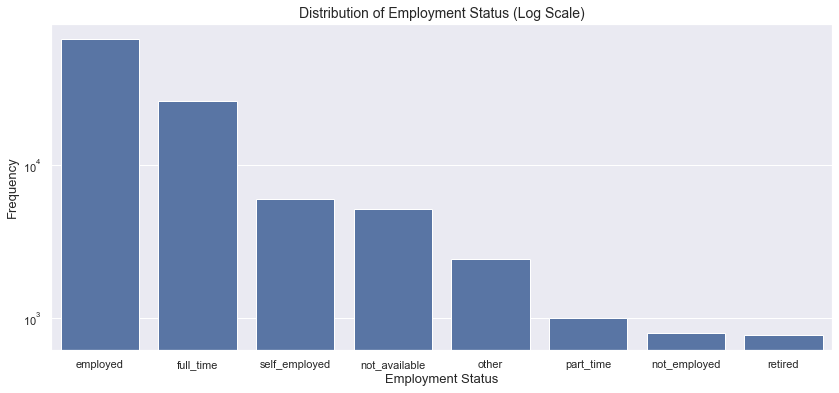

In [98]:
# plot employment status on log scale
plt.figure(figsize=(14, 6))
order = employ['EmploymentStatus'].value_counts().index
sb.countplot(data= employ, x= 'EmploymentStatus', log=True, order=order, color= sb.color_palette()[0])
plt.title('Distribution of Employment Status (Log Scale)', size= 14)
plt.xlabel('Employment Status', size= 13)
plt.ylabel('Frequency', size= 13);

**Relative Frequency of `EmploymentStatus` Distribution**

0.6133270036608635
['0.00', '0.05', '0.10', '0.15', '0.20', '0.25', '0.30', '0.35', '0.40', '0.45', '0.50', '0.55', '0.60']


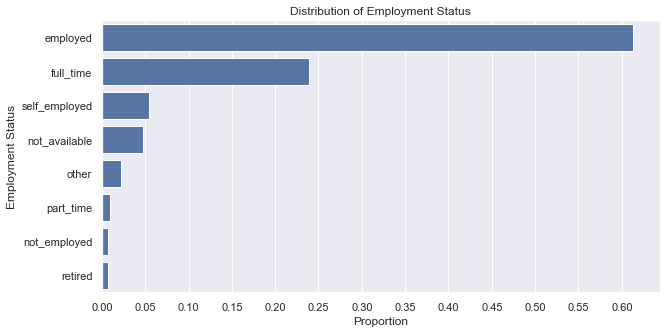

In [99]:
order = employ['EmploymentStatus'].value_counts().index 

# Returns the sum of all not-null values in `EmploymentStatus` column
status_len = employ['EmploymentStatus'].value_counts().sum()

# compute the highest proportion in the `EmploymentStatus` column
max_status_count = employ['EmploymentStatus'].value_counts()[0]

# compute maximum proportion and store in variable `max_prop`
max_prop = max_status_count / status_len
print(max_prop)

# Create evenly spaced proportioned values and tick locations 
tick_props = np.arange(0, max_prop, 0.05)
tick_props

# create tick_names and convert tick element into formatted string.
tick_names = ['{:0.2f}'.format(i) for i in tick_props]
print(tick_names)

# plot chart and set plot color
plot_color = sb.color_palette()[0]
plt.figure(figsize=(10, 5))
sb.countplot(data=employ, y='EmploymentStatus', color=plot_color, order= order)
plt.xticks(tick_props * status_len, tick_names) # Change the tick locations
plt.ylabel('Employment Status')
plt.xlabel('Proportion') # Change the tick labels
plt.title('Distribution of Employment Status');

Right out the door we can see the distribution is low in variability with over 60% of the loans hosted in the "employed" class!

The employment status variable has 8 classes. The distribution across the classes is disproportinate, indicating low variability. The highest frequncy is observe in the `employed` class, representing the mode, and the lowest frequency is at the `retired` bar. However, the classes are interesting grouped; we have a class that groups the employed without specification. Then, we have classes that group employment status with specificity such as full-time, partime, self-employed, retired etc.
The "employed" class accounts for 60% of the loans.
There are some 5000 observations, about 5%, where employment status is not provided, contained in the `not_available` class. This is worth exploring along with other aspects. 

**Investigating the `not_available` class of EmploymentStatus:** Do the "not_available" class have occupation associated with their  records?

In [100]:
emp = employ.copy() # make a copy of the dataset
emp_na = emp[emp['EmploymentStatus'] == 'not_available'][['IncomeBracket','YearlyIncome','EmploymentStatus','Occupation']]
emp_na.sample(10) # display table

IncomeBracket   YearlyIncome EmploymentStatus     Occupation
33423   $25,000-49,999   45000.000000    not_available          other
34031   $50,000-74,999   60099.999996    not_available  civil_service
75486   $25,000-49,999   39000.000000    not_available         doctor
104270  $25,000-49,999   48000.000000    not_available         retail
62198        $100,000+  120000.000000    not_available        analyst
62998   $25,000-49,999   44000.000004    not_available          other
79642   $25,000-49,999   39999.999996    not_available   professional
15010   $75,000-99,999   80000.000004    not_available          other
58932   $25,000-49,999   42000.000000    not_available          sales
63106        $100,000+  101499.999996    not_available   professional

In [101]:
# proportion of 'not_available' distribution
un_tab = pd.crosstab(emp_na['Occupation'], emp_na['EmploymentStatus'], normalize=True)\
.sort_values(by='not_available', ascending=False)
un_tab

EmploymentStatus     not_available
Occupation                        
other                     0.282360
professional              0.113526
sales                     0.076460
clerical                  0.055890
computer_programmer       0.050262
admin_assistant           0.033767
executive                 0.030856
analyst                   0.029886
teacher                   0.026975
retail                    0.024258
accountant                0.021929
student                   0.019988
military                  0.019212
skilled_worker            0.018436
engineer                  0.018242
construction              0.017077
laborer                   0.015719
food_service              0.014361
nurse                     0.011644
realtor                   0.011644
truck_driver              0.010479
police_correction         0.009509
tradesman                 0.009121
civil_service             0.008733
medical                   0.007957
attorney                  0.006016
homemaker                 0.005240
postal_worker             0.004657
nurse_aide                0.004657
professor                 0.004269
fireman                   0.003881
social_worker             0.003881
scientist                 0.003493
waiter_waitress           0.003105
doctor                    0.003105
architect                 0.002717
clergy                    0.002135
car_dealer                0.002135
landscaping               0.001747
teachers_aide             0.001747
pilot                     0.001747
bus_driver                0.001552
flight_attendant          0.001164
chemist                   0.000970
religious                 0.000776
principal                 0.000776
pharmacist                0.000776
biologist                 0.000582
psychologist              0.000582

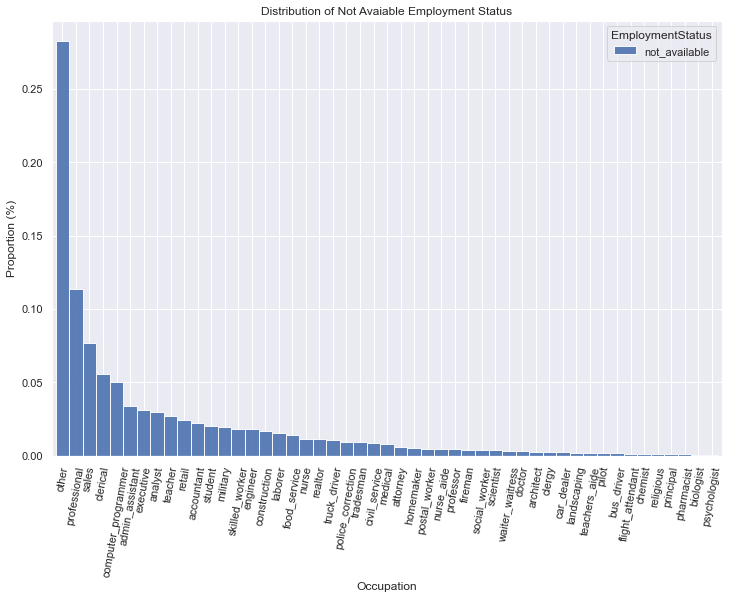

In [102]:
# proportion of 'not_available' distribution
un_tab = pd.crosstab(emp_na['Occupation'], emp_na['EmploymentStatus'], normalize=True)\
.sort_values(by='not_available', ascending=False)

# plot distribution of not_available
un_tab.plot(kind="bar", figsize=(12,8), width= 1, log=False, alpha=.9, )
plt.title('Distribution of Not Avaiable Employment Status')
plt.ylabel('Proportion (%)')
plt.xticks(rotation=80);

The "not_available" employment status is widely distributed across the different occupation. The "other" occupation category is the mode of the distribution, accounting for more than 25% of the unavailable status. The mininum counts lie in the "biologist" and the "psycologist" classes 0.0006% each. High variabilty is observed. Though these loans records do have income and occupation information, reclassing them will introduce major bias as there is no yardstick in the dataset that can be used to classify them into the various employment statuses other than dumping them into the "employed" class which will significantly skew the distribution further. 
So loans flag "not_available" do actually have occupation and income associated with the record, but for some reasons are the employment status data are not in the dataset supplied. I will leave it as is. 

### Predictor Variable:  `Occupation`

**_What occupation is predorminant?_**

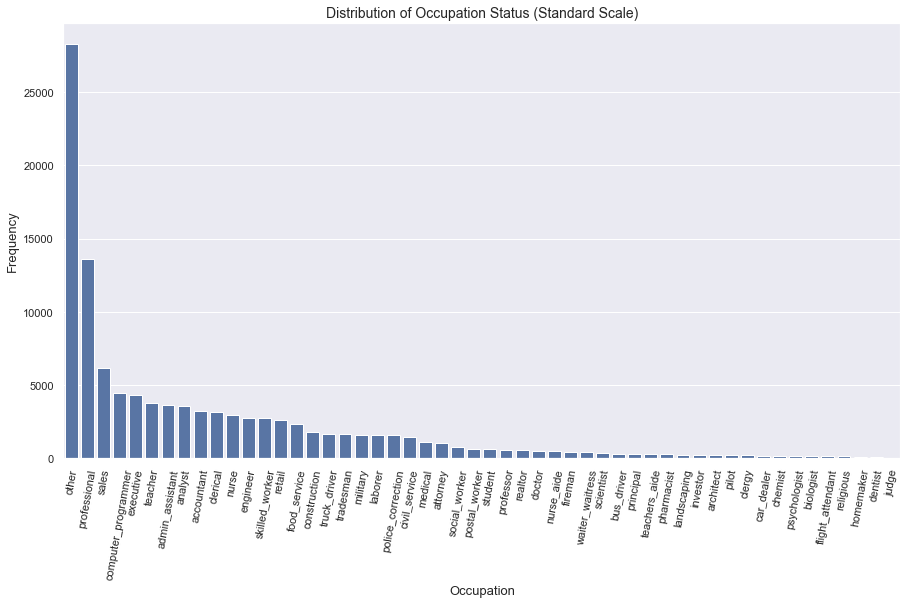

In [103]:
occp_df = employ.copy()
# plot distribution of occupation on standard scale
plt.figure(figsize=(15, 8))
order = occp_df['Occupation'].value_counts().index
sb.countplot(data= occp_df, x= 'Occupation', log=False, order=order, color= sb.color_palette()[0])
plt.title('Distribution of Occupation Status (Standard Scale)', size= 14)
plt.xlabel('Occupation', size= 13)
plt.ylabel('Frequency', size= 13);
plt.xticks(rotation=80);

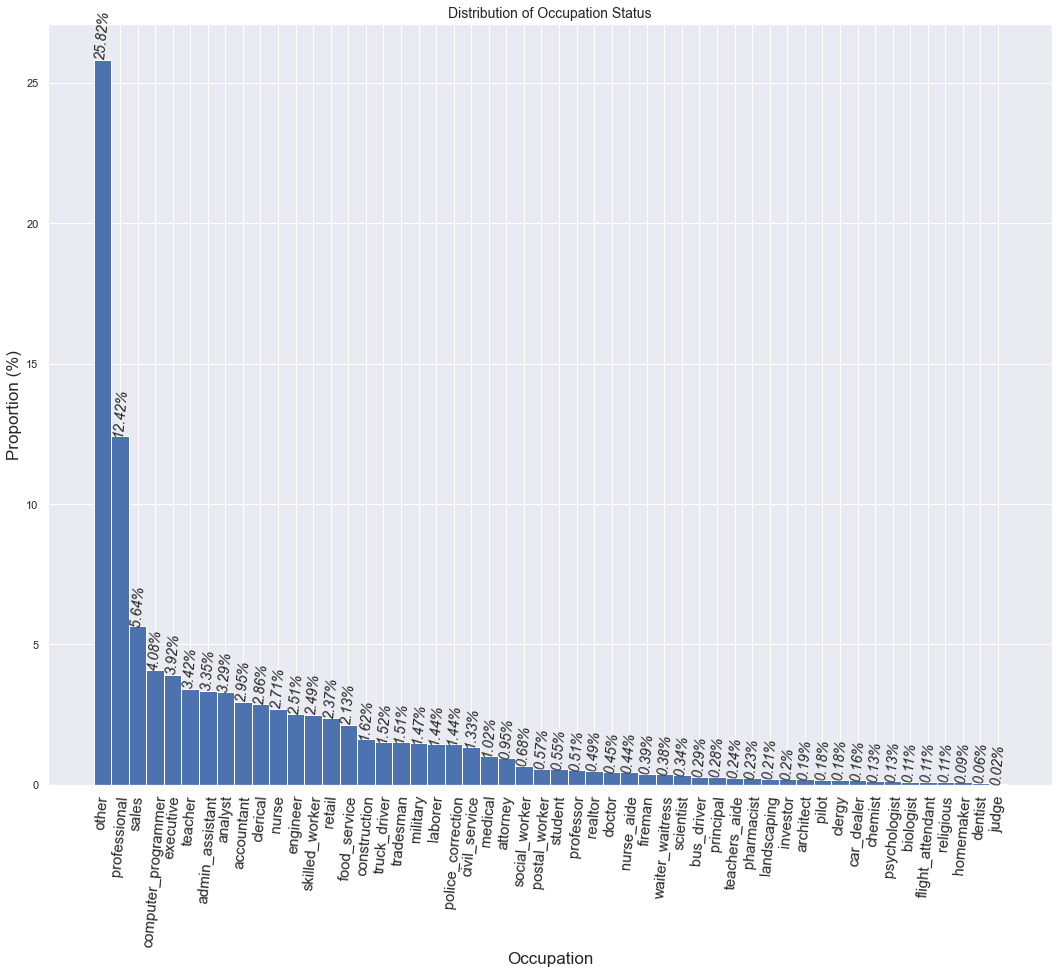

In [104]:
plt.rcParams['figure.figsize'] = [18, 14]

# generate unique index of occupation
x = occp_df['Occupation'].value_counts().index
# compute distribution by percentage
y = ((occp_df['Occupation'].value_counts(sort=True)) / (occp_df['Occupation'].value_counts(sort=True).sum()) *100).round(2)

width = 1.0
fig, ax = plt.subplots()
g = ax.bar(x, y, width, align='center')

# logic to generate values on bar
for i in g:
   height = i.get_height()
   ax.text(x=i.get_x() + i.get_width() / 2, y=height+.10,
      s="{}%".format(height),
      ha='center', rotation=85, weight= 'light', style='italic', size='large', stretch='extra-expanded')
plt.xticks(rotation=85, size= 15)
plt.xlabel('Occupation', size=17)
plt.ylabel('Proportion (%)', size=17)
plt.title('Distribution of Occupation Status', size=14)
plt.show()

The occupation variable has 52 classes. The distribution is characterized by high variability. The mode of distribution lies at the "other" class which accounts for 25.82% of the loans. The minimum frequency is in the "judge" class which sees 0.02% of the loans. the About 44% percent of loans are distributed in three classes; "other", "professional", and "sales", while the remaining is spread across the 49 classes with each holding less than 5%. Occupation variable is not of major priority for this analysis thus will not analyze further.

### Discuss the distribution(s) of your variable(s) of interest. Were there any unusual points? Did you need to perform any transformations?


The distribution of the targets, `DelinquenciesLast7Years` and `CurrentDelinquencies` are skewed to right with the mode at point 0. Zero represent no delinquencies in the dataset. There appears to be less delinquent loans than there is delinquent ones. Interesting observation here is that regardless of the loan type, delinquency is distributed similarly across the loans classes with the mode at point 0. 

Initial plot on standard scale revealed a right skewed distribution with short tail for both delinquency variables. When scaled  using log transformation, the plot revealed hidden points, however, the distribution did not normalize. Box-Cox transformation was implemented and the resultant distribution tend to normalize however, multiple peaks revealed with interesting characteristics. In the `CurrentDelinquencies` variable plot, a symmetrical distribution is observed between points -0.2 and 0.2 with center at 0, and then followed by gap and subsequent peak. The transformed `DelinquenciesLast7Years` variable exhibited similar behavior however with no gap on the right as was observed in the `CurrentDelinquencies` plot.

### Of the features you investigated, were there any unusual distributions? Did you perform any operations on the data to tidy, adjust, or change the form of the data? If so, why did you do this?


The interesting observation is that most of the numeric variables, `DelinquenciesLast7Years`, `CurrentDelinquencies`, `DebtToIncomeRatio`, are heavily skewed to the right, except `BorrowerRate,` though skewed to the right, it exhibit comb-like characteristic and appear to have clusters. The variables indicate varied degree of outliers especially on the upper bound. However, these outliers remain at this stage as there appears to be clusters in the distributions possibly pointing to multiple processes in the dataset.
The multiple processes effect was quite evident in the distrbution lot of the delinquencies variables; `DelinquenciesLast7Years` and `CurrentDelinquencies`. Though, standard plot showed a short tail skewness to the right and a single peak at point 0, BoxCox transformation revealed multiple peaks with an interesting observation for the "CurrentDelinquencies" variable, exhibiting an independently normally distributed frequencies for data at -0.2 and 0.2 ranges with center at point 0!

For the categorical variables; `LoanStatus, IncomeRange,and EmploymentStatus` and `Occupation`, showed high variability with some level of skewness. 

Adjustment had to made for some of the variables: 
For "LoanStatus", the past_due had delinquency bucket which had to be remove as the sublevel was irrelevant to this investigation. Similar step was applied to the "Occupation" to collapse variations of student loans into one class and named "student".

"YearlyIncome" variable was engineered from the "StatedMonthlyIncome" values, to hold annual income. These values was then used to re-assigned loans the appropriate Income range where "not_displayed was the status of the "IncomeRange" variable.
The re-assigning resulted in marginal shift in the overall distribution.



<a id='bivariate'></a>

## Bivariate Exploration



### Numeric Variables:

#### Pairwise correaltion for numeric variables

In [105]:
# select relevant variables and store in dataframe
eda_df = employ.copy() # make a copy
bi_exp = eda_df[['CurrentDelinquencies', 'DelinquenciesLast7Years','BorrowerRate','DebtToIncomeRatio', 
                 'LoanOriginalAmount', 'YearlyIncome', 'LoanStatus', 'EmploymentStatus', 'IncomeBracket',
                 'LoanCategory','Occupation']].reset_index(drop=True)
bi_exp.shape # display shape

(109537, 11)

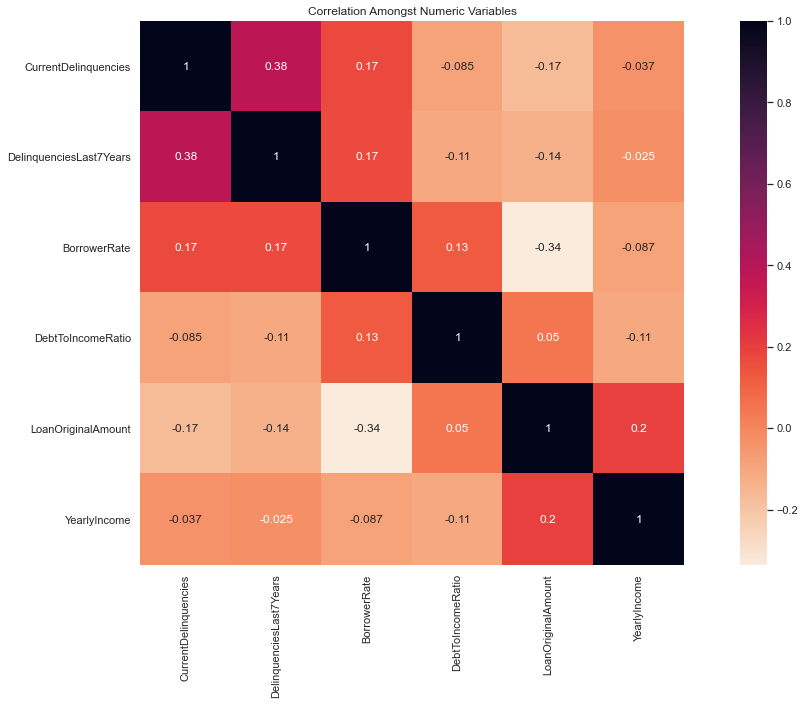

In [106]:
# plot heatmap of numeric variables
f, ax = plt.subplots(figsize=(20, 10))
corr = bi_exp.corr('pearson')
sb.heatmap(corr, mask=np.zeros_like(corr, dtype=bool), 
           cmap='rocket_r', square=True, ax=ax,annot=True)
plt.title('Correlation Amongst Numeric Variables');

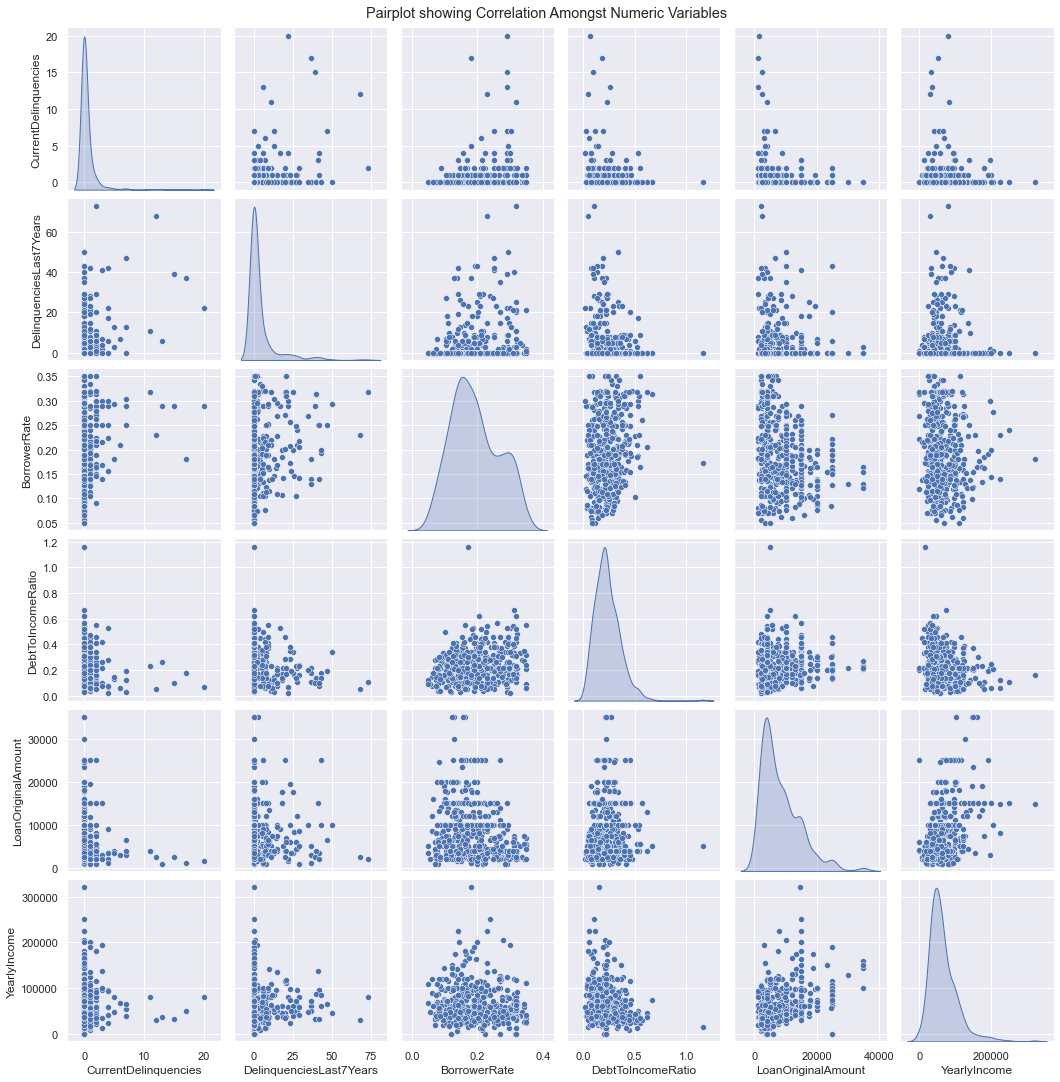

In [107]:
# plot density estimates of 500 sample of numeric variables
bi_samp = bi_exp.sample(n=500, replace = False)
g = sb.pairplot(bi_samp,diag_kind='kde')
g.fig.suptitle ('Pairplot showing Correlation Amongst Numeric Variables', 
                x= .515, y=1.005, size= 'large',);

As YearlyIncome increases as delinquencies decreases

As DebtToIncomeRatio increases as delinquencies decreases

As LoanOriginalAmount increases as delinquencies decreases

As BorrowerRate increases as delinquencies increases

As expected delinquency variables correlated positively

As LoanOriginalAmount increases as YearlyIncome increases

As LoanOriginalAmount dencreases as BorrowerRate increases

The numeric predictors exhibited mostly negative correlation against the target except for rate varaible, BorrowerRate, which associated positively with the target.

we can observe colinearity among the the numeric variables. Negative relationships is highly prevalent and the strength of the relationtionships appear weak as the heatmap indicates.
Our target variables, `DelinquenciesLast7Years` and `CurrentDelinquencies` are negatively correlated with `YearlyIncome`, `LoanOriginalAmount`, and `DebtToIncomeRatio` variables, however, they correlated positively with `BorrowerRate`. 

Positive relationship is observed between loanOriginalAmount and IncomeBracket, BorrowerRate and DebtToIncomeRatio, rate and delinquency, ratio and amount. Overall, the relationships appear weak as correlation values are so to zero for both directions. It appears delinquency may not depend solely on a single variable of the dataset.

#### Numeric vs Categorical  Variables:

In [108]:
# extract numeric variables
numeric_vars = [col for col in bi_exp.columns if bi_exp[col].dtype != 'O']
print(len(numeric_vars)) 

# extract categorical variables
cat_vars = [col for col in bi_exp.columns if bi_exp[col].dtype == 'O']
print((cat_vars))

7
['LoanStatus', 'EmploymentStatus', 'LoanCategory', 'Occupation']


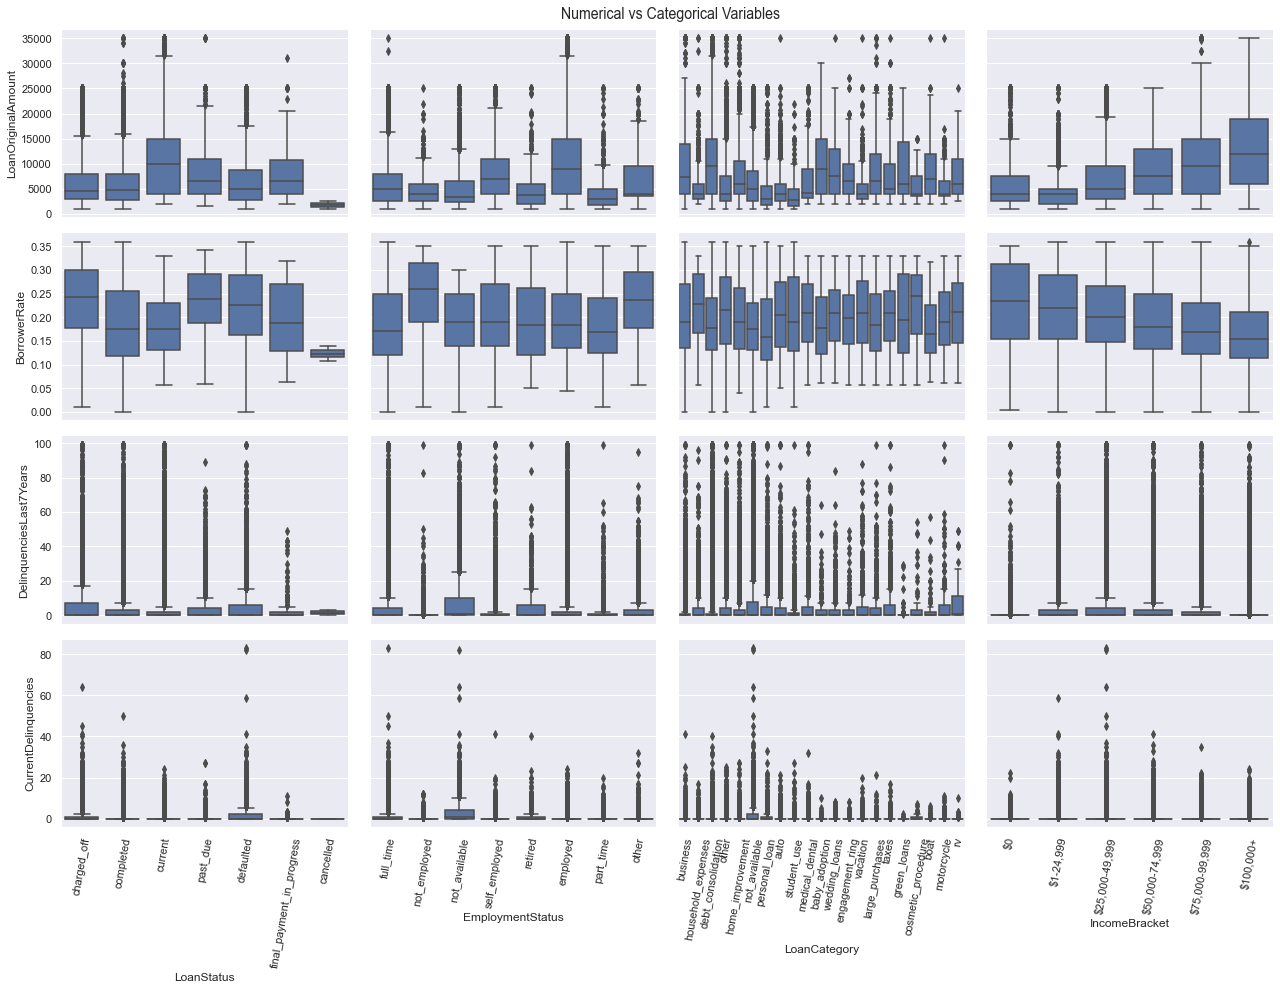

In [109]:
samp = bi_exp.sample(n=500, replace= False)
cat_v =['LoanStatus', 'EmploymentStatus', 'LoanCategory','IncomeBracket']
y_vars= ['LoanOriginalAmount','BorrowerRate', 'DelinquenciesLast7Years','CurrentDelinquencies']

def boxgrid(x, y, **kwargs):
    color = sb.color_palette()[0]
    sb.boxplot(x=x, y=y, color=color)
    plt.xticks(rotation=80)
g = sb.PairGrid(data = bi_exp, y_vars = y_vars, x_vars = cat_v,height = 3, aspect = 1.5)
g.fig.suptitle('Numerical vs Categorical Variables', x= .515, y=1.005, size= 'x-large', stretch= 20)
g.map(boxgrid)
plt.show();

Rate shows high variabilty across the different loan classes. The highest rate is observed in the comestic_procedure which is not surprising.
Delinquency is high in the rv loan class, about 8.19,  while green loans class has the lowest delinquencies, about 2.24. On average, delinquecies vary between 

We can observe some correlation between the numerical and the categorical variables: `LoanOriginalAmount` indicate a positive relationship with `IncomeBracket` variable, while `BorrowersRate` and `IncomeBracket` are negetively associated.

On average, delinquency is very common with loans in charged-off, defaulted, or past-due statuses, with the mode at the charged-off. It is not surprising that the charged-off loans are associated with high median borrowers' rate and lower median loan amount. Defaulted loans show closely similar behavior, and the trend is transmitted to loans in past-due status. These three categories can easily be classed as "distressed" group!
Interestingly, there is no difference in median delinquency across the categories.
 

Interestingly, the `not_employed` category of the `EmploymentStatus` variable indicate lower delinquencies but is associated higher borrower's rate and median lowest loan amount. 
Another interesting observation is in part-time category where median delinquency is low and borrowers rate appears to be the lowest, though the median loan amount is comparably lower. I would expect the rate to be higher, however, it makes sense that the median loan amount is lower when compare to full_time and the employed categories.

Also observed is that delinquencies tend to decrease as income bracket increases, indicating a negative.

Overall, there is difference in the average delinquencies, borrowers rate, and loan amount in each level of the categorical variables suggesting there exist relationships.

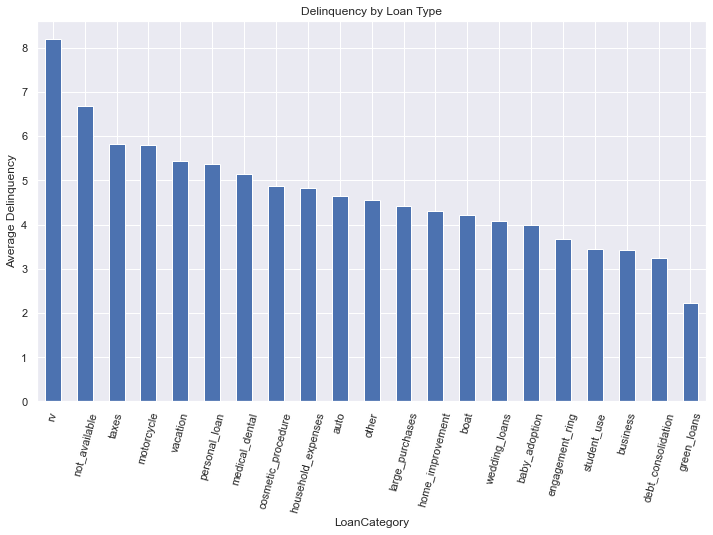

In [110]:
# overview of distribution of delinquency by loan category
plt.figure(figsize= [14, 8])
bi_exp.groupby('LoanCategory')['DelinquenciesLast7Years'].mean().sort_values(ascending=False).\
plot(kind='bar', figsize=(12,7),stacked=True, width= 0.5, log=False, )
plt.title('Delinquency by Loan Type')
plt.xticks(rotation=75)
plt.ylabel('Average Delinquency');

On average, delinquency appears highest in the rv loan category with green the least delinquent. No category is without delinquency. At minimum, each category has an average delinwuency of 2. 

### Talk about some of the relationships you observed in this part of the investigation. How did the feature(s) of interest vary with other features in the dataset?


`DelinquenciesInLast7Years` vs `LoanStatus`:
`DelinquenciesInLast7Years` variable indicates association with `LoanStatus`. Loans, in what I describe as being in "distress" status, (`charged_off`, `defaulted`, and `past_due`), appear to have higher delinquency counts while the "healthy" status (`completed`, `current`, and `final_payment_in_progress`), tend to have lower delinquency counts. Cancelled loans frequency in the initial dataset was negligible and does appear here on the plot.

DelinquenciesInLast7Years variable showed negative correlation with `YearlyIncome`, `LoanOriginalAmount`, and `DebtToIncomeRatio`. As these three variables increases, the delinquency variables decreases. However, a positive correlation is observed between `BorrowersRate` and our variable of interest increases. In this case, delinquency tend to increase as rate increases. 
As expected, delinquecies variable shoed strong correlation with itself. Overall, the strength of the relationships is weak given correlation value is close to zero.

Delinquency shows variability with the categorical variables; loanstatus, EmploymentStatus, and IncomeBracket.
Frequency is observed to be different in each level of the categorical variables. 

The `LoanStatus` is observed to indicate association with `DelinquenciesInLast7Years`. Loans that are "past_due", "charged_off, , "defaulted", statuses have higher delinquency than "current" and "completed" loans. The ("past_due", "charged_off, , "defaulted") appear to be in distress while "current" and "completed" are healthy statuses. However, the final_payment_in_progress category is observe to have the most deliquencies.
Delinquency tend to decreases with `IncomeBracket` variable. With the `EmploymentStatus`, delinquency is different in each category of the variable.


### Did you observe any interesting relationships between the other features (not the main feature(s) of interest)?


`LoanStatus` vs `BorrowerRate`
BorrowerRate tends to be higher with loans in (`chargedOff`, `defaulted`, and `past_due`) statuses while the rate appear lower in loans in (`completed`, `current`, and `final_payment_in_progress`) statuses. The former group could be considered loans in distress  status while `completed`, `current`, and `final_payment_in_progress` are somewhat in healthy status. On average, rate tend to be higher in the distress group than it is in the healthy group.  This could point to positive association between the two variables

How `Incomebracket` interact with `EmploymentStatus`:

There is difference in the distribution of income range in the various employment groups.
The upper income ranges; (`$25,000-49,999`, `$50,000-74,999`, `$75,000-99,999`, and `$100,000+`) are frequent for loans asssociated with `employed`, `full_time`, and `self_employed` groups. The frequency appears to decline in "other", "part_time", "not_employed" and the "retired" classes.
The decline in and low frequencies of upper income ranges in the different employement statuses are very obvious in the part-time and "not_employed" groups. This can be expected.
Another striking observation is in the "Other" category of the employment status variable where the no_income count is the lowest.

Another clear relationship observed is between loan amount variable, `LoanOriginalAmount` and `BorrowerRate`. Both variables are negatively correlated though the relationship weak.
The relationships observed amongst the variables are generally weak suggesting delinquency may be as a result of combination of factors.

<a id='multivariate'></a>

## Multivariate Exploration


In this section, I want examine the interaction amongst the categorical variables and then focus on how  `LoanStatus`, `IncomeBracket`, and `DebtToInocmeRatio`  variables play into the relationship bewteen target variable `DelinquenciesLast7Years` and rate variable `BorrowerRate`. 

Let's examine the relationship amongst the categorical variables.

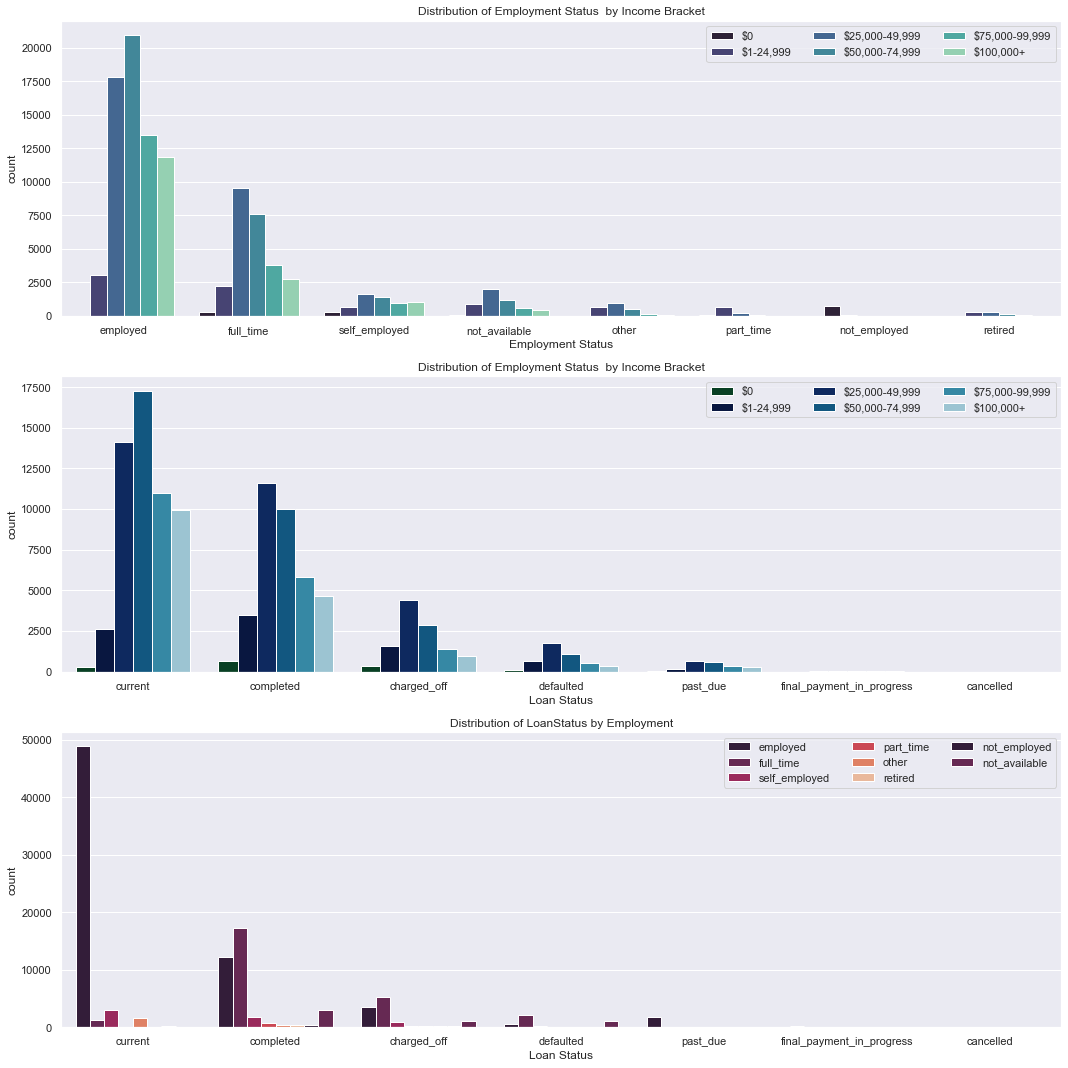

In [111]:
# plot frequency distribution of categorical variables
plt.figure(figsize = [15, 15])
order= bi_exp['EmploymentStatus'].value_counts().index

# subplot 1: EmploymentStatus vs IncomeBracket
plt.subplot(3, 1, 1)
sb.countplot(data = bi_exp, x = 'EmploymentStatus', hue = 'IncomeBracket',log=False, palette= sb.color_palette('mako')
            ,order=order)
plt.legend(loc=0, ncol=3) # re-position legend
plt.title('Distribution of Employment Status  by Income Bracket')
plt.xlabel('Employment Status')

# subplot 2: LoanStatus vs. IncomeBracket
plt.subplot(3, 1, 2)
sb.countplot(data = bi_exp, x = 'LoanStatus', hue = 'IncomeBracket', log=False, palette= sb.color_palette('ocean')
            ,order= bi_exp['LoanStatus'].value_counts().index)
plt.legend(loc=1, ncol=3) # re-position legend
plt.title('Distribution of Employment Status  by Income Bracket')
plt.xlabel('Loan Status')

# subplot 3: LoanStatus vs. EmploymentStatus
h_order= ['employed', 'full_time', 'self_employed', 'part_time','other', 'retired', 'not_employed','not_available']
plt.subplot(3, 1, 3), 
sb.countplot(data = bi_exp, x = 'LoanStatus', hue = 'EmploymentStatus',log=False, palette= sb.color_palette('rocket')
            ,order= bi_exp['LoanStatus'].value_counts().index, hue_order= h_order)
plt.title('Distribution of LoanStatus by Employment')
plt.xlabel('Loan Status')
plt.legend(loc=1, ncol=3) # re-position legend
plt.tight_layout()

Overview of the plots on standard scale indicate difference in the distribution of employment stastus with IncomeBracket.
In the full-time employment group, income range `$25000-49999` is the mode, while in the employed group, the mode in the `$50,000-74,999` class. In the "not_employed"  employment status class, we observe the mode at the `$0`, which is not surprising.
On standard scale, the distribution of loan status by employment status does not reveal much info, though low variability is observed, with the distribution skewed to the current status class.

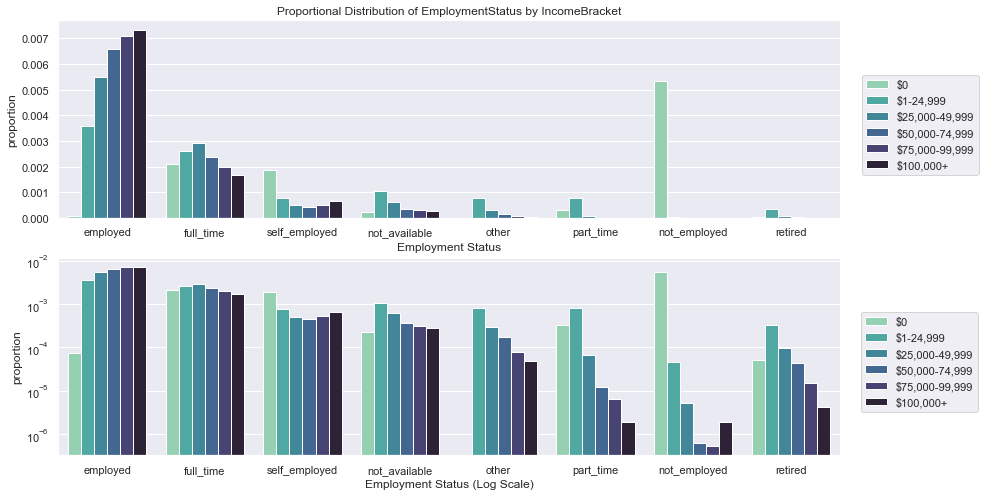

In [112]:
# plot distribution proportion for the variables
# shape dataset for the plot
bracket_counts = ((bi_exp.groupby(['IncomeBracket'])['EmploymentStatus'].value_counts(normalize=True).
                   rename('proportion')/100)).reset_index(drop=False)

# plot on standard scale 
plt.figure(figsize=[14,8])
plt.subplot(2,1,1)
p = sb.barplot(x="EmploymentStatus", y="proportion", hue="IncomeBracket", data=bracket_counts, 
               palette= sb.color_palette('mako_r'), order= order)
plt.title('Proportional Distribution of EmploymentStatus by IncomeBracket')
plt.xlabel('Employment Status')
plt.legend(bbox_to_anchor =(1.185, .75))

# plot distribution on log scale
plt.subplot(2,1,2)
p = sb.barplot(x="EmploymentStatus", y="proportion", hue="IncomeBracket", data=bracket_counts, 
               palette= sb.color_palette('mako_r'), log=True, order= order)
plt.xlabel('Employment Status (Log Scale)'), plt.legend(bbox_to_anchor= (1.02, .75,));

From the plot above, we observe that empoyment is mostly distributed in the employed and full-time classes, which is not unsual, and that higher income bracket, $5000 and over, are prevailent in these two classes than the rest. 

The frequency in the "employed" class increases with "IncomeBracket" and carry higher percentages of the upper income bracket, while in the full_time class, we see lower percentages of upper income bracket. 
The "self_employed" class shows an unusual higher percentage of `$0` distributed.

Interesting observation is the unusual high percentages of `$0` income class in the full-time and self-employed groups! The  `$0` class spikes in the `not_employed` and the near-zero proportion in the `employed` classes are expected.
Lower percentages of higher income  is observed in the part-time, other, and the retired classes.

Overall, the distribution of employment statuses across the income brackets vary. The shape of distribution for each employment status is different indicating there exist interaction between the employment status and the income bracket variables.

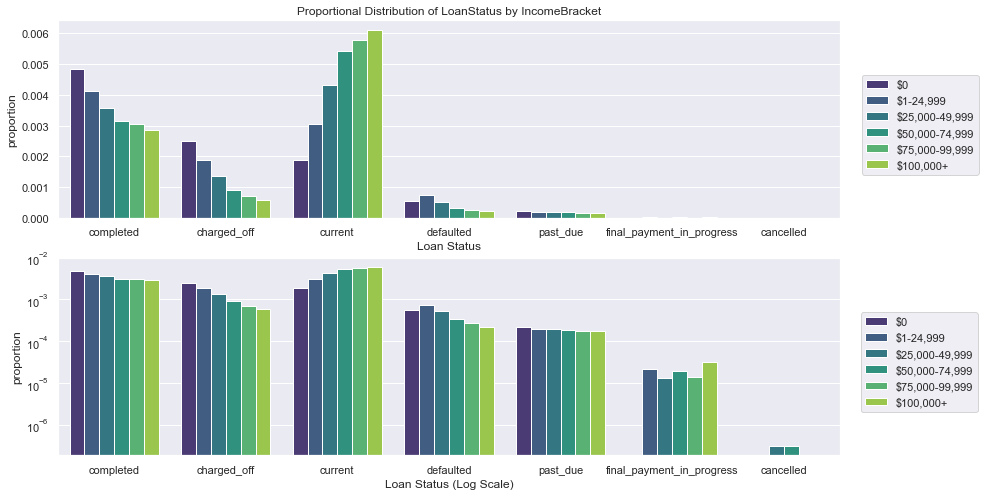

In [113]:
# shape dataset 
status = ((bi_exp.groupby(['IncomeBracket'])['LoanStatus'].value_counts(normalize=True).rename('proportion')/100)
                     .reset_index(drop=False))
# plot proportions of distribution on standard scale
plt.figure(figsize=[14,8])
plt.subplot(2,1,1)
p = sb.barplot(x="LoanStatus", y="proportion", hue="IncomeBracket", data=status, 
               palette= sb.color_palette('viridis'),log=False)
plt.title('Proportional Distribution of LoanStatus by IncomeBracket')
plt.xlabel('Loan Status'), plt.legend(bbox_to_anchor= (1.185, .75,))

#  plot proportions of distribution on log scale
plt.subplot(2,1,2)
p = sb.barplot(x="LoanStatus", y="proportion", hue="IncomeBracket", data=status, 
               palette= sb.color_palette('viridis'),log=True)
plt.xlabel('Loan Status (Log Scale)'), plt.legend(bbox_to_anchor= (1.02, .75,));

A larger proportion of the loans are either completed or  current, with few being charged off or in default status or past due.
Loans in `completed, charged_off, past_due, and defaulted` statuses show negative correlation with income bracket; while current loans status is positively correlated.
Larger percentage of completed loans are in the `$0` class. Current loans frequency increases exponentially by income bracket. The `$100,00+` is the mode in this group.
In the `completed, charged_off, and past_due`, `$0` class is the mode. The "defaulted" class sees a reduction in the frequency. Most defaulted status is found in the `$1-24,999` income class.
Very few loans have cacellation which is observe in` $1-24999 and $25,000-49,999` classes. Interesting observation is in the `pat_due` class where variability is very low.

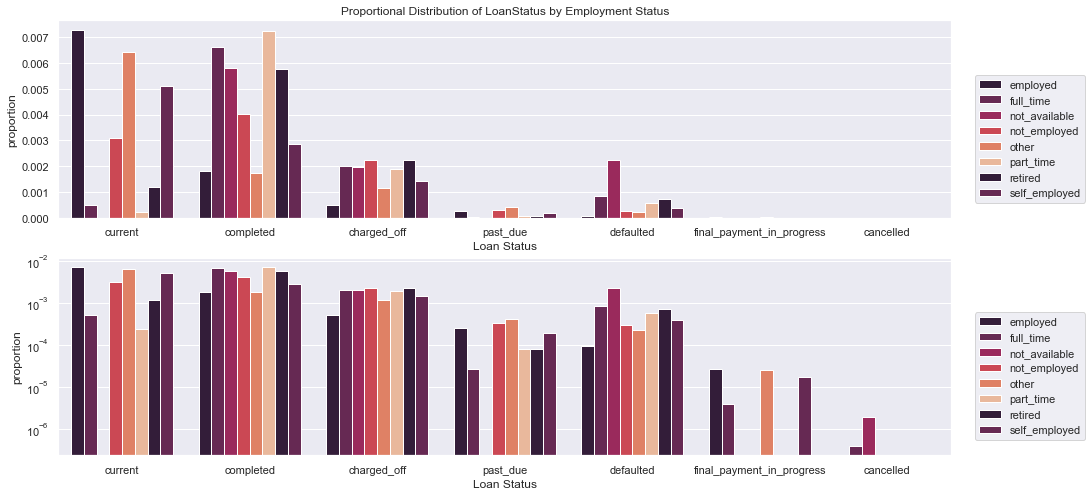

In [114]:
# shape dataset
status = ((bi_exp.groupby(['EmploymentStatus'])['LoanStatus'].value_counts(normalize=True).
           rename('proportion')/100).reset_index(drop=False))

# plot proportions of distribution on standard scale
plt.figure(figsize=[16,8])
plt.subplot(2,1,1)
p = sb.barplot(x="LoanStatus", y="proportion", hue="EmploymentStatus", data=status, 
               palette= sb.color_palette('rocket'),log=False)
plt.title('Proportional Distribution of LoanStatus by Employment Status')
plt.xlabel('Loan Status'), plt.legend(bbox_to_anchor= (1.02, .75,))

# plot proportions of distribution on log scale
plt.subplot(2,1,2)
p = sb.barplot(x="LoanStatus", y="proportion", hue="EmploymentStatus", data=status, 
               palette= sb.color_palette('rocket'),log=True)
plt.xlabel('Loan Status'), plt.legend(bbox_to_anchor= (1.02, .75,));

We have more loans with "completed" status. Interestingly, partime has the most "completed" loans in that class. the proportion of loans in current status is slightly less than that of the completed. here the employed class is the mode and also the most across all classes. Different employment status appear to be mode for each loan status class. in other words, there is difference in the distribution pointing to possible relationship between the two variables.

In [115]:
no_outliers = bi_exp.copy() # make a copy of  dataset
no_outliers['zscore_ratio'] = zscore(no_outliers['DelinquenciesLast7Years'])

# select outliers
no_outliers = (no_outliers[((no_outliers['zscore_ratio'] < 3) & (no_outliers['zscore_ratio'] > -3))]) 
#no_outliers.describe() # outlier summary stats

#### PairGrid Correlation of Numerical Variables with Target 

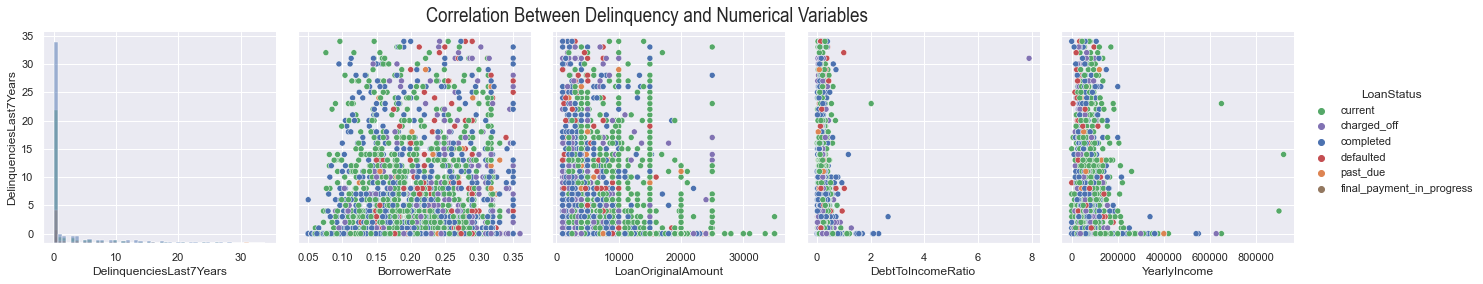

In [116]:
mul_var = no_outliers.copy() # Make copy() of dataset
# select relevant numeric variables
x_vars = ['DelinquenciesLast7Years','BorrowerRate', 'LoanOriginalAmount', 
          'DebtToIncomeRatio','YearlyIncome']
y_vars = ['DelinquenciesLast7Years'] 

# customized the hue color
pal_ ={'current': 'C2', 'completed': 'C0', 'past_due': 'C1', 'defaulted': 'C3',
       'charged_off': 'C4', 'final_payment_in_progress':'C5', 'cancelled': 'C6'} 

samp= mul_var.sample(n= 5000, replace=False)

# plot pairwise correlation for the variables
g = sb.PairGrid(samp, hue='LoanStatus', x_vars=x_vars, y_vars=y_vars, height=3.7, aspect=1, )
g.map_diag(sb.histplot, bins= 50)
g.map_offdiag(sb.scatterplot, palette=pal_)
g.fig.suptitle('Correlation Between Delinquency and Numerical Variables', 
               x= .445, y=1.045, size= 'xx-large', stretch= 20)
g.add_legend();

#### Correlation bewteen Delinquency and BorrowerRate in Relation to IncomeBracket 

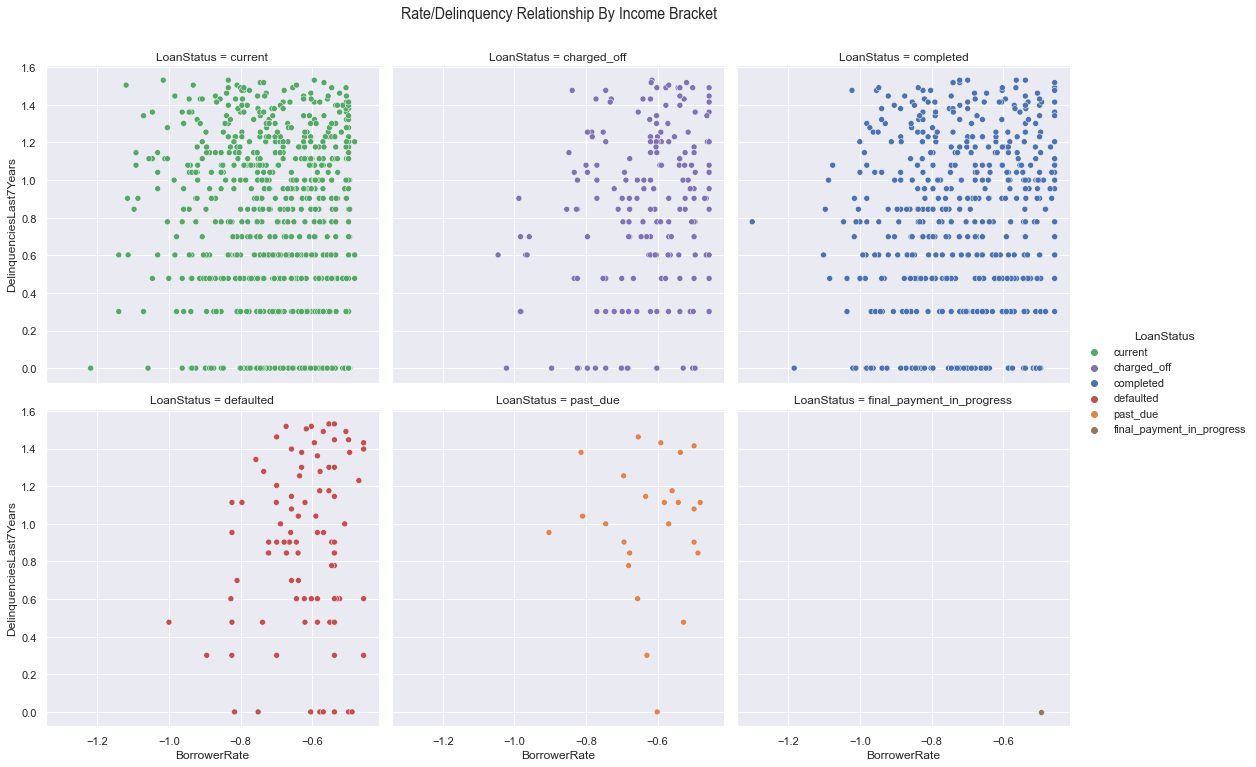

In [117]:
# plot faceted scatter plot on the class of loan status
x= np.log10(samp['BorrowerRate'].replace(0, np.nan))
y= np.log10(samp['DelinquenciesLast7Years'].replace(0, np.nan))

pal_ ={'current': 'C2', 'completed': 'C0', 'past_due': 'C1', 'defaulted': 'C3',
       'charged_off': 'C4', 'final_payment_in_progress':'C5', 'cancelled' : 'C6'}

g = sb.relplot(
    data=samp, x=x, y=y,
    col='LoanStatus', hue='LoanStatus', style=None,
    kind='scatter', col_wrap=3, palette=pal_,)
g.fig.suptitle('Rate/Delinquency Relationship By Income Bracket', 
               x= .445, y=1.045, size= 'x-large', stretch= 20);

The plot shows more sample towards the upper right corner of the plot indicating higher rates correspond with high delinquencies count. This behavior is different across the classes of the loan status variable.
Also, there is difference in the population size of those loans associated with high rate and high delinquency for each the loans status.

In [118]:
# reshape dataset to measure delinquency at various rate points for LoanStatus classes
mul_status= mul_var.copy()
mul_status['BorrowerRate'] = mul_status['BorrowerRate'].round(2).sort_values(ascending=False)
loanstatus= mul_status.pop('LoanStatus')
mp = mul_status.pivot_table(index='BorrowerRate', columns= loanstatus, values='DelinquenciesLast7Years')
mp.shape

(37, 7)

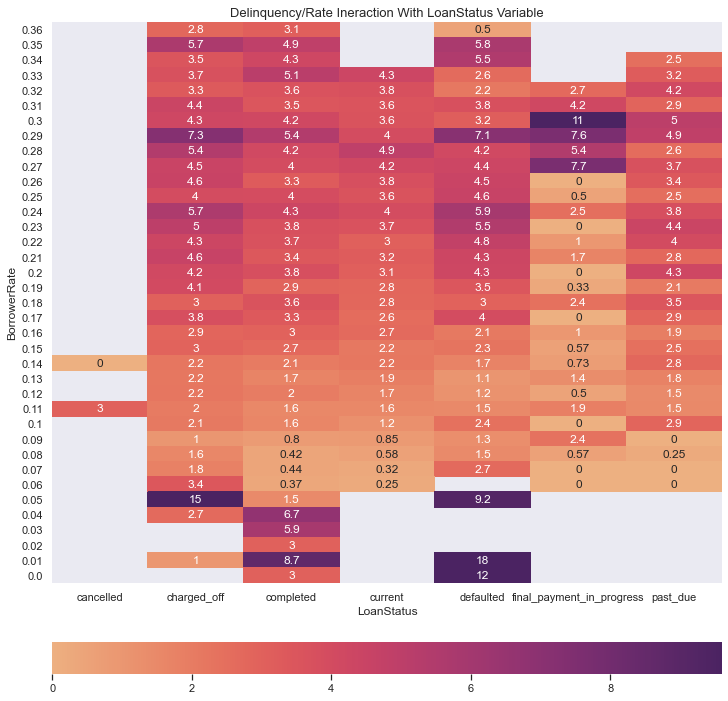

In [119]:
# plot heatmap to assess the relationship of delinquency and rate per loan status class
grid_kws = {'height_ratios': [0.7, .04], 'hspace': .2}

f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=[12, 12])
ax = sb.heatmap(mp.sort_values(by=['BorrowerRate'],ascending=False), ax=ax, 
                cbar_ax=cbar_ax, cbar_kws={'orientation': 'horizontal'}, 
                annot=True, robust=True, cmap='flare')
ax.set_title('Delinquency/Rate Ineraction With LoanStatus Variable', size=13);

From the heatmap, irrespective of borrower's rate, delinquency seems likely. However, the likelihood increases as rate increases and varies by loan status. 

There is difference in the distribution of delinquencies at various rate points across loan status. This is clear in defaulted and charged_off statuses where the delinquencies is higher at lower rate region. Interestingly, loans in current status indicate higher delinquecies from the lower to higher rate points than the rest of the class. However, the bar chart shows that average delinquency by rate is highest in the "defaulted" class and closely followed by the "charged_off" class. It appears the high delinquency in the defaulted class falls between the borrower's rate of 0.2 and 0.3 on the plot. This can be  expected as these two classes are in distress!

Now let looks at the explore how income bracket factors into the relationship between rate and delinquency. First, lets look at how delinquency distributes across income bracket:

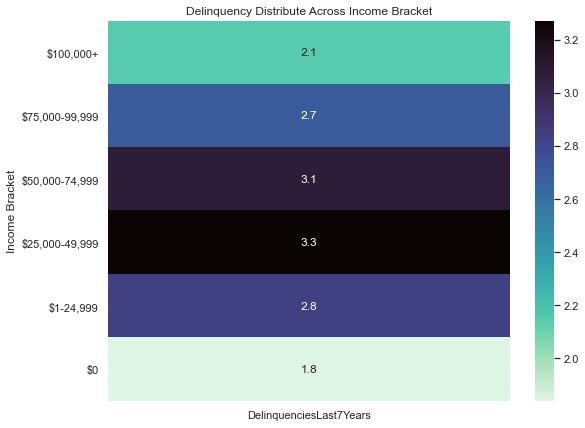

In [120]:
table = mul_var.copy()
#table['BorrowerRate'] = table['BorrowerRate'].round(2)
table['BorrowerRate'] = table['BorrowerRate'].clip(lower=table['BorrowerRate'].quantile(0.025),\
                                                      upper=table['BorrowerRate'].quantile(0.925))
income_del =  table.pivot_table(index= 'IncomeBracket', values='DelinquenciesLast7Years', 
                                dropna=True, observed=True, )

# plot heatmap to assess delinquency income bracket classes
plt.figure(figsize=[9,7])
ax = sb.heatmap(income_del.sort_values(by=['IncomeBracket'],ascending=False),  
                 annot=True, robust=True, cmap='mako_r' , cbar=True)
ax.set_title('Delinquency Distribute Across Income Bracket')
ax.set_ylabel('Income Bracket');

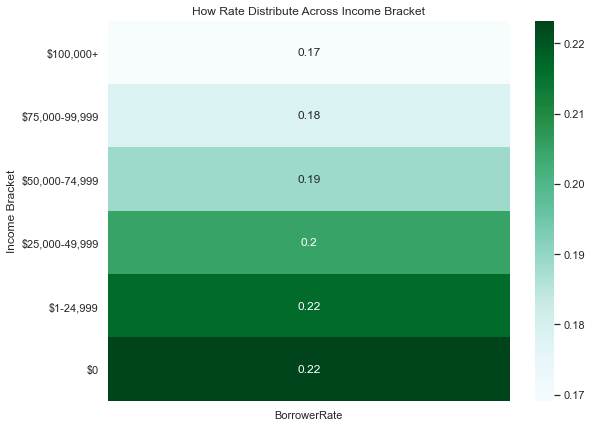

In [121]:
income_rate =  table.pivot_table(index= 'IncomeBracket', values='BorrowerRate', dropna=True, observed=True, )

# plot heatmap to assess the relationship of delinquency and rate per loan status class
plt.figure(figsize=[9,7])
ax = sb.heatmap(income_rate.sort_values(by=['IncomeBracket'],ascending=False),  
                 annot=True, robust=True, cmap='BuGn' )
ax.set_title('How Rate Distribute Across Income Bracket')
ax.set_ylabel('Income Bracket');

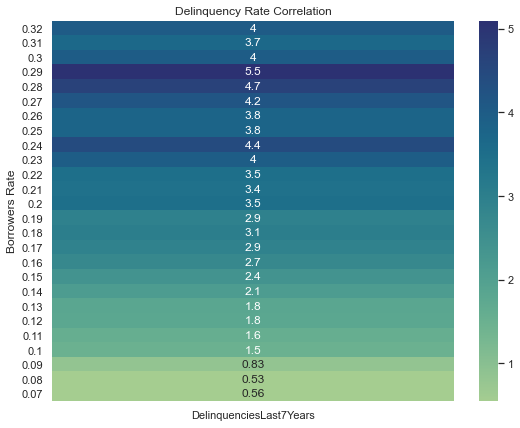

In [122]:
table_1 = table.copy()
table_1['BorrowerRate'] = table_1['BorrowerRate'].round(2) # summerize rate point for visuals

# create a wide table form 
rate_del_pvt = table_1.pivot_table(index='BorrowerRate', values='DelinquenciesLast7Years', 
                                   dropna=True, observed=True, )

# plot heatmap to assess delinquency and rate correlation
plt.figure(figsize=[9,7])
ax = sb.heatmap(rate_del_pvt.sort_values(by=['BorrowerRate'],ascending=False),  
                 annot=True, robust=True, cmap='crest', )
ax.set_title('Delinquency Rate Correlation')
ax.set_ylabel('Borrowers Rate');

From the above three plots, delinquency tend to be higher in the middle income range and lower at the entry and higher income ranges.
The `$25,000-49,999` class indicate highest  average of `3.3`. 

On the other hand, rate decreases as we go up in income bracket, while delinquncy tend to increases as rate goes up. 

Next we want see how the income bracket factor into the relationship between rate and delinquency. 

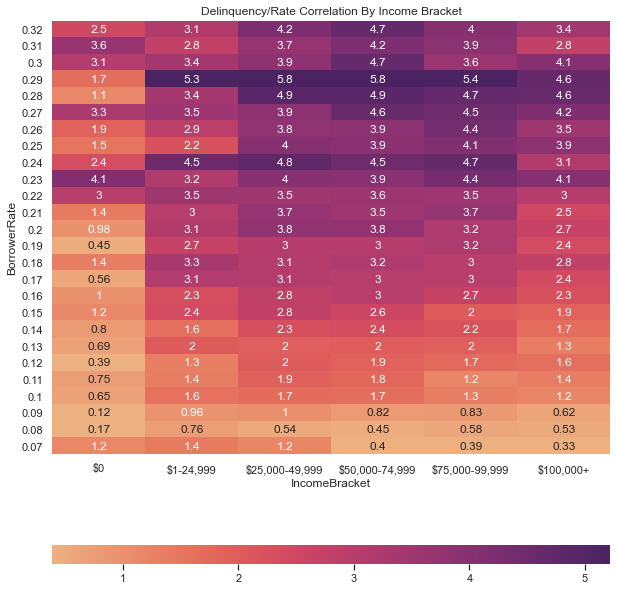

In [123]:
# create pivot table
income_rate_del =  table_1.pivot_table(index='BorrowerRate', columns= 'IncomeBracket', 
                                           values='DelinquenciesLast7Years', dropna=True, observed=True, )

# plot heatmap to assess the relationship of delinquency and rate by income class
grid_kws = {'height_ratios': [0.9, .04], 'hspace': .4}
f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=[10, 10])
ax = sb.heatmap(income_rate_del.sort_values(by='BorrowerRate',ascending=False), ax=ax, 
                cbar_ax=cbar_ax, cbar_kws={'orientation': 'horizontal'}, annot=True, 
                robust=True, cmap= 'flare',)
ax.set_title('Delinquency/Rate Correlation By Income Bracket');

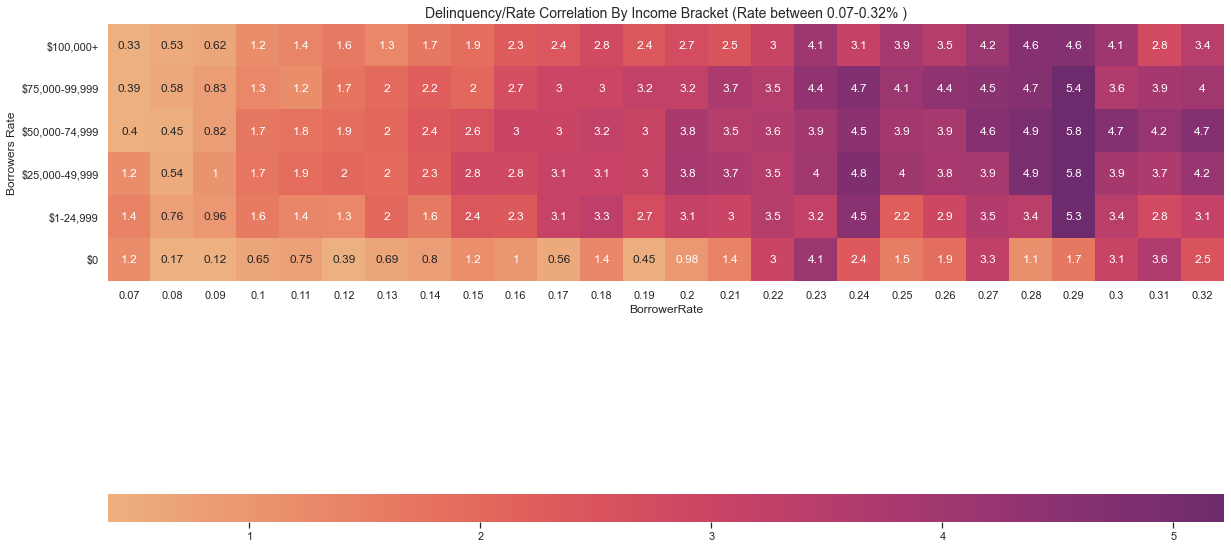

In [124]:
income_rate_del_1 =  table_1.pivot_table(index='IncomeBracket', columns='BorrowerRate', 
                                       values='DelinquenciesLast7Years', dropna=True, 
                                         observed=True, )

# plot heatmap to assess the relationship of delinquency and rate per income class
grid_kws = {'height_ratios': [0.8, .04], 'hspace': .2}

f, (ax, cbar_ax) = plt.subplots(2, gridspec_kw=grid_kws, figsize=[20, 12])
ax = sb.heatmap(income_rate_del_1.sort_values(by=['IncomeBracket'],ascending=False), ax=ax, 
                cbar_ax=cbar_ax, cbar_kws={'orientation': 'horizontal'}, annot=True, 
                cmap='flare', robust=True,square=True,
               center=income_rate_del_1.loc['$75,000-99,999',0.2])
ax.set_title('Delinquency/Rate Correlation By Income Bracket (Rate between 0.07-0.32% )', size=14)
ax.set_ylabel('Borrowers Rate');

Recall that as rate increases, delinquency tended to increase. With the introduction of income bracket variable into the equation, We obserevd that delinquency tend to increase with increased rate as you go up the income ladder. However, the mean delinquency  vary by class and the effects appear to be minimal. Interestingly, the `$0` income class tend show lowest average followed by the `$100,000+`, giving rise to relation that may follow quadratic form.

**View relationship with scatter plot**

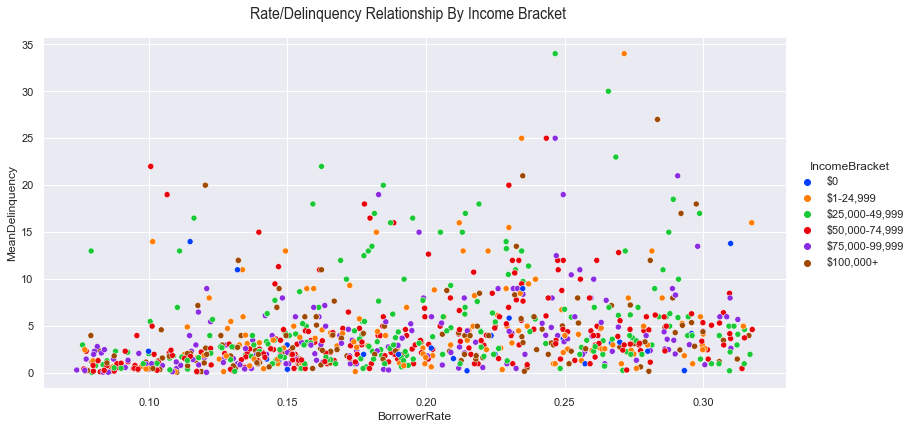

In [125]:
# create faceted scatter plot on levels of the IncomeBracket variable
tb = table.groupby(['IncomeBracket','BorrowerRate'])['DelinquenciesLast7Years']\
.mean().rename('MeanDelinquency').reset_index()

# create scatter plot on standard
g = sb.relplot(
    data=tb[tb['MeanDelinquency']>0].sample(n=1000, replace= True), 
    x='BorrowerRate', y='MeanDelinquency',
    hue='IncomeBracket', size= None, palette= 'bright', 
    height= 5.5, aspect= 2,
    kind='scatter', col_wrap= None
)
g.fig.suptitle('Rate/Delinquency Relationship By Income Bracket', 
               x= .445, y=1.045, size= 'x-large', stretch= 20);

What is clear is how the middle income classes show high proportion and higher counts. To see more detail, I will facet and plot on log scale to view the relationships. 

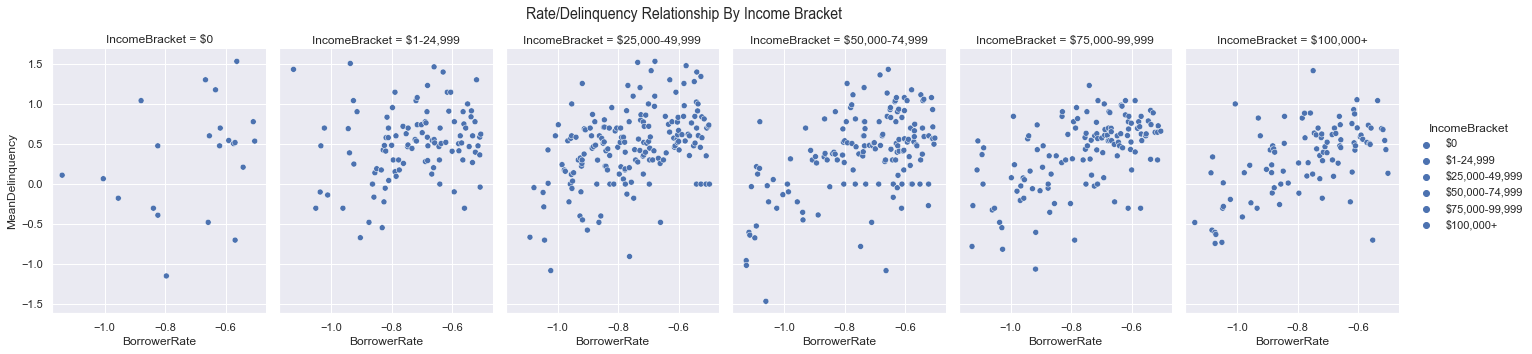

In [126]:
# compute log scale for x and y axes
tb = tb.copy()
x= np.log10(tb['BorrowerRate'].replace(0, np.nan))
y= np.log10(tb['MeanDelinquency'].replace(0, np.nan))

# create color list
color_list_1 = ['b','b','b','b','b','b',]
pal_blue = sb.color_palette(color_list_1, as_cmap= True) # set color for plots

# plot on log scale
g = sb.relplot(
    data= tb.sample(n=2000, replace=False),
    x=x, y=y,
    hue='IncomeBracket',  col='IncomeBracket', palette= pal_blue,
    height= 4.5, aspect=.725, kind='scatter'
)
g.fig.suptitle('Rate/Delinquency Relationship By Income Bracket', 
               x= .445, y=1.045, size= 'x-large', stretch= 20);

The common behavior here is that delinquency increases as the rate is increased. The increase differ by proportion and frequency for each class. The lower income bracket show higher delinquency. 
The distribution tend to be thicker in the lower income classes except the "$0" class. The higher income classes of `$75,000-99,999 and $100,000+`, the frequecy decline and proportion is smaller. 
The lower income classes see more delinquencies at higher rate than the higher income classes. Thus it appears that  income bracket has some effect on how rate and deliquency relates.

Next, I want look at how rate and delinquency plays out in employment space:

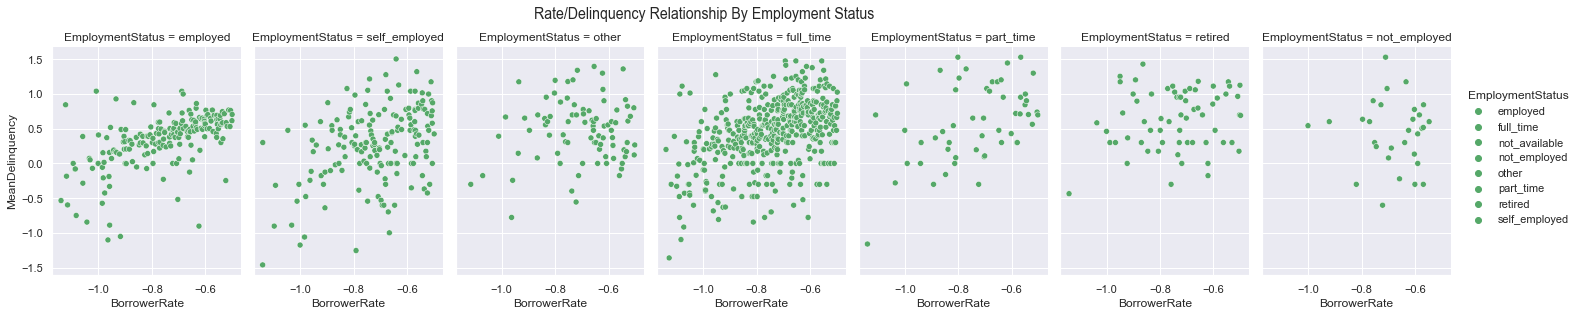

In [127]:
# shape dataset using pandas groupby function
tb_1 = table.groupby(['EmploymentStatus','BorrowerRate'])['DelinquenciesLast7Years']\
.mean().rename('MeanDelinquency').reset_index()

# transform variables for x and y axes based on log10 scale
x= np.log10(tb_1['BorrowerRate'].replace(0, np.nan))
y= np.log10(tb_1['MeanDelinquency'].replace(0, np.nan))
emp_class =  ['employed','self_employed','other','full_time','part_time',
              'retired','not_employed'] # order category

color_list = ['g','g','g','g','g','g','g','g'] # create color list
palette = sb.color_palette(color_list,as_cmap= True) # set default color for plots

# plot on log scale
g = sb.relplot(
    data=tb_1.sample(n=2000,replace=False),
    x=x, y=y,
    hue='EmploymentStatus',  col='EmploymentStatus',col_order = emp_class,palette= palette,
    height= 4.0, aspect=.725, kind='scatter')
g.fig.suptitle('Rate/Delinquency Relationship By Employment Status', 
               x= .445, y=1.045, size= 'x-large', stretch= 20);

The employment variable does not really give a concise insight due to how the classes were grouped in the original dataset. Though we can see that delinquency tend to be high in the classes "employed","full_time", "self_employed, "other" than in the "not_empoyed", "retired", "part_time" classes. The frequency of delinquency at the different rate points is different for the various categories. Notably in the "employed" class, the delinquency is clearly below 1.0 on the log scale. On the other hand, "full_time" class see higher delinquencies at than the employed. Overall, the  differeince in the distribution points in the direction there exist effect of employment status variable on the relationship between rate and delinquency.

Similarly, lets examine how `LoanStatus` interacts rate/delinquency relationship.

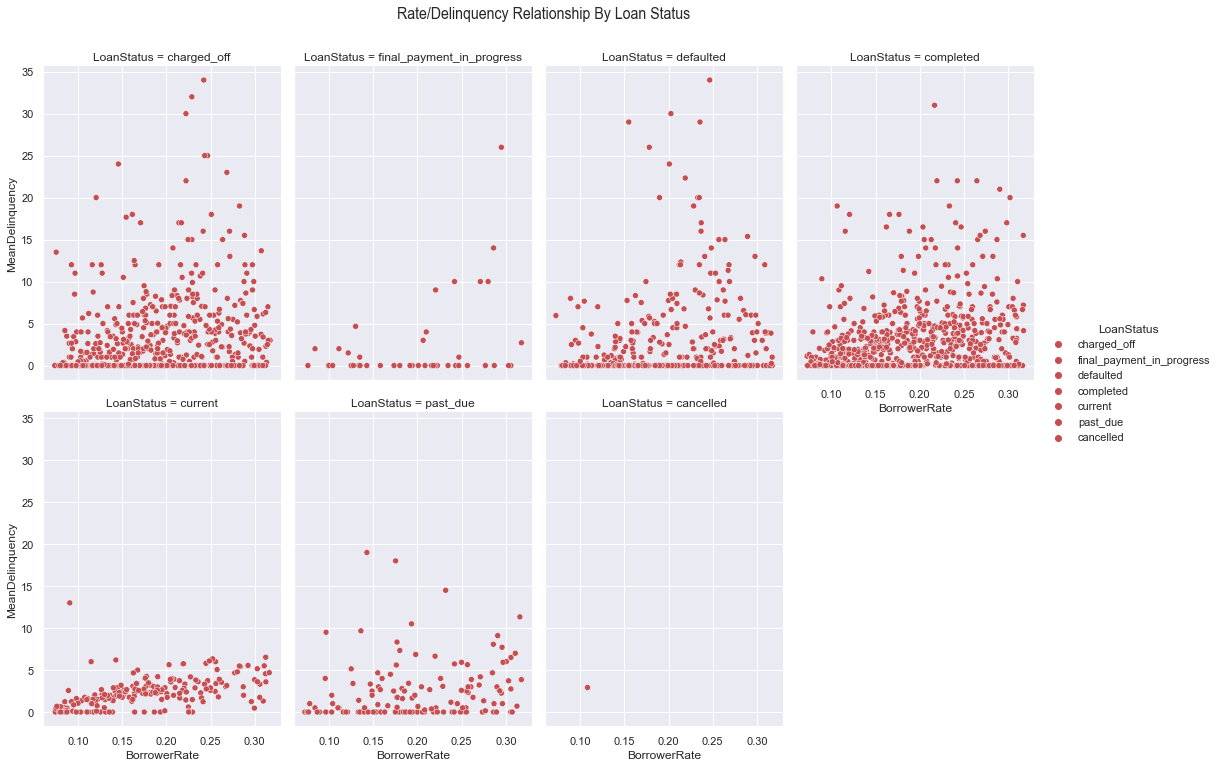

In [128]:

tb_2 = table.groupby(['LoanStatus','BorrowerRate'])['DelinquenciesLast7Years']\
.mean().rename('MeanDelinquency').reset_index()

# transform variabes for x and y axes based on log10
x= np.log10(tb_2['BorrowerRate'].replace(0, np.nan))
y= np.log10(tb_2['MeanDelinquency'].replace(0, np.nan))

# create color list
color_list_2 = ['r','r','r','r','r','r','r']
palette_r = sb.color_palette(color_list_2,as_cmap= True) # set default color for plots

# plot on log scale
g = sb.relplot(
    data=tb_2.sample(n=2000, replace=False),
    x='BorrowerRate', y='MeanDelinquency',
    hue='LoanStatus',  col='LoanStatus', palette= palette_r, col_wrap=4,
    height= 5, aspect=.725, kind='scatter')
g.fig.suptitle('Rate/Delinquency Relationship By Loan Status', 
               x= .445, y=1.045, size= 'x-large', stretch= 20);

We can see that most of the loans are either in charged-off or completed status. A higher proportion of delinquent loans are in these two classes with the mode at the completed status class. The proportion of delinquent loans in the default class is fewer than the afore mentioned classes. Loans in current status indicate lower proportion and frequency in term of delinquency. Regardless of rate, the delinquency for loans in current status is well below 10 
The plot also shows that delinquency could be as high as 35 times!

Next, I am going to include `DebtToIncomeRatio` variable in the analysis to observe for its effect on the relationship above.
Before I do that, recall earlier analysis showed outliers in the debt-to-income-ratio variable. So, that will adddressed first to further the analysis.

In [129]:
income_debt = table.copy() # make a copy of dataset
# outlier treatment charged
income_debt['DebtToIncomeRatio'] = income_debt['DebtToIncomeRatio'].\
clip(lower=income_debt['DebtToIncomeRatio'].quantile(0.025), 
     upper=income_debt['DebtToIncomeRatio'].quantile(0.925))

`DebtToIncomeRatio` variable has a wide range of unique values. It make sense to group nearest values into categories to observe for summary behavior in the next step.

In [130]:
# categorize DebtToIncomeRatio variable values into 'low','medium','high','very_high'
debt_income_cat = pd.cut(income_debt['DebtToIncomeRatio'], bins=
                [0.0, 0.15, 0.25, 0.35, 0.45], labels=[ 'low','medium','high','very_high'])
income_debt.insert(4, 'debt_income_flag', debt_income_cat) # insert the new categories "debt_income_flag"


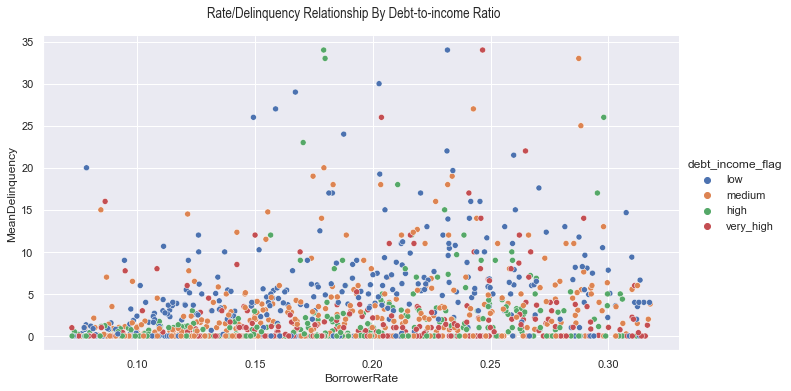

In [131]:
tb_3 = income_debt.groupby(['debt_income_flag', 'BorrowerRate'])['DelinquenciesLast7Years']\
.mean().rename('MeanDelinquency').reset_index()

# plot for average delinquncy
g = sb.relplot(data=tb_3.sample(n=2000, replace=False), 
               x='BorrowerRate', y='MeanDelinquency', hue='debt_income_flag',  
               height= 5, aspect=1.9, kind='scatter')
g.fig.suptitle('Rate/Delinquency Relationship By Debt-to-income Ratio', 
               x= .445, y=1.045, size= 'large', stretch= 20);

We can observed how the density of each class appear on the plot; the "very_high" class in red dots, is dense at the bottom of the plot, followed by "high" class in green dots, then "medium" class in yellow dots and finally, the low class in blue. This is not very clear in on plot, so next I will facet the plot in columns to reflect the discrimination in distribu

It appears we have more loans with "very high" ratio that have lower delinquency counts even at higher rate which is interesting. 

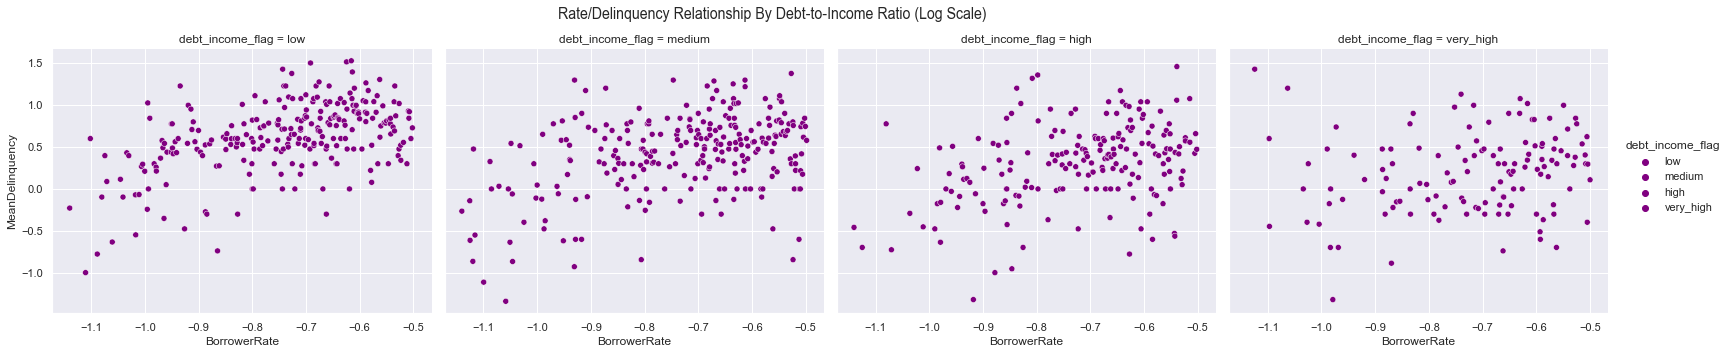

In [132]:
# compute log scale for x and y axes
x= np.log10(tb_3['BorrowerRate'].replace(0, np.nan))
y= np.log10(tb_3['MeanDelinquency'].replace(0, np.nan))

color_list_1 = ['purple','purple','purple','purple']
# create color list
pal_blue = sb.color_palette(color_list_1, as_cmap= True) # set default color for plots

# plot on log scale
g = sb.relplot(data=tb_3.sample(n=2000, replace=False), 
               x=x, y=y, hue='debt_income_flag', col= 'debt_income_flag', palette= pal_blue,
               height= 4.5, aspect=1.25, kind='scatter')
g.fig.suptitle('Rate/Delinquency Relationship By Debt-to-Income Ratio (Log Scale)', 
               x= .445, y=1.045, size= 'x-large', stretch= 20);

With the faceted scatter plot, we can see how debt-to-income ratio factors into the relationship between rate and delinquency. Delinquency as a unit of rate tend to negatively associate with debt-to-income ratio variable. The population size and the frequency of delinquency decline as debt-income ratio increases! 
When rate increases, delinquency increases. Less loans are delinquent as ratio increases and the freuency of delinquency declines especially at higher rate! At lower rate, we can see how delinquency size and frequency decreases as ratio gets higher.

**How does ratio distribute in income space in relation to rate to influence delinquency**

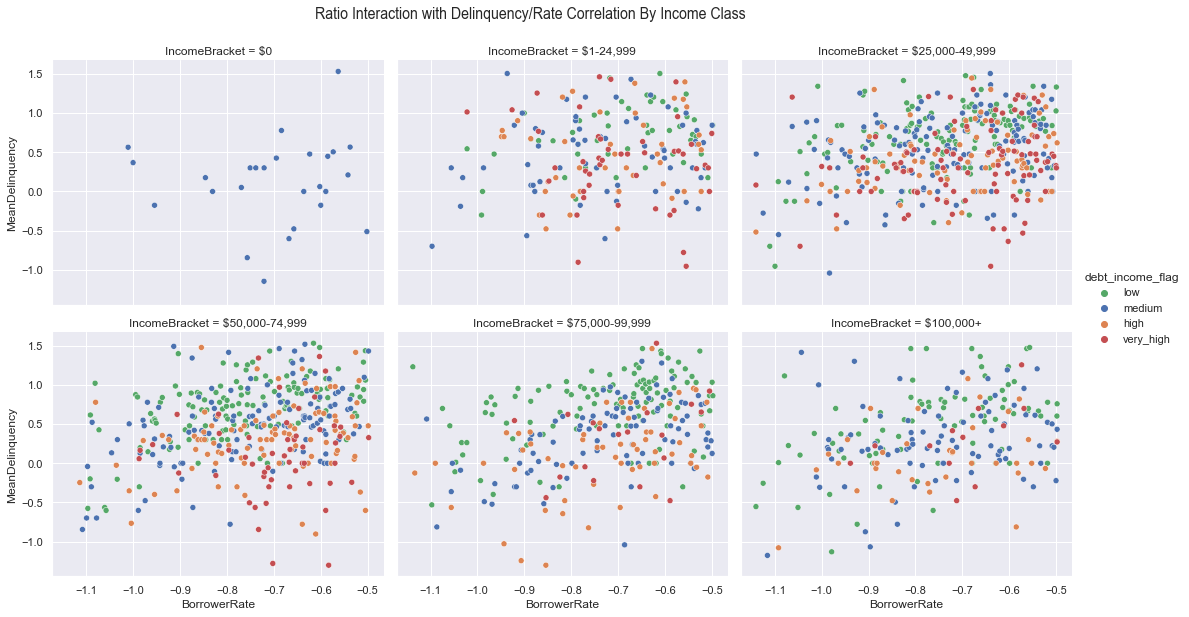

In [133]:
# subset table for plot
tb_4 = income_debt.groupby(['IncomeBracket', 'debt_income_flag', 'BorrowerRate'])['DelinquenciesLast7Years']\
.mean().rename('MeanDelinquency').reset_index()

# customize color palette
palette_5 ={'low': 'C2', 'medium': 'C0', 'high': 'C1', 'very_high': 'C3'}

# compute log scale for x and y axes
x= np.log10(tb_4['BorrowerRate'].replace(0, np.nan))
y= np.log10(tb_4['MeanDelinquency'].replace(0, np.nan))

# plot on log scale
g = sb.relplot(data=tb_4.sample(n=10000, replace= False), 
               x=x, y=y, hue='debt_income_flag',col= 'IncomeBracket', col_wrap=3, palette= palette_5,
               height= 4, aspect=1.25, kind='scatter');
g.fig.suptitle('Ratio Interaction with Delinquency/Rate Correlation By Income Class', 
               x= .445, y=1.045, size= 'x-large', stretch= 20);

The size of delinquency with "higher" and "very high" ratio tend to decline as income level increases and the frquency of delinquency lowers as income increases. Conversely, delinquency with low and medium ratio tend to increase as income increases along with increase in delinquency frequency.
Delinquency of higher frequency tend to be associated with low ratio for the different income class as rate increases. delinquency with "high" and "very high" ratios  exhibit low count and distributed more at higher rate.


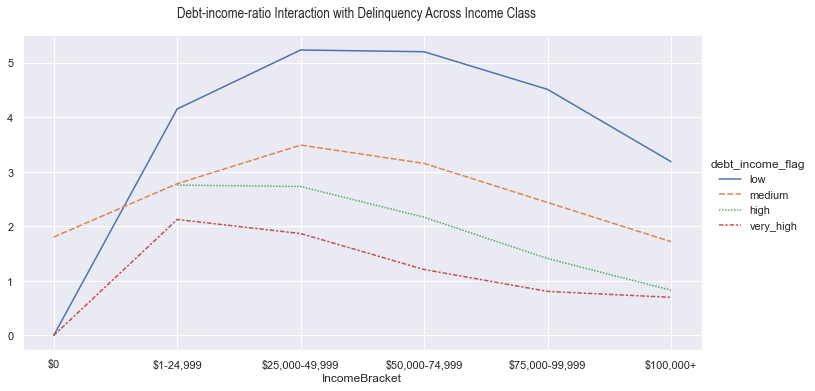

In [134]:
# shape data for line plot
cross = pd.crosstab(columns=  income_debt['debt_income_flag'], index= income_debt['IncomeBracket'],
                    values= income_debt['DelinquenciesLast7Years'], aggfunc= 'mean')

g = sb.relplot(data= cross,  height= 5, aspect=2.0, kind='line',)
g.fig.suptitle('Debt-income-ratio Interaction with Delinquency Across Income Class', 
               x= .445, y=1.045, size= 'large', stretch= 20);

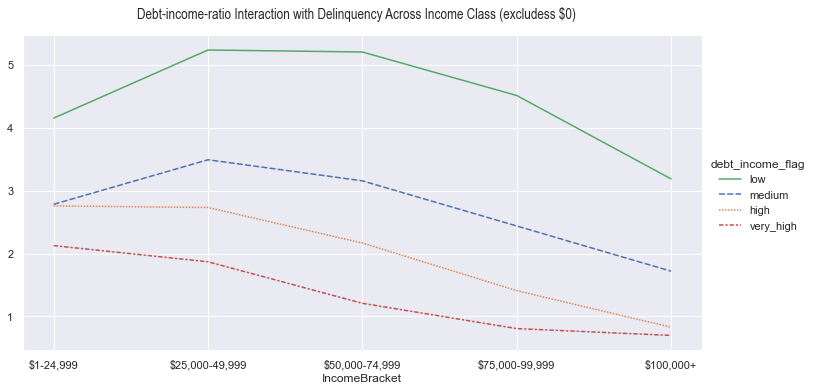

In [135]:
income_dt = income_debt[income_debt['IncomeBracket'] != '$0']
cross = pd.crosstab(columns=  income_dt['debt_income_flag'], index= income_dt['IncomeBracket'],
                    values= income_dt['DelinquenciesLast7Years'], aggfunc= 'mean')

g = sb.relplot(data= cross,  height= 5, aspect=2.0, kind='line', palette= palette_5)
g.fig.suptitle('Debt-income-ratio Interaction with Delinquency Across Income Class (excludess $0)', 
               x= .445, y=1.045, size= 'large', stretch= 20);

The line plot above summarizes how delinquency vary by income and ratio. Overall, delinquency tend to decrease as income rises, however, the frequency of the delinquency appears higher in loans with lower ratio and decreases as ratio increases.
Mix behavior is observed in the $1-24999 class; delinquencies are higher and rising for the "low" and "medium" ratios while the "high" and "very high" ratios see lower and falling frequencies. Ratio tend to correlate negatively with delinquency across the income classes.

### Talk about some of the relationships you observed in this part of the investigation. Were there features that strengthened each other in terms of looking at your feature(s) of interest?


There appears to be a strong positive relationship between borrower rate and delinquency. The introduction of income bracket variable produced a somewhat quadratic effect on the relationship. Delinquency in relation to rate tend to be lower in the lower and  upper income classes than the middle income class. 

When the `$0` class is excluded, the effect of income is much clearer; we can see the size and frequency of delinquency decreasing. On the other hand, debt-to-income ratio indicate a negative correlation on the relationship between rate and delinquency across the income classes. .

### Were there any interesting or surprising interactions between features?



The interaction of debt-to-income ratio variable with the  rate and delinquency variable produced a surprising correlation! Lower debt-to-income ratios tend to associate with high delinquency while "higher/very high" debt-to-income ratios are associated with lower frequency for delinqency. I expected loans with lower debt-to-income ratio to have fewer and/or lower count for delinquency

Also `$0` income bracket class indicated lower delinquency in relation to rate than the rest of the class. I would expected the higher income bracket to show lower delinquency than the higher income bracket.

<a id='conclusion'></a>

## Conclusions


The exploration began with initial dataset consisting of 113,937 loan rcord with 81 features. Dataset was inspected for quality, tidiness, validity, and consistency. Preliminary wrangling was performed to select, clean, generate where necessary, relevant features specific to the analysis. Notably, incorrect type assignment, missing values, conflicting naming of level of category was addressed in the case of LoanStautus and EmploymentStatus variables etc. Although intial investigation did reveal duplicity of records, futher probing of the listing key variable indicated 871 listing keys were duplicated, and as such were excluded from the cut.

Target variable(s) were identified, in this case, "DelinquenciesLast7Years and CurrentDelinquencies" though DelinquenciesLast7Years variable was focal point of the analysis. The predictor variables selected for analysis included BorrowerRate, LoanOriginalAmount, DebtToIncomeRatio, YearlyIncome generated from StatedMonthlyIncome, EmploymentStatus, IncomeRange re-engineered into IncomeBracket in the Variable Analysis section, Occupation selected mostly for determining missing/undisplayed employment status information, LoanStatus.

Three-phased analysis was performed: Univariate, Bivariate, and Multivariate analysis were carried out to understand the distribution and relationships that exist amongst the selected variables. Where necessary, outlier treatment and normalization technique; Logarithmic, Sqaure-root, or BoxCox transformation method; was applied to further analysis.
 
The following Observation were made:
The selected numeric variables were right-skewed except for the rate variable, BorrowerRate. Transforming and/or scaling the variables revealed multiple peaks characterized by cluster. Further analysis confirmed multiple loan processes embedded in the dataset, and the distribution of the differnt loan types peak at zero, 0, which represent loan accounts with no delinquencies.

On the relationship front, we observed as follows; 
YearlyIncome increases as delinquencies decreases; DebtToIncomeRatio increases as delinquencies decreases; LoanOriginalAmount increases as delinquencies decreases, BorrowerRate increases as delinquencies increases, LoanOriginalAmount increases as YearlyIncome increases, LoanOriginalAmount dencreases as BorrowerRate increases, and ss expected delinquency variables correlated positively.

The numeric predictors exhibited mostly negative correlation against the target except for rate variable, BorrowerRate, which associated positively with the target. 
Although, rate exhibited a strong positive linear relationship with delinquency, it does not appear to solely influences delinquency. The introduction of categorical variable in the form of  loan status, employment status, ratio and income variables varied the relationship between rate and delinquencies across the categorical classes. This observation was evident with the introduction of the income bracket variable in multivariate analysis phase that produced a form of quadratic relationship. The two extremes of the income bracket experienced showed lower delinquency than the middle classes.
Interestingly, higher income have indicated significant delinquency at various rate and ratio which lead to the conclusion that delinquency and its prediction(s) tend to depend on a combination of effects from multiple variables rather one. 